# Projet Machine Learning (R Version)

## Jeu de données :

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Global Data on Sustainable
Energy" (2000-2020).
Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à
la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.
Les variables sont les suivantes :

* **Entity:** Nom du pays ou de la région pour lequel les données sont rapportées.
* **Year:** Année pour laquelle les données sont communiquées, entre 2000 et 2020.
* **Access to electricity (% of population):** Pourcentage de la population ayant accès à l’électricité.
* **Access to clean fuels for cooking (% of population):** Pourcentage de la population qui utilise
principalement des combustibles propres.
* **Renewable-electricity-generating-capacity-per-capita:** Capacité installée d’énergie renouvelable
par personne.
* **Financial flows to developing countries (US Dollars):** Aide et assistance des pays développés pour
les projets d’énergie propre.
* **Renewable energy share in total final energy consumption (%):** Pourcentage d’énergie renouvelable dans la consommation d’énergie finale.
* **Electricity from fossil fuels (TWh):** Électricité produite à partir de combustibles fossiles (charbon,
pétrole, gaz) en térawattheures.
* **Electricity from nuclear (TWh):** Électricité produite à partir de l’énergie nucléaire en térawattheures.
* **Electricity from renewables (TWh):** Électricité produite à partir de sources renouvelables (hydroélectricité, énergie solaire, énergie éolienne, etc.) en térawattheures. 
* **Low-carbon electricity (% electricity):**  Pourcentage d’électricité provenant de sources à faible teneur
en carbone (nucléaire et énergies renouvelables).
* **Primary energy consumption per capita (kWh/person):** Consommation d’énergie par personne
en kilowattheures.
* **Energy intensity level of primary energy (MJ/2011 PPP GDP):**  Consommation d’énergie par
unité de PIB à parité de pouvoir d’achat.
* **Value-co2-emissions (metric tons per capita):** Émissions de dioxyde de carbone par personne en
tonnes métriques.
* **Renewables (% equivalent primary energy):** Équivalent énergie primaire provenant de sources renouvelables.
* **GDP growth (annual %):** Taux de croissance annuel du PIB en monnaie locale constante
* **GDP per capita:** Produit intérieur brut (PIB) par personne.
* **Density (P/Km2):**  Densité de population en personnes par kilomètre carré
* **Land Area (Km2):** Surface terrestre totale en kilomètres carrés.
* **Latitude:** Latitude du centroïde du pays en degrés décimaux.
* **Longitude:**  Longitude du centroïde du pays en degrés décimaux.
  

## Objectif :

L’objectif est de prédire la variable **Value-co2-emissions** à partir des autres variables.

## Analyse exploratoire des données (EDA) :

In [1]:
#Chargement des librairies nécessaires
library(ggplot2,quietly = TRUE)
library(gridExtra,quietly = TRUE)
library(plotly,quietly = TRUE)
library(corrplot,quietly = TRUE)
library(reshape2)
library(FactoMineR) 
library(factoextra) 
library(ggfortify)
library(pROC)
library(GGally)
library(glmnet) 
library(ROCR)
library(tidyverse)
library(RColorBrewer)
library(boot)
library(nortest)
library (ggmap)


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Type 'citation("pROC")' for a citation.


Attachement du package : ‘pROC’


Les objets suivants sont masqués depuis ‘package:stats’:

    cov, smooth, var


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()    mas

In [2]:
# Lecture des données
data = read.csv('global-data-on-sustainable-energy.csv',header = TRUE)

In [3]:
# Premières lignes du jeu de données
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


In [4]:
# Resumé des donneés
summary(data[1:4])

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      

$\color{green}{\text{La fonction summary nous permet de restituer quelques statistiques de base des variables qui se trouvent dans notre jeu de}}$  
$\color{green}{\text{ données qui porte comme nom 'data'}}$

Les données montrent que pour la variable "Renewable.electricity.generating.capacity.per.capita," il y a 931 valeurs manquantes (NA's), ce qui pourrait affecter la qualité des analyses énergétiques ou économiques. De plus, pour "Value CO2 emissions kt by country," il y a 428 valeurs manquantes, suggérant des lacunes significatives dans les données des émissions de CO2, ce qui peut entraver les efforts de modélisation précise des impacts environnementaux ou des politiques climatiques. Ces absences requièrent une attention particulière pour le traitement des données ou la révision des sources pour améliorer l'exactitude des études futures.

In [5]:
# Changement du type des variables qualitatives en facteur
data[, "Entity"] <- as.factor(data[, "Entity"])

In [6]:
#Vérification des classes Entity et Year
class(data$Entity)
#class(data$Year)

[1] "factor"

In [7]:
#Transformer la variable Density(P/Km2) en numérique
data$Density.n.P.Km2. <- as.numeric(gsub(",", "", data$Density.n.P.Km2.))
#Vérification de la classe Density
class(data$Density.n.P.Km2.)

[1] "numeric"

In [8]:
#Pour chaque variable, on calcule le taux des valeurs manquantes
taux_na = sapply(data,function(x) sum(is.na(x))/length(x))

na_percentage = sort(taux_na * 100,decreasing = TRUE)
cat(sprintf("Pourcentages de NA par variable : \n"))
print(na_percentage)


Pourcentages de NA par variable : 
                        Renewables....equivalent.primary.energy. 
                                                     58.56399013 
                  Financial.flows.to.developing.countries..US... 
                                                     57.24856125 
            Renewable.electricity.generating.capacity.per.capita 
                                                     25.51383941 
                               Value_co2_emissions_kt_by_country 
                                                     11.72924089 
                                                      gdp_growth 
                                                      8.68731159 
                                                  gdp_per_capita 
                                                      7.72814470 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                      5.67278706 
Renewable.energy.share.in.the.total.final

Les données montrent que la variable "Renewables... equivalent primary energy." a le pourcentage de valeurs manquantes le plus élevé à environ 58.56%, suivi par "Financial flows to developing countries (US$)" à 57.25%. Cela indique que plus de la moitié des données pour ces indicateurs énergétiques et financiers sont absentes, ce qui peut limiter l'analyse de la transition énergétique durable et de l'aide financière aux pays en développement. En comparaison, "gdp_per_capita" a un pourcentage relativement plus faible de valeurs manquantes à 7.72%, suggérant une meilleure disponibilité des données pour cette variable par rapport aux autres variables évaluées.

In [9]:
# supprimer les variables présentant un taux de NA important
col = c('Renewable.electricity.generating.capacity.per.capita','Financial.flows.to.developing.countries..US...','Renewables....equivalent.primary.energy.')
new_data = data[,!names(data) %in% col]
names(new_data)
dim(new_data)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Primary.energy.consumption.per.capita..kWh.person."              
[11] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[12] "Value_co2_emissions_kt_by_country"                               
[13] "gdp_growth"                                                      
[14] "gdp_per_capita"                                                  
[15] "Density.n.P.Km2."                                                
[16] "Land.Area.Km2."                                                  
[17] "Latitude"                                                        
[18] "Longitude"

[1] 3649   18

In [10]:
#Créer un jeu de données qui comporte les individus sans valeurs manquantes
new_data=new_data[complete.cases(new_data),]
head(summary(new_data)[,2:6])

      Year      Access.to.electricity....of.population.
 Min.   :2000   Min.   :  1.252                        
 1st Qu.:2005   1st Qu.: 53.238                        
 Median :2010   Median : 97.000                        
 Mean   :2010   Mean   : 76.585                        
 3rd Qu.:2015   3rd Qu.:100.000                        
 Max.   :2019   Max.   :100.000                        
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 22.07                   
 Median : 81.55                   
 Mean   : 62.17                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.000                                                  
 1st Qu.: 9.188                                                  
 Median :28.790                                                  
 Mean   :35.802                                                  
 3rd Qu.:60.667                  

### Analyse Unidimensionnelle:


#### Étude de l'évolution de la consommation de l'énergie entre 1990 et 2020 
Comment la consommation mondiale d’énergie a-t-elle changé ? Le taux de consommation a-t-il augmenté ou diminué ?

Year,TotalRenewable
<int>,<dbl>
2000,2432.43
2001,2362.93
2002,2437.04
2003,2462.12
2004,2648.09
2005,2781.14


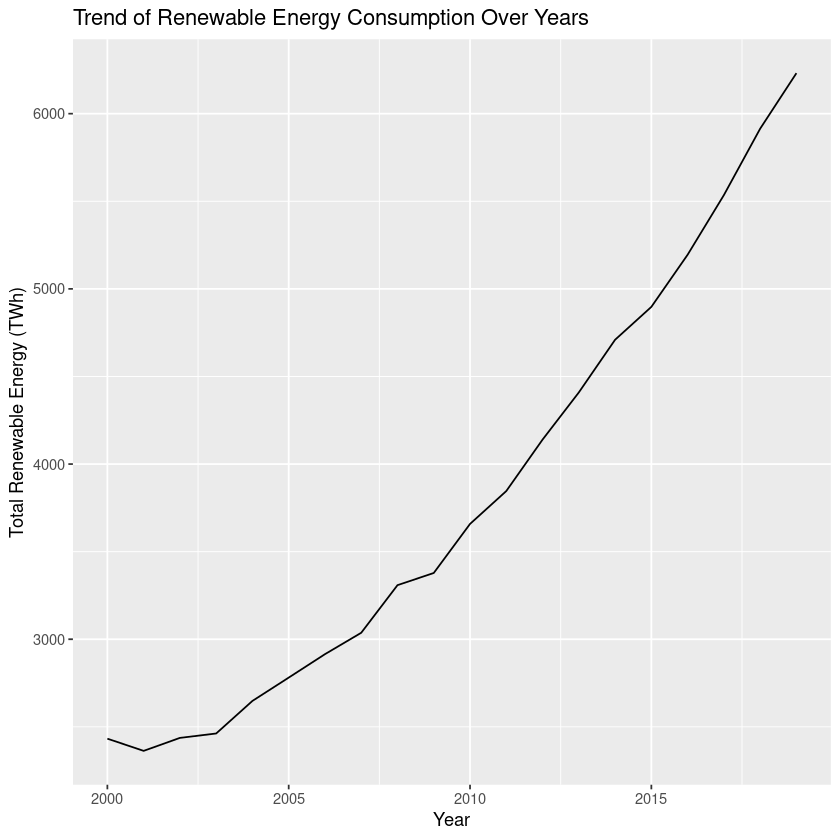

In [11]:
yearly_data <- new_data %>%
  group_by(Year) %>%
  summarize(TotalRenewable = sum(Electricity.from.renewables..TWh., na.rm = TRUE))
head(yearly_data)
# Plotting
ggplot(yearly_data, aes(x = Year, y = TotalRenewable)) +
  geom_line() +
  labs(title = "Trend of Renewable Energy Consumption Over Years", x = "Year", y = "Total Renewable Energy (TWh)")


On peut constater que la consommation de l'énergie renouvelable a une tendance à la hausse depuis l'année 2000

#### Correlation Between Renewable Energy Consumption and CO2 Emissions

In [12]:
correlation <- cor(new_data$Electricity.from.renewables..TWh., new_data$Value_co2_emissions_kt_by_country, use = "complete.obs")
print(paste("Correlation coefficient:", correlation))


[1] "Correlation coefficient: 0.857375283850699"


On remarque une forte corrélation entre la variable consommation de l'énergie renouvelable et l'émission de CO2. 
En effet, certains pays émettent beacoup de CO2 ce qui augmente leur responsabilité à l'égard de l'utilisation des énergies durables

####  L'impact des énergies renouvelables sur le PIB

`geom_smooth()` using formula = 'y ~ x'


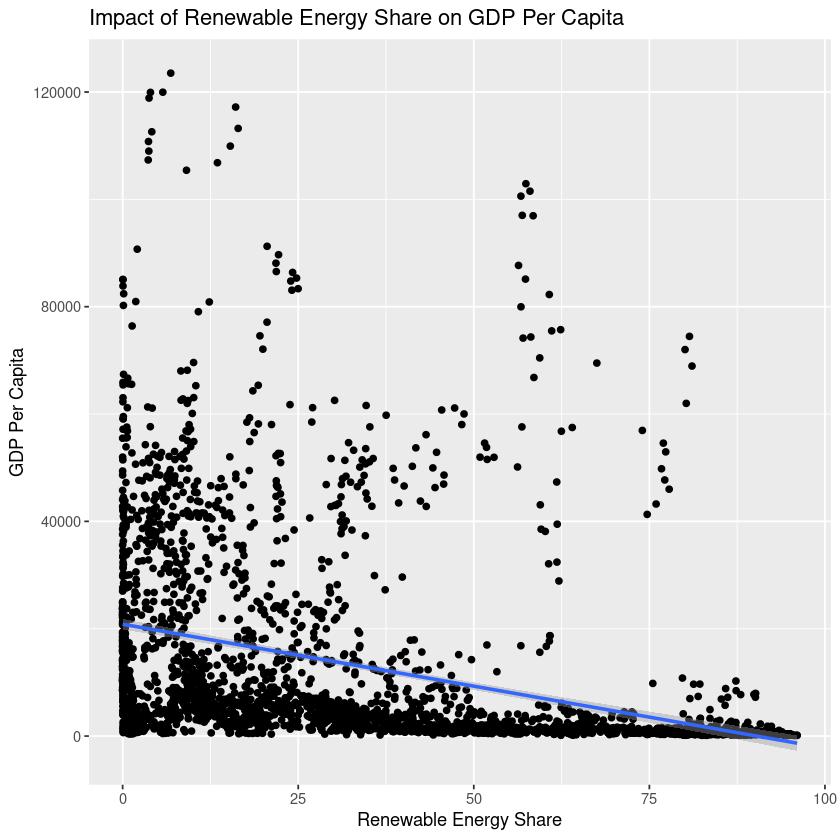

In [13]:
ggplot(new_data, aes(x = Renewable.energy.share.in.the.total.final.energy.consumption...., y = gdp_per_capita)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Impact of Renewable Energy Share on GDP Per Capita", x = "Renewable Energy Share", y = "GDP Per Capita")

Le graphique montre une large répartition du PIB par habitant entre différents niveaux de part des énergies renouvelables, ce qui indique que d'autres facteurs que la part des énergies renouvelables peuvent influencer de manière significative le PIB par habitant.

#### Analyse comparative des sources d'énergie

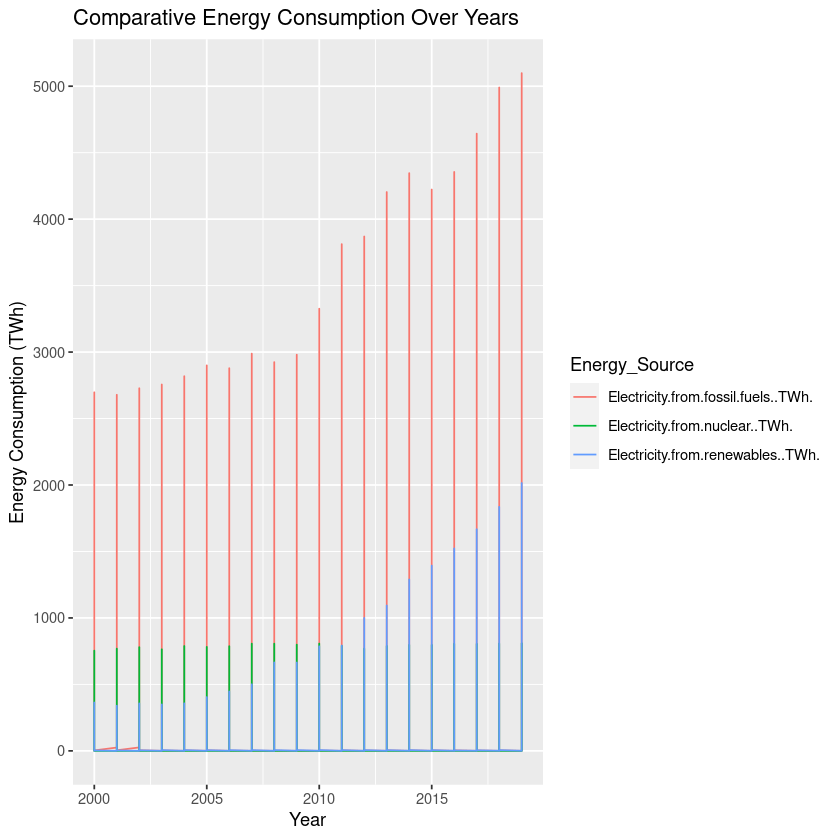

In [14]:
# Creating a long format for plotting
energy_data <- new_data %>%
  select(Year, Electricity.from.fossil.fuels..TWh., Electricity.from.nuclear..TWh., Electricity.from.renewables..TWh.) %>%
  pivot_longer(cols = -Year, names_to = "Energy_Source", values_to = "Consumption")

ggplot(energy_data, aes(x = Year, y = Consumption, color = Energy_Source)) +
  geom_line() +
  labs(title = "Comparative Energy Consumption Over Years", x = "Year", y = "Energy Consumption (TWh)")


D'après ce graphe, la consommation de l'énergie a une tendance croissante depuis l'année 2000.
De plus ,on remarque que la principale source d'énergie provient des combustibles fossiles et qu'à partir de l'année 2010, la majorité des pays nucléaires n'ont plus tendance à consommer ce type d'énergie.

#### Comparative Analysis of Energy Consumption by Country

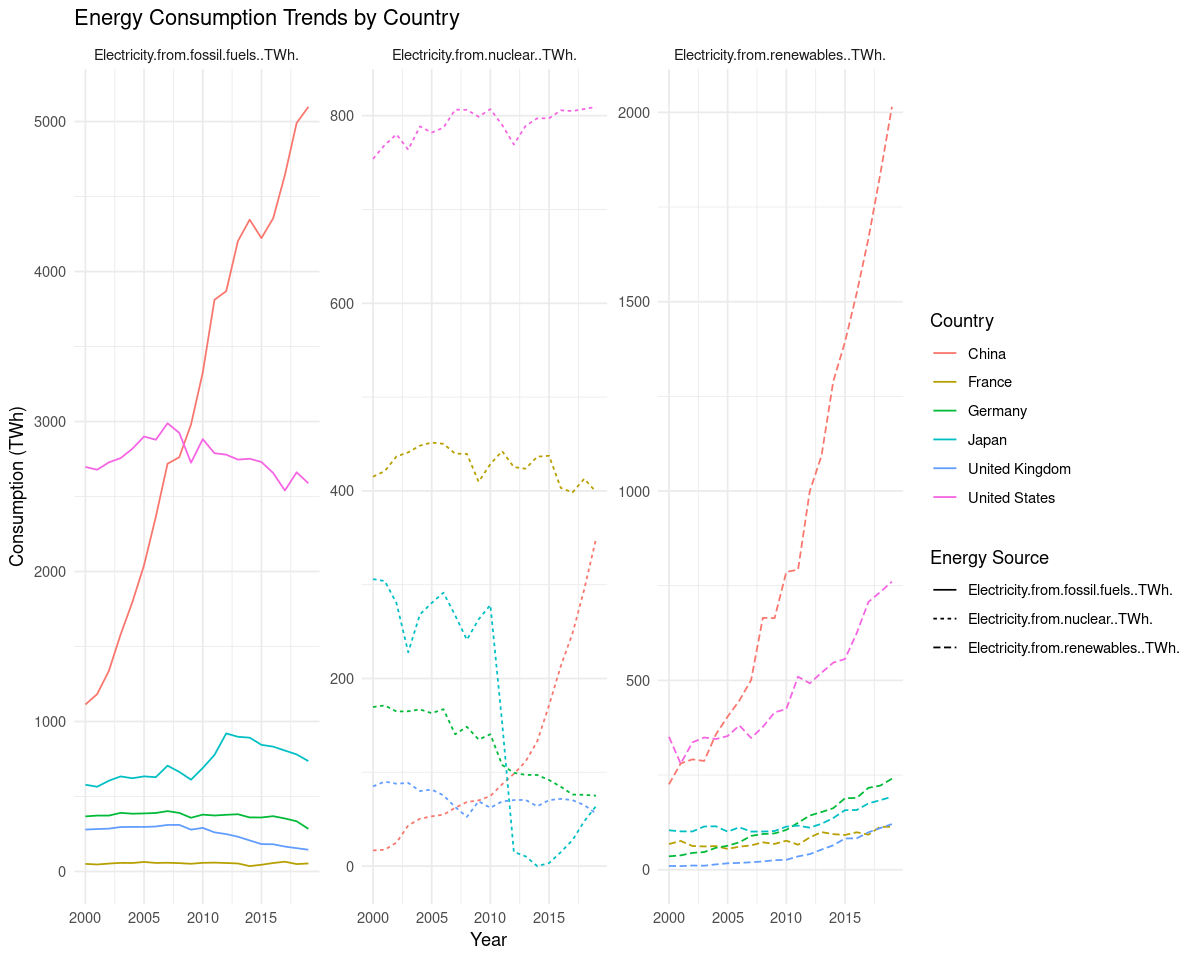

In [15]:
energy_data <- new_data %>%
  select(Entity, Year, Electricity.from.fossil.fuels..TWh., Electricity.from.nuclear..TWh., Electricity.from.renewables..TWh.) %>%
  pivot_longer(cols = c(Electricity.from.fossil.fuels..TWh., Electricity.from.nuclear..TWh., Electricity.from.renewables..TWh.),
               names_to = "Energy_Type", values_to = "Consumption")

# Now, filter to focus on specific countries or adjust as needed
filtered_energy_data <- energy_data %>%
  filter(Entity %in% c("China", "United Kingdom","United States","France","Germany","Japan"))  # Adjust this line to include the countries of interest

library(repr)
# Set plot width and height in inches
options(repr.plot.width=10, repr.plot.height=8)
# Plotting the energy consumption trends over time for the selected countries
ggplot(filtered_energy_data, aes(x = Year, y = Consumption, color = Entity, linetype = Energy_Type)) +
  geom_line() +
  facet_wrap(~Energy_Type, scales = "free_y") +
  labs(title = "Energy Consumption Trends by Country",
       x = "Year",
       y = "Consumption (TWh)",
       color = "Country",
       linetype = "Energy Source") +
  theme_minimal()


**Energie provenant des combustibles fossiles :** On remarque la Chine est le seul pays présentant une tendance croissante par rapport aux 5 autres pays qui présentent une tendance plutôt constante.<br>
**Energie nucléaire:** Les Etats-unis et la France sont les deux pays qui consomment le plus de l'énergie nucléaire.
Cependant , on peut remarquer une tendance très croissante depuis 2013 de la part de la Chine par rapport aux 3 autres pays qui ont tendance à décroître. <br>
    **Energie renouvelable:** La Chine est de loin le pays le plus consommateur des énergies renouvelables avec une évolution très significative depuis les 10 dernières années. Les autres pays ont aussi augmenté niveau consommation de ce type d'énergie mais avec une évolution beaucoup moins importante que la Chine.

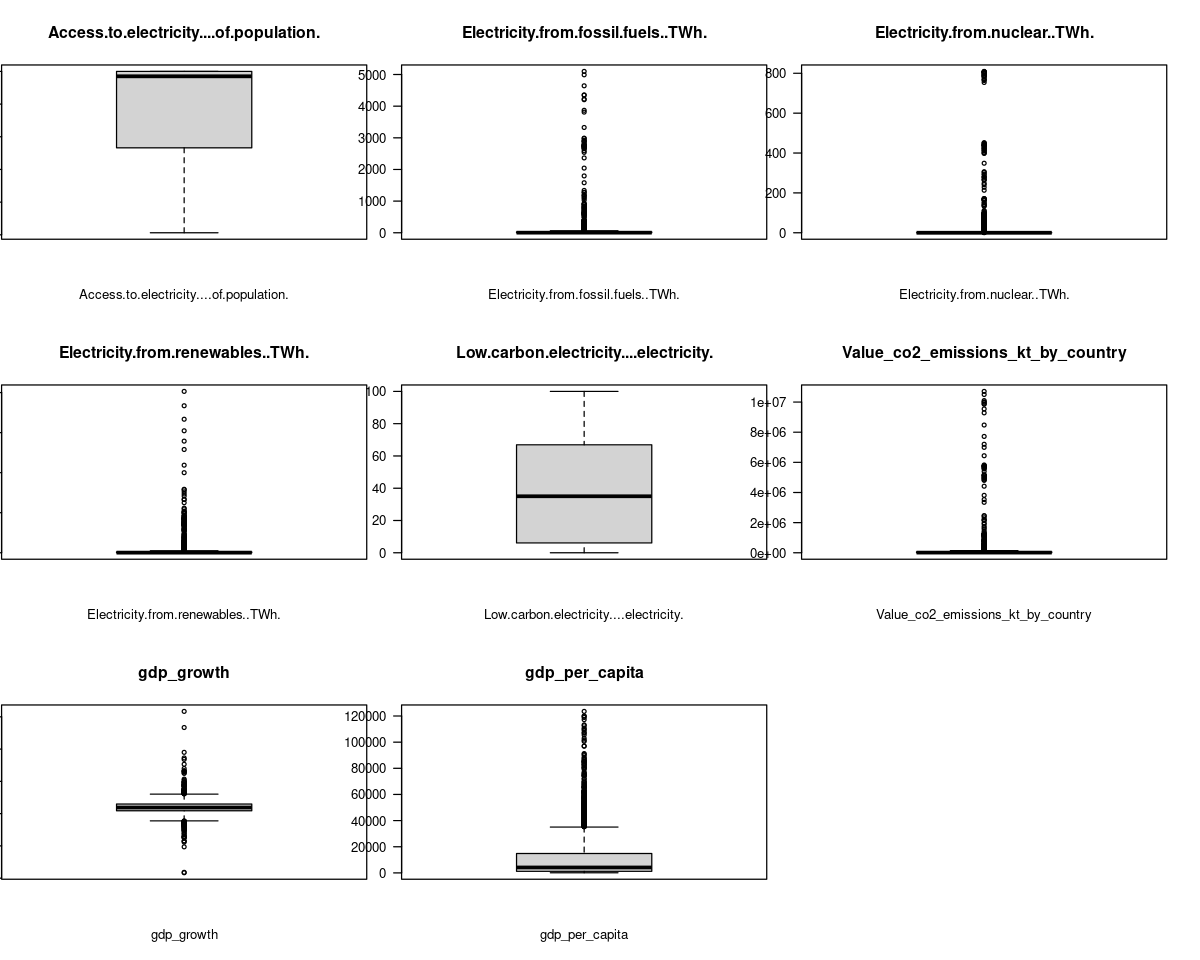

In [16]:
# Liste des variables de new_data pour lesquelles tracer les boxplots
variables <- c("Access.to.electricity....of.population.",
               "Electricity.from.fossil.fuels..TWh.",
               "Electricity.from.nuclear..TWh.",
               "Electricity.from.renewables..TWh.",
               "Low.carbon.electricity....electricity.",
               "Value_co2_emissions_kt_by_country",
               "gdp_growth",
               "gdp_per_capita")

par(mfrow=c(3, 3), mar=c(5, 0, 4, 2) + 0.1, oma=c(0,0,0,0))


for(variable in variables) {
  if(variable %in% names(new_data)) {
    boxplot(new_data[[variable]], main=variable, horizontal=FALSE, las=2, xlab=variable)
  }
}

# Réinitialiser les paramètres graphiques à leur valeur par défaut
par(mfrow=c(1, 1), mar=c(5, 4, 4, 2) + 0.1, oma=c(0,0,0,0))

**=>** Les boxplots révèlent une distribution très large et asymétrique pour plusieurs variables clés comme l'électricité produite à partir de combustibles fossiles, les émissions de CO2, et le PIB par habitant, avec la présence marquée d'outliers. Ces caractéristiques suggèrent une forte hétérogénéité entre les pays et indiquent la nécessité de normaliser les données, possiblement par une transformation logarithmique, pour des analyses plus robustes et comparables.
On construit notre nouvelle base de données **scaled_data**.

#### Top 5 des pays émetteurs de CO2

On trace le graphe des 5 plus gros émetteurs de C02

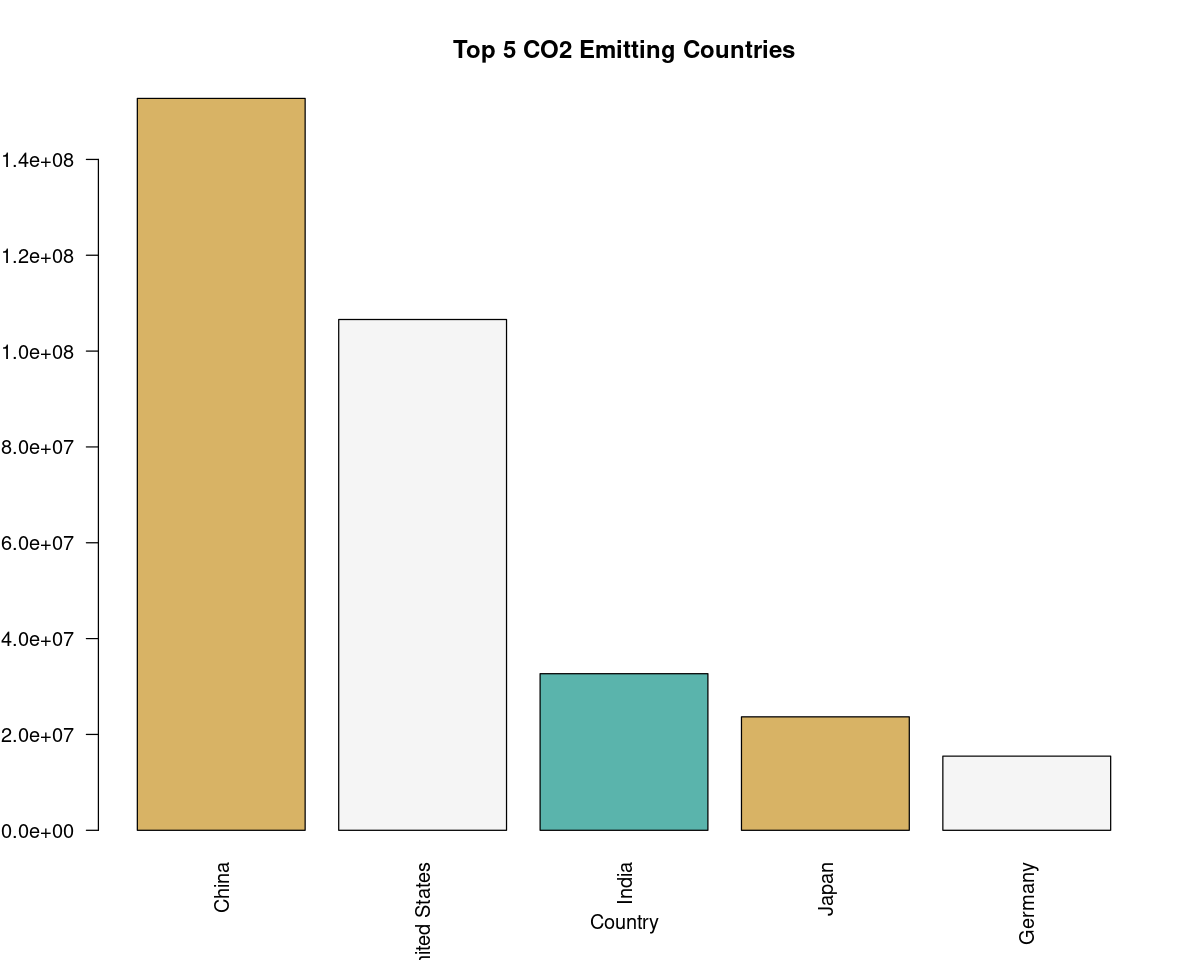

In [17]:
data_group = new_data %>% group_by(Entity) %>% summarise(emissions_co2 = sum(Value_co2_emissions_kt_by_country))

top5_countries <- head(data_group[order(-data_group$emissions_co2), ], 5)

barplot(top5_countries$emissions_co2, names.arg = top5_countries$Entity, las = 2,
        main = "Top 5 CO2 Emitting Countries", xlab = "Country", ylab = " ", col = brewer.pal(n = 3, name = "BrBG"))

**=>** A partir de ce graphe , on peut constater que la Chine et les Etats-unis émettent **au moins 4 fois plus que** les trois autres pays (Inde , Japan et Allemagne) combinés.

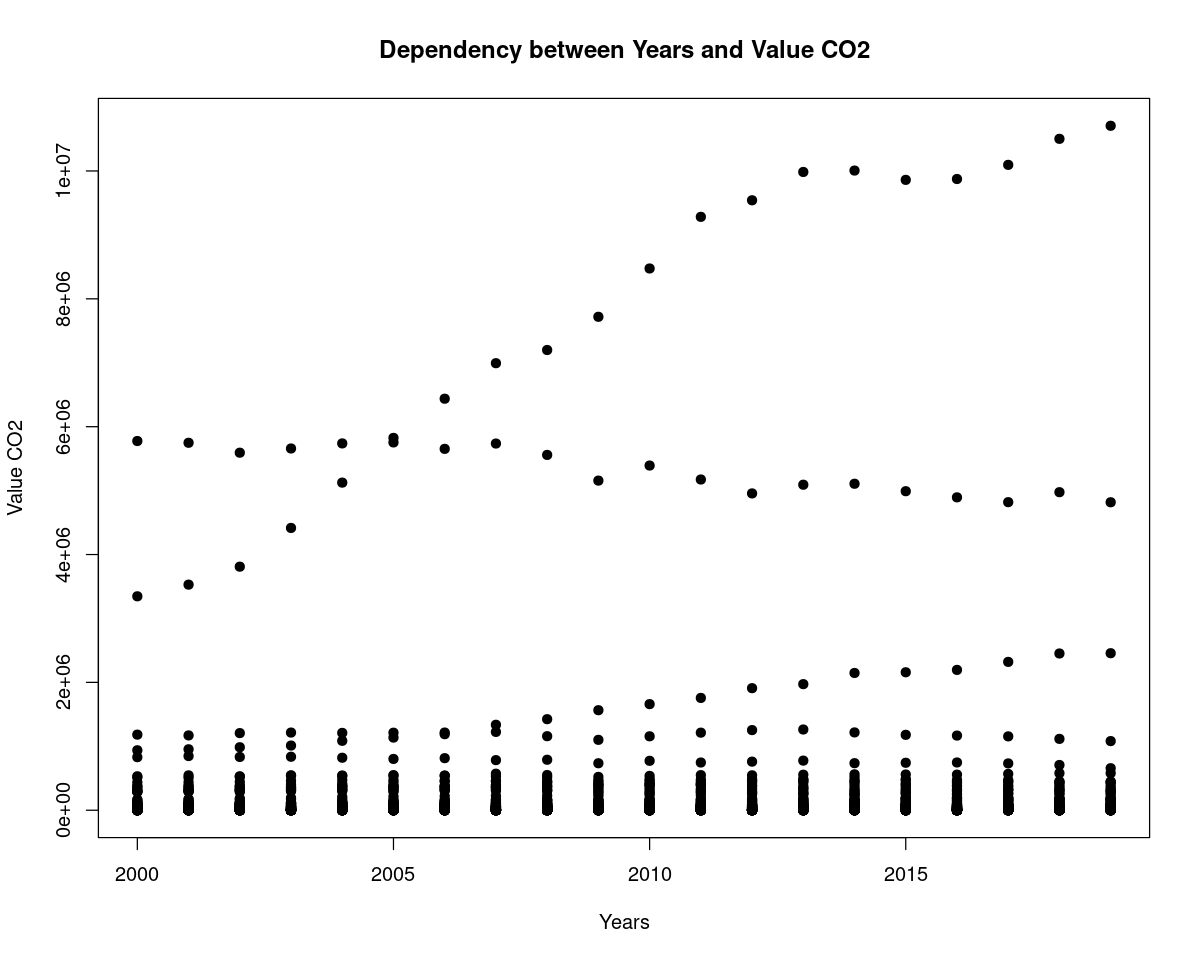

In [18]:
#Visualiser la dépendance entre la variable "Years" et la variable à prédire "Value_co2_emissions_kt_by_country"
plot(new_data$Year,new_data$Value_co2_emissions_kt_by_country, main="Dependency between Years and Value CO2", xlab="Years", ylab="Value CO2", pch=19)

In [19]:
dt_china<-new_data[new_data$Entity=='China',]
dt_usa<-new_data [new_data$Entity=='United States',]
head(dt_china)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
715,China,2000,97.02180,42.0,29.63,1113.30,16.74,225.56,17.87400,9334.936,10.85,3346530,8.490093,959.3725,153,9596960,35.86166,104.1954
716,China,2001,97.27279,42.3,28.36,1182.59,17.47,280.73,20.13790,9797.812,10.36,3529080,8.335733,1053.1082,153,9596960,35.86166,104.1954
717,China,2002,97.51620,43.1,27.00,1337.46,25.13,291.41,19.13785,10602.087,10.12,3810060,9.133631,1148.5083,153,9596960,35.86166,104.1954
718,China,2003,97.75438,43.4,23.86,1579.96,43.34,287.28,17.30469,12273.320,10.48,4415910,10.038030,1288.6433,153,9596960,35.86166,104.1954
719,China,2004,97.98967,44.9,20.17,1795.41,50.47,357.43,18.51306,14272.745,10.83,5124820,10.113621,1508.6681,153,9596960,35.86166,104.1954
720,China,2005,98.22443,46.3,17.44,2042.80,53.09,404.37,18.29650,16114.158,10.72,5824630,11.394592,1753.4178,153,9596960,35.86166,104.1954


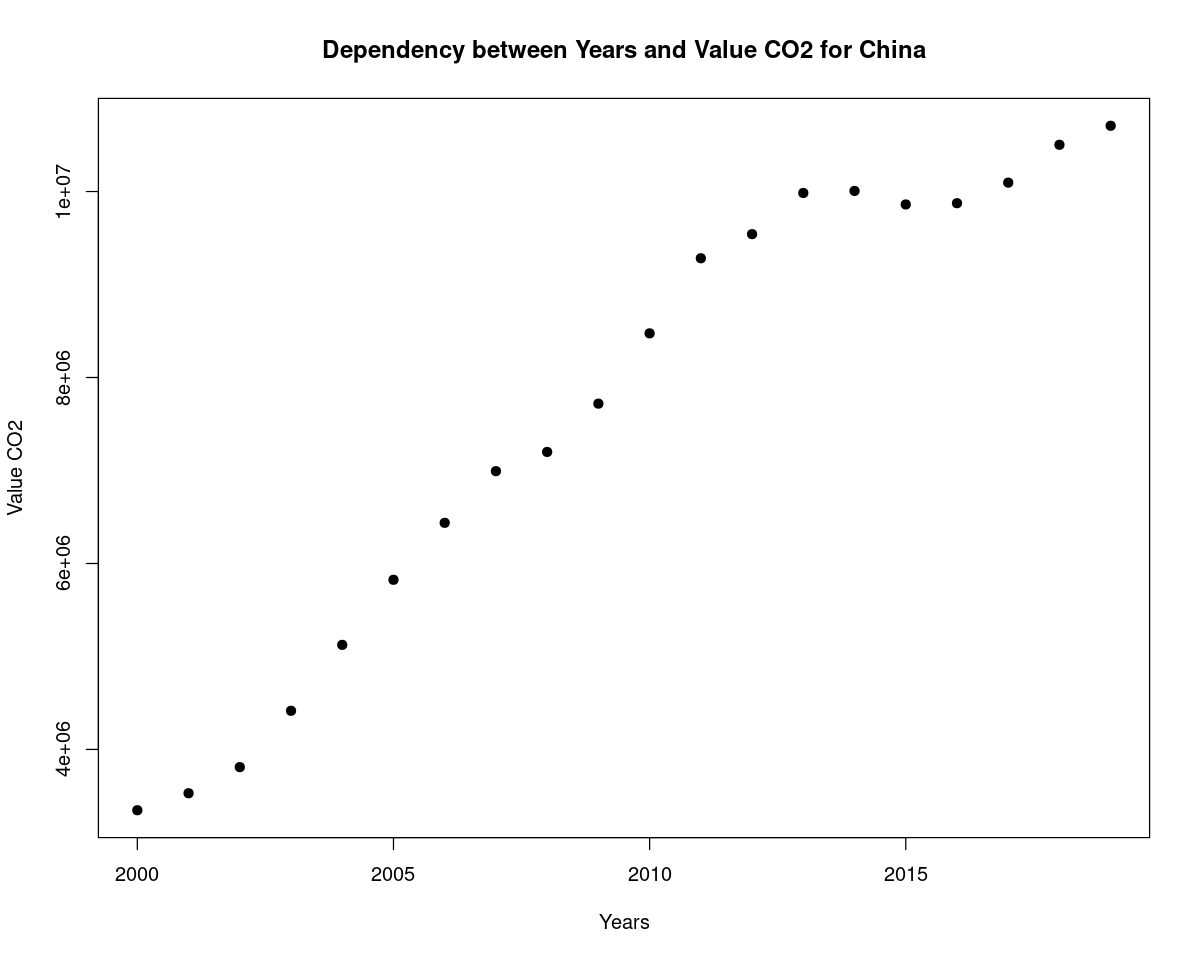

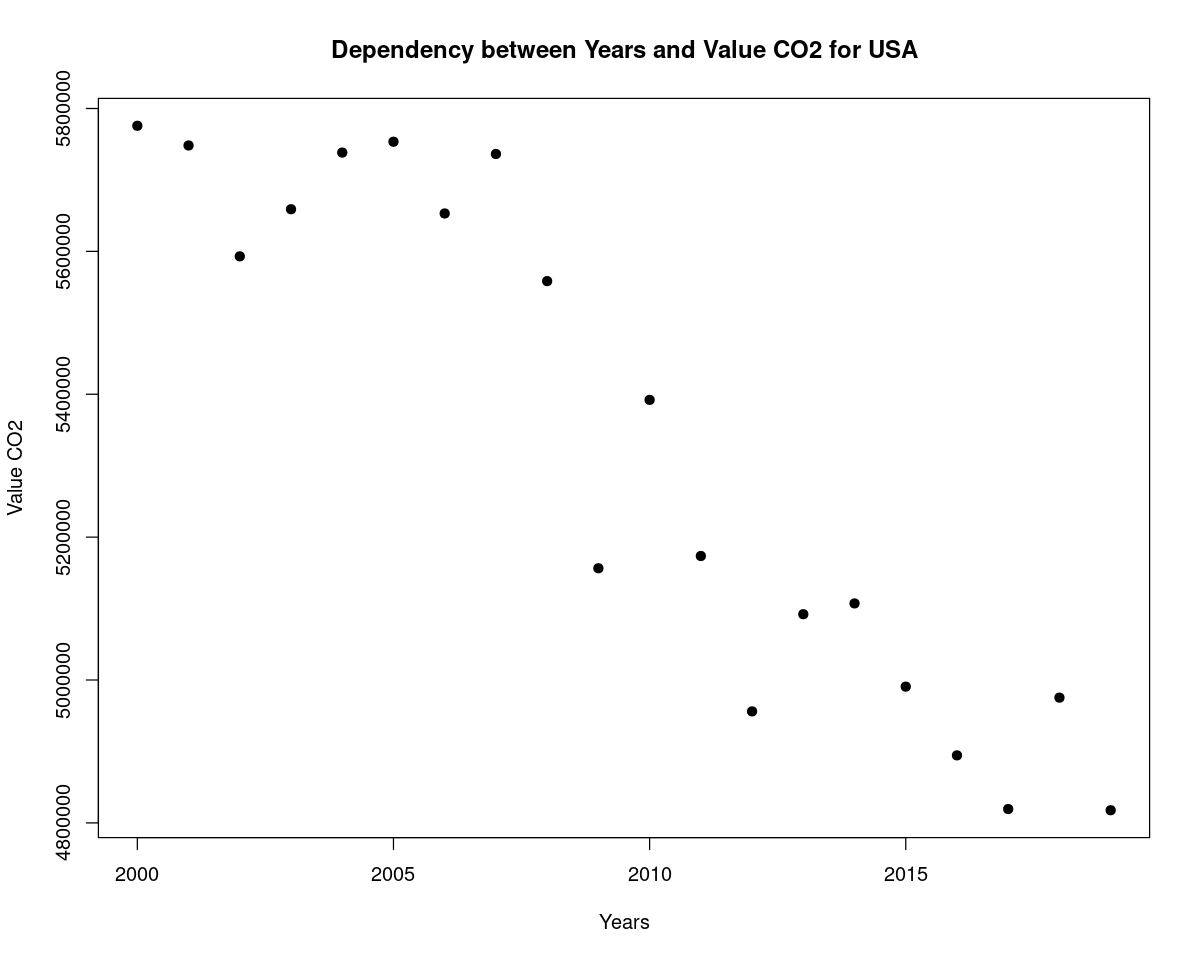

In [20]:
# Visualisation des émissions de CO2 par année pour la Chine
plot(dt_china$Year,dt_china$Value_co2_emissions_kt_by_country, main="Dependency between Years and Value CO2 for China", xlab="Years", ylab="Value CO2", pch=19)
# Visualisation des émissions de CO2 par année pour les Etats-Unis
plot(dt_usa$Year,dt_usa$Value_co2_emissions_kt_by_country, main="Dependency between Years and Value CO2 for USA", xlab="Years", ylab="Value CO2", pch=19)

On peut remarquer à partir de ces graphes que l'émission de CO2 dans les Etats-unis et la Chine est très importante par rapport aux autres pays qui présentent des taux très faibles par rapport à ces deux derniers.
De plus , on pourra remarquer qu'à partir de l'année 2005 , la Chine a devancé les Etats-unis en devenant le premier émetteur de CO2.


#### Normalisation des données pour l'ACP

In [21]:
scaled_data<-scale(new_data[,c(3:18)])
scaled_data <- cbind(new_data[,c(1,2)], scaled_data)
head(scaled_data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Afghanistan,2003,-1.962723,-1.342305,0.02857477,-0.2040051,-0.1946913,-0.2412979,0.7950071,-0.6968803,-1.1231884,-0.2048827,1.062712614,-0.6612948,-0.2265952,-0.003481871,0.6338505,0.8359896
5,Afghanistan,2004,-1.793684,-1.306625,0.28103946,-0.2039517,-0.1946913,-0.2419482,0.6760129,-0.6975741,-1.1790947,-0.2051150,-0.534097141,-0.6601898,-0.2265952,-0.003481871,0.6338505,0.8359896
6,Afghanistan,2005,-1.624663,-1.273495,-0.06401782,-0.2039250,-0.1946913,-0.2416695,0.6910908,-0.6962846,-1.1203931,-0.2044793,1.578777364,-0.6585534,-0.2265952,-0.003481871,0.6338505,0.8359896
7,Afghanistan,2006,-1.455582,-1.231444,-0.13029813,-0.2042989,-0.1946913,-0.2412050,1.0611289,-0.6948734,-1.0952353,-0.2042226,0.314722045,-0.6573948,-0.2265952,-0.003481871,0.6338505,0.8359896
8,Afghanistan,2007,-1.286358,-1.194491,-0.23388193,-0.2042989,-0.1946913,-0.2401831,1.1411435,-0.6935294,-1.0868493,-0.2042104,2.137714332,-0.6522716,-0.2265952,-0.003481871,0.6338505,0.8359896
9,Afghanistan,2008,-1.084869,-1.158812,-0.48734583,-0.2043256,-0.1946913,-0.2421340,0.9967585,-0.6866946,-0.9722414,-0.2020222,0.006383943,-0.6520062,-0.2265952,-0.003481871,0.6338505,0.8359896


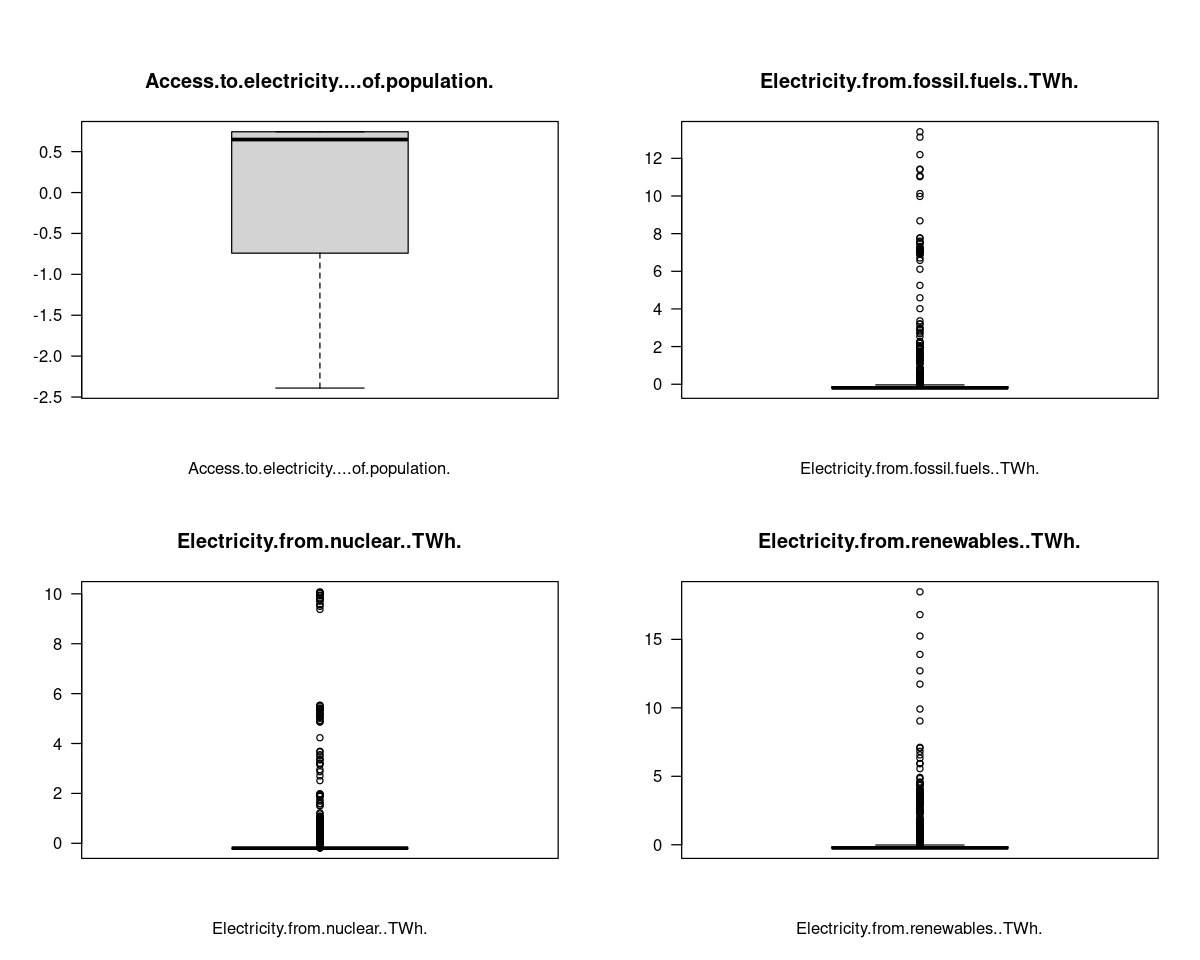

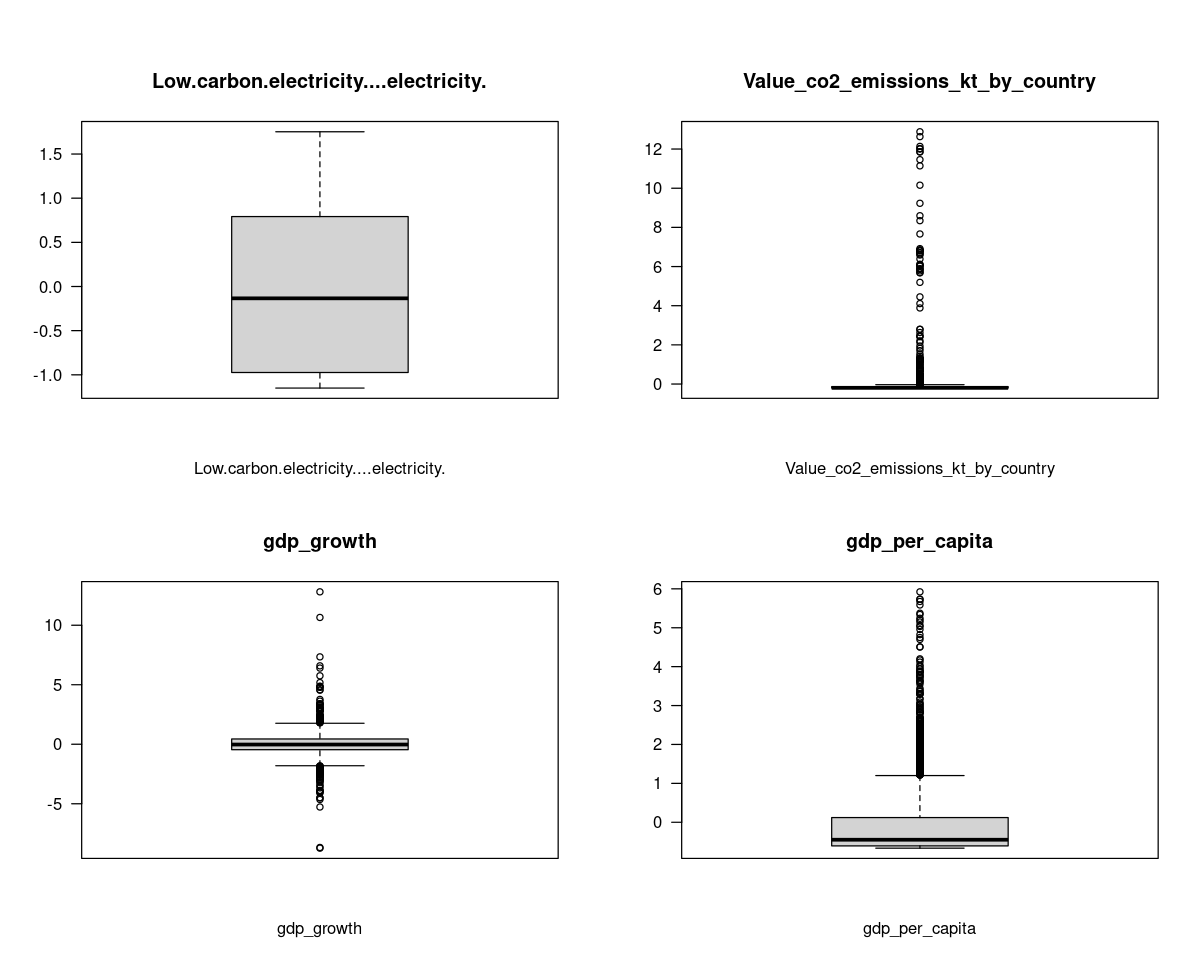

In [22]:
# Liste des variables de scaled_data pour lesquelles tracer les boxplots
variables <- c("Access.to.electricity....of.population.",
               "Electricity.from.fossil.fuels..TWh.",
               "Electricity.from.nuclear..TWh.",
               "Electricity.from.renewables..TWh.",
               "Low.carbon.electricity....electricity.",
               "Value_co2_emissions_kt_by_country",
               "gdp_growth",
               "gdp_per_capita")

par(mfrow=c(2, 2), mar=c(5, 4, 4, 2) + 0.1, oma=c(0,0,2,0))


for(variable in variables) {
  if(variable %in% names(scaled_data)) {
    boxplot(scaled_data[[variable]], main=variable, horizontal=FALSE, las=2, xlab=variable)
  }
}

# Réinitialiser les paramètres graphiques à leur valeur par défaut
par(mfrow=c(1, 1), mar=c(5, 4, 4, 2) + 0.1, oma=c(0,0,0,0))

### Analyse multidimensionnelle:

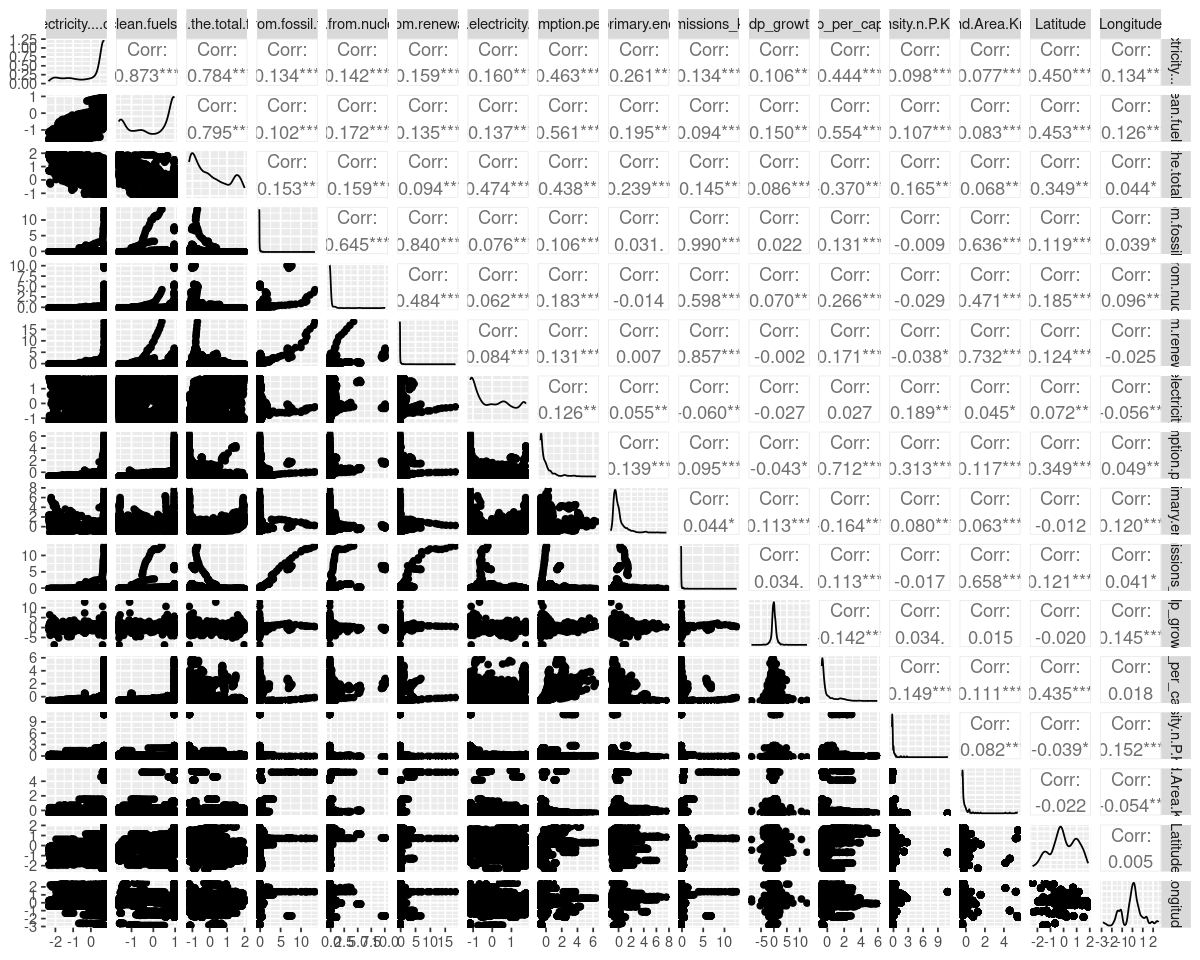

In [23]:
ggpairs(scaled_data[,c(3:18)])

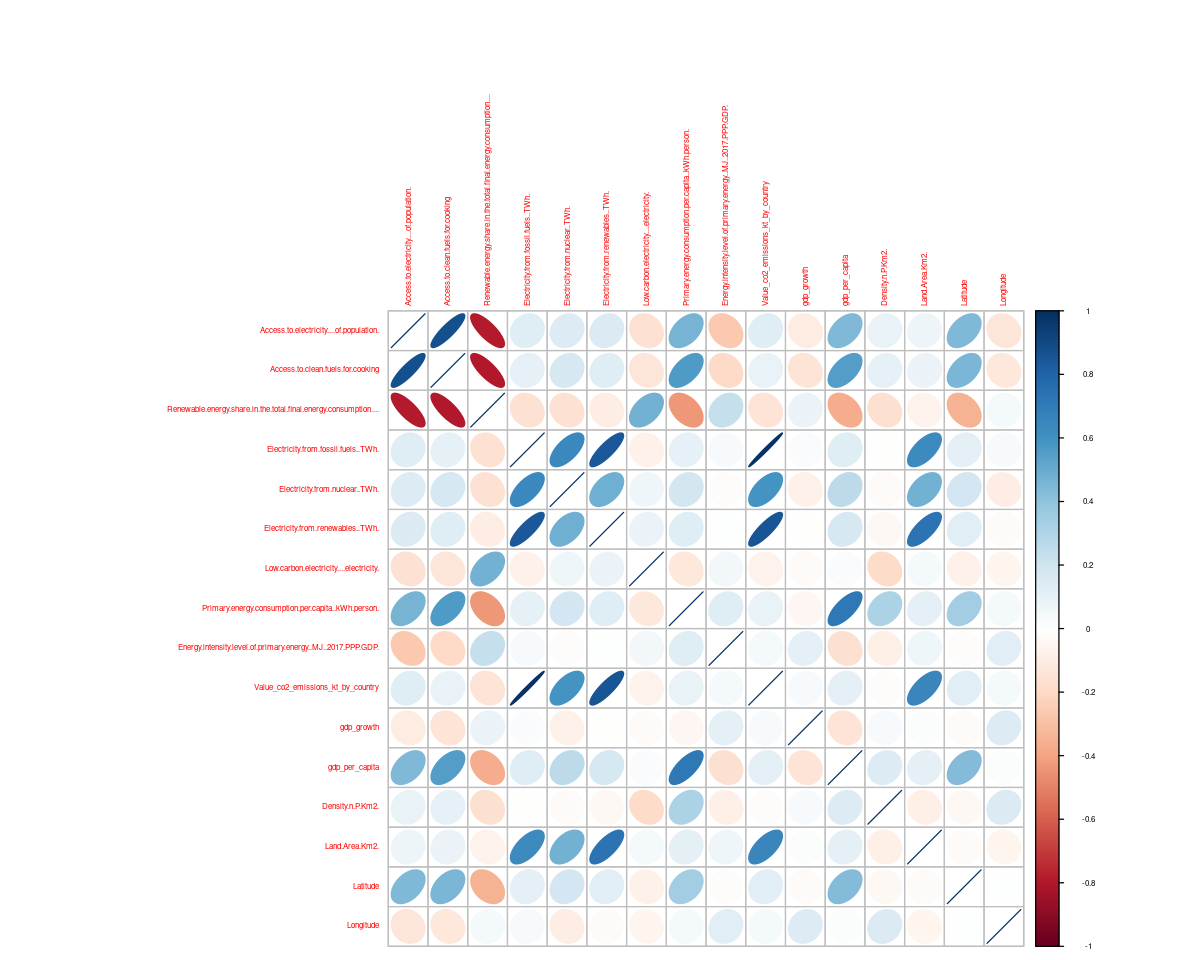

In [24]:
corrplot(cor(scaled_data[, c(3:18)]),method="ellipse",mar=c(0,0,0,0), tl.cex=0.4, cl.cex=0.4)

`geom_smooth()` using formula = 'y ~ x'


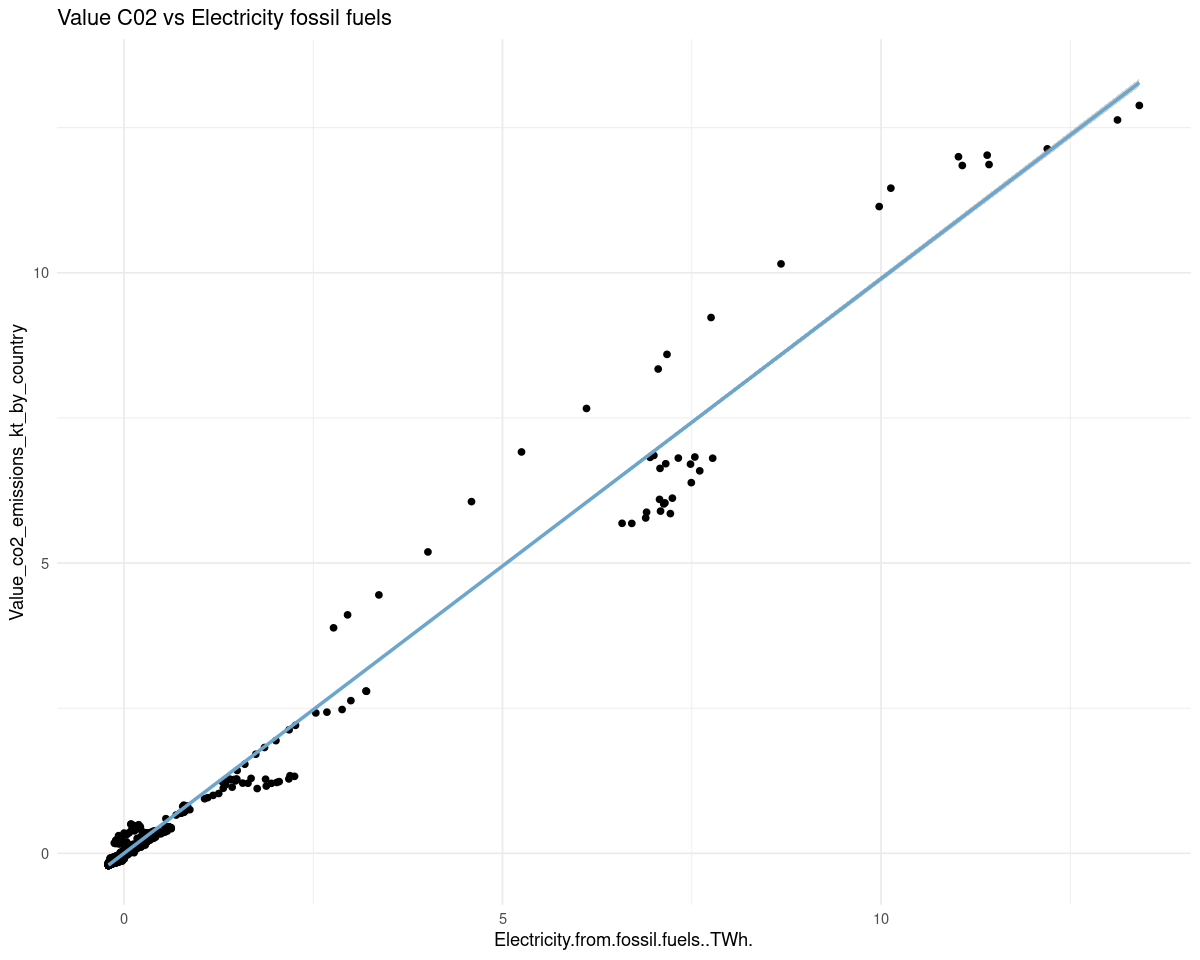

In [25]:
ggplot(scaled_data, aes(y=Value_co2_emissions_kt_by_country,x=Electricity.from.fossil.fuels..TWh.)) + 
  geom_point() + 
  theme_minimal() + geom_smooth(method="lm", se=TRUE, col="skyblue3") + labs(title = 'Value C02 vs Electricity fossil fuels')

**=>** On constate que la variable à prédire **Value_co2_emissions_kt_by_country** est fortement correlée avec la variable **Electricity.from.fossil.fuels..TWh.** . En effet d'après le graphe ci-dessus, On remarque que la variable à prédire **Value_co2_emissions_kt_by_country** représente une fonction linéaire de la variable **Electricity.from.fossil.fuels..TWh.**.Dans un but académique, on va l'enlever de notre base de données dans le cadre de ce projet.



In [26]:
# On supprime la variable Electricity.from.fossil.fuels..TWh. 
new_scaled_data<-scaled_data[,c(3:5,7:18)]
summary(new_scaled_data)

 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :-2.3907                         Min.   :-1.5844                  
 1st Qu.:-0.7409                         1st Qu.:-1.0218                  
 Median : 0.6479                         Median : 0.4939                  
 Mean   : 0.0000                         Mean   : 0.0000                  
 3rd Qu.: 0.7431                         3rd Qu.: 0.9641                  
 Max.   : 0.7431                         Max.   : 0.9641                  
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   :-1.1924                                                 
 1st Qu.:-0.8864                                                 
 Median :-0.2335                                                 
 Mean   : 0.0000                                                 
 3rd Qu.: 0.8282                                                 
 Max.   : 2.0063                                                 
 Electricity.

In [27]:
#Re-ajoutons Year et Entity dans le dataset
new_scaled_data <- cbind(new_data[,c(1,2)], new_scaled_data)
head(new_scaled_data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Afghanistan,2003,-1.962723,-1.342305,0.02857477,-0.1946913,-0.2412979,0.7950071,-0.6968803,-1.1231884,-0.2048827,1.062712614,-0.6612948,-0.2265952,-0.003481871,0.6338505,0.8359896
5,Afghanistan,2004,-1.793684,-1.306625,0.28103946,-0.1946913,-0.2419482,0.6760129,-0.6975741,-1.1790947,-0.2051150,-0.534097141,-0.6601898,-0.2265952,-0.003481871,0.6338505,0.8359896
6,Afghanistan,2005,-1.624663,-1.273495,-0.06401782,-0.1946913,-0.2416695,0.6910908,-0.6962846,-1.1203931,-0.2044793,1.578777364,-0.6585534,-0.2265952,-0.003481871,0.6338505,0.8359896
7,Afghanistan,2006,-1.455582,-1.231444,-0.13029813,-0.1946913,-0.2412050,1.0611289,-0.6948734,-1.0952353,-0.2042226,0.314722045,-0.6573948,-0.2265952,-0.003481871,0.6338505,0.8359896
8,Afghanistan,2007,-1.286358,-1.194491,-0.23388193,-0.1946913,-0.2401831,1.1411435,-0.6935294,-1.0868493,-0.2042104,2.137714332,-0.6522716,-0.2265952,-0.003481871,0.6338505,0.8359896
9,Afghanistan,2008,-1.084869,-1.158812,-0.48734583,-0.1946913,-0.2421340,0.9967585,-0.6866946,-0.9722414,-0.2020222,0.006383943,-0.6520062,-0.2265952,-0.003481871,0.6338505,0.8359896


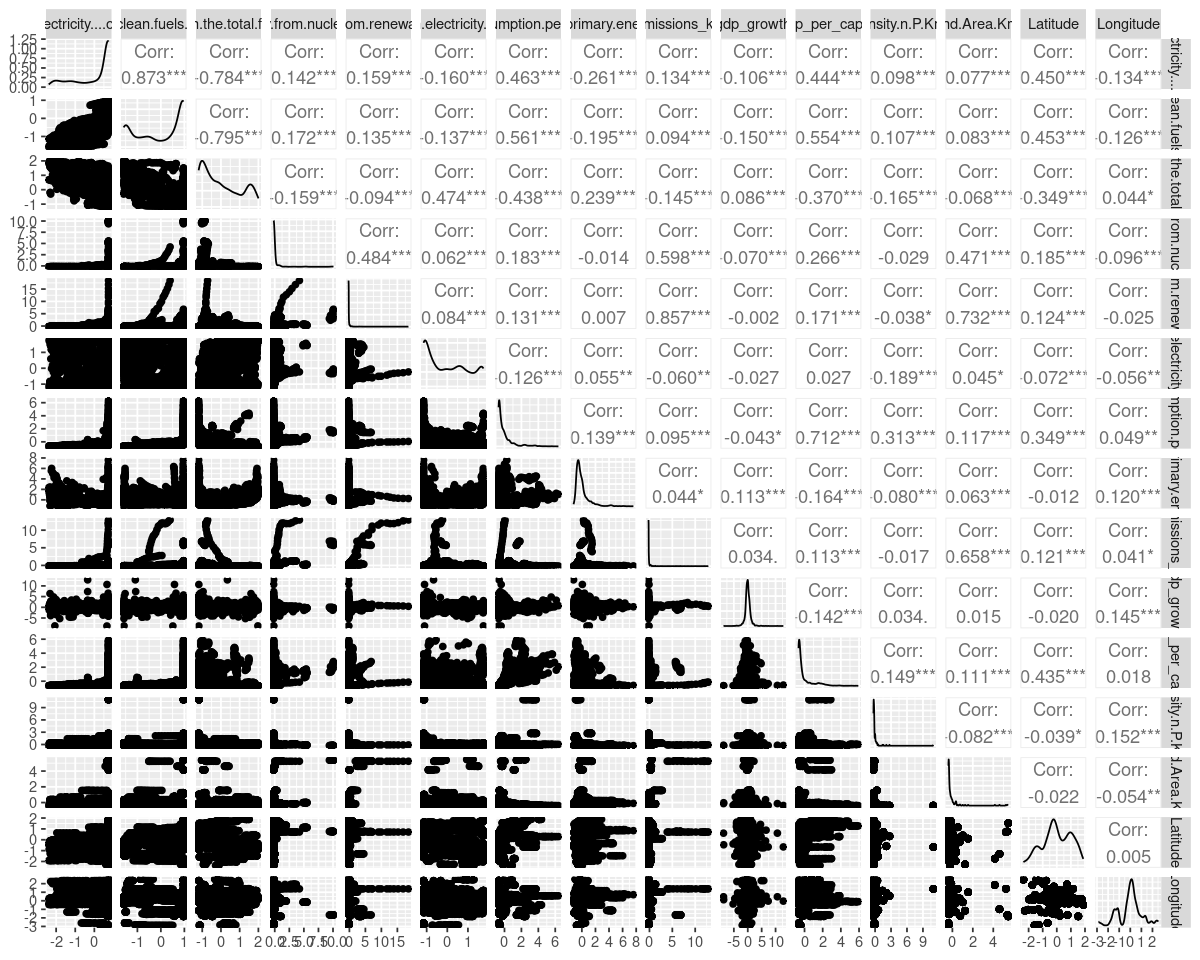

In [28]:
ggpairs(new_scaled_data[,c(3:17)])

## Analyse en composantes principales (ACP)

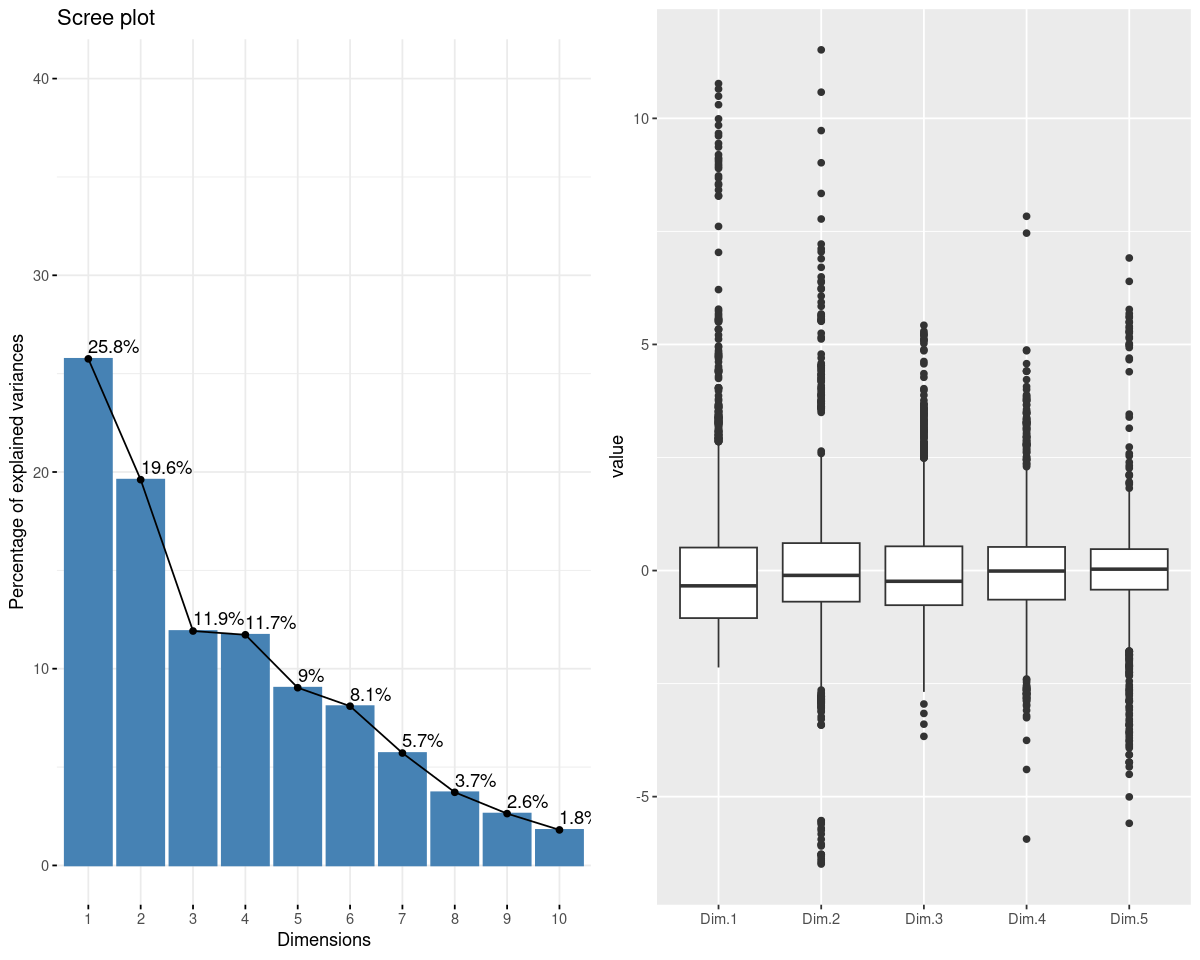

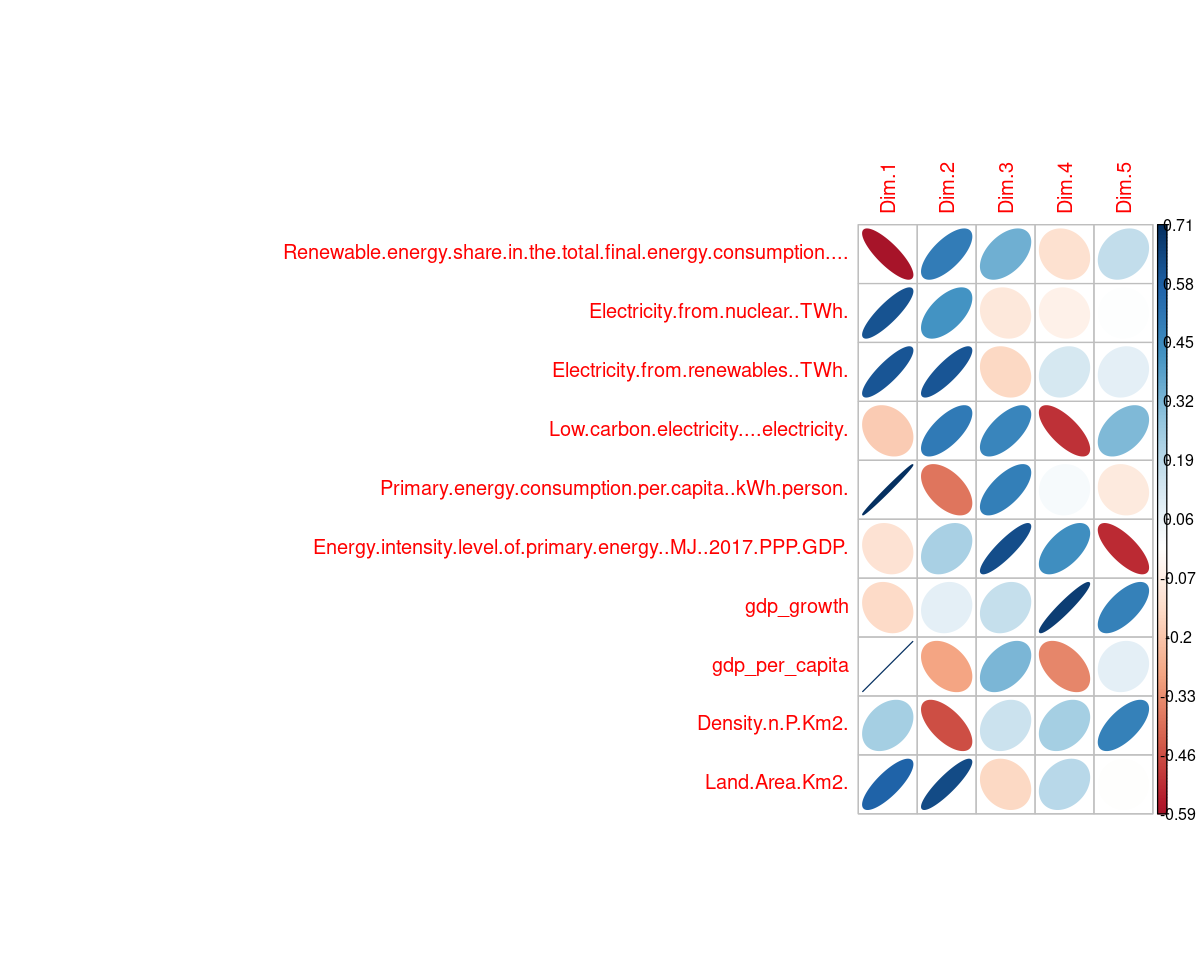

In [29]:
# ACP réduite
acp <- PCA(new_scaled_data[, c(3:10, 12:15)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 5)
# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

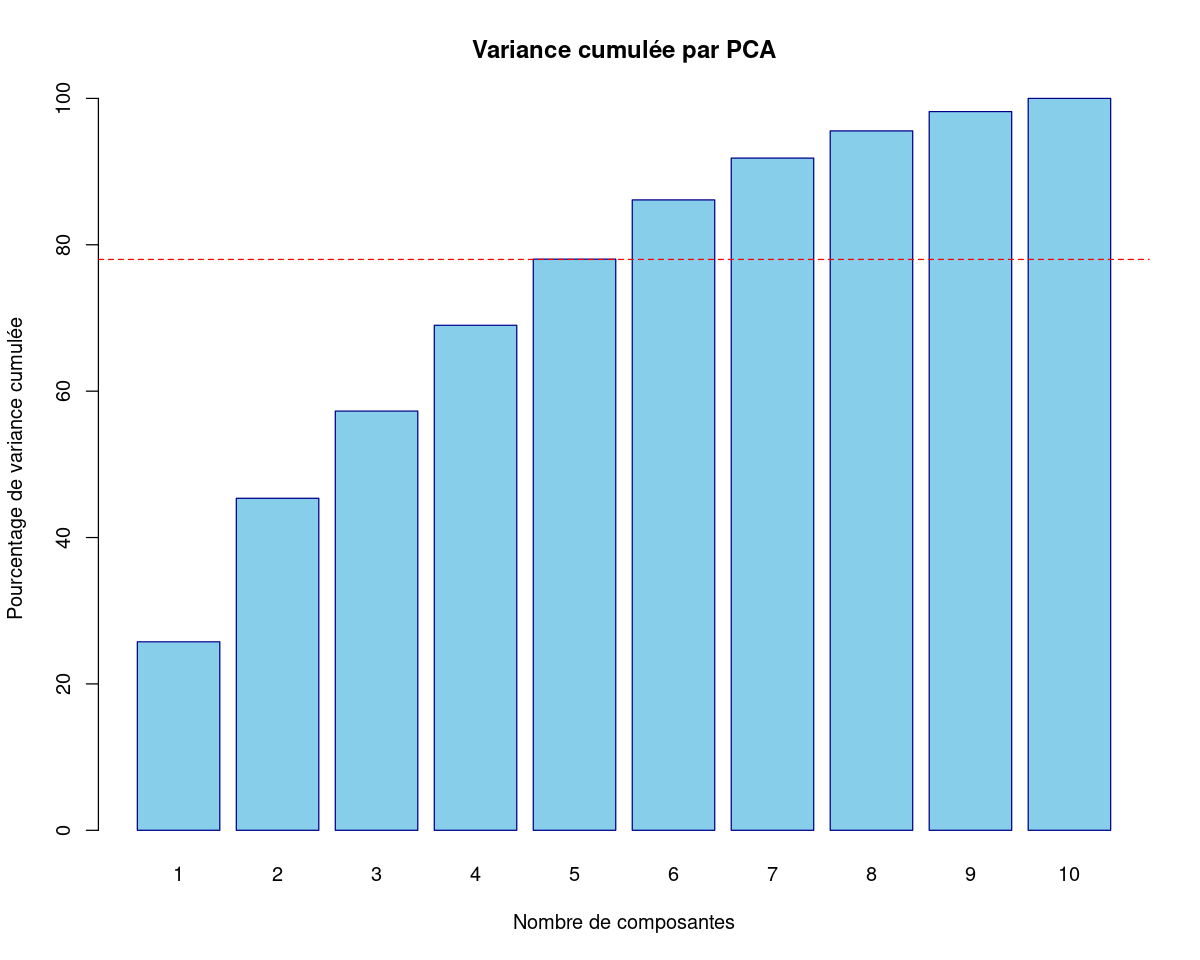

In [30]:
# Calculer la variance cumulée
variance_cumulee <- cumsum(acp$eig[,2])

# Tracer le barplot de la variance cumulée
barplot(variance_cumulee, names.arg = 1:length(variance_cumulee),
        xlab = "Nombre de composantes", ylab = "Pourcentage de variance cumulée",
        main = "Variance cumulée par PCA", col = "skyblue",
        border = "darkblue")
abline(h = 78, col = "red", lty = 2)

Avec 5 composantes , on pourra expliciter approximativement 78% de la variance.

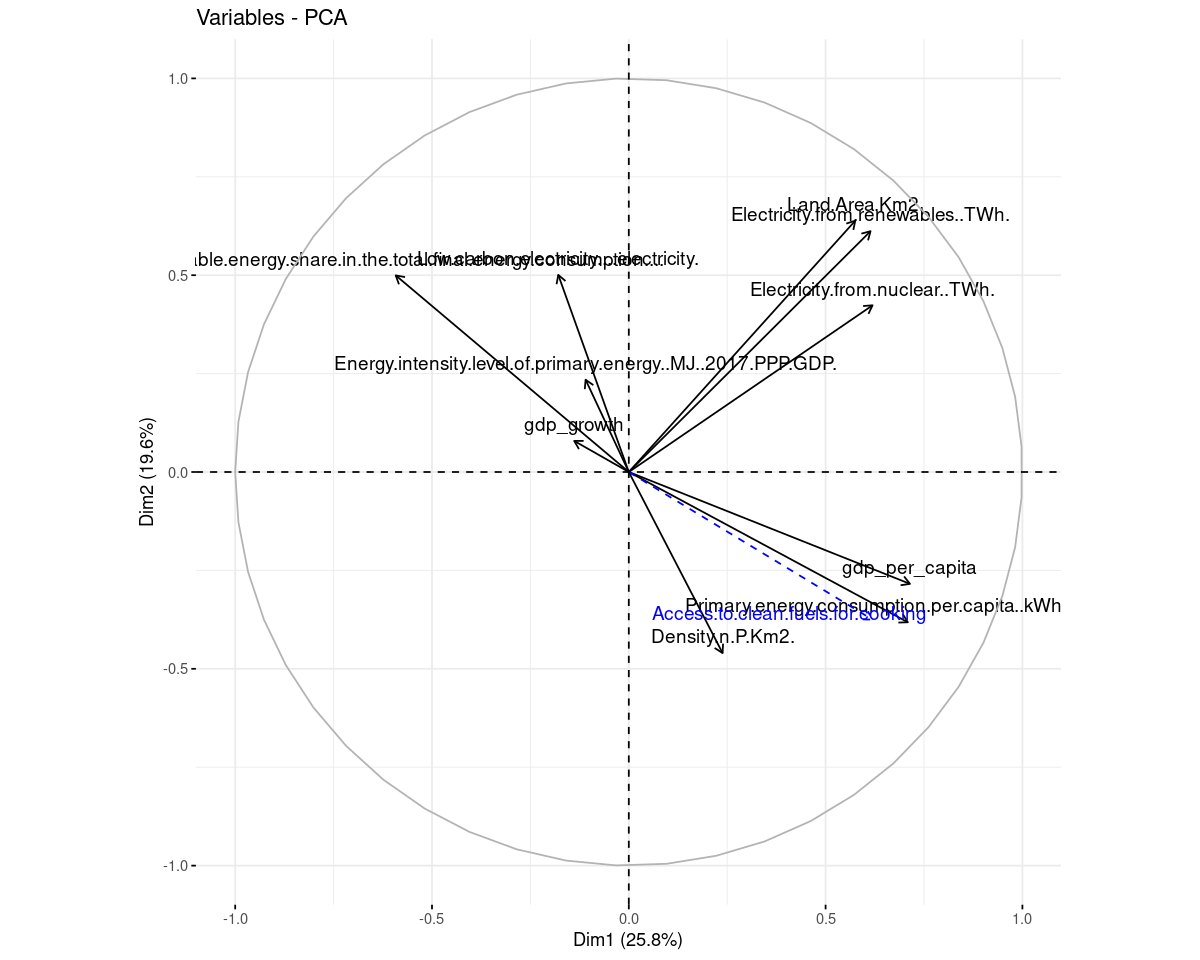

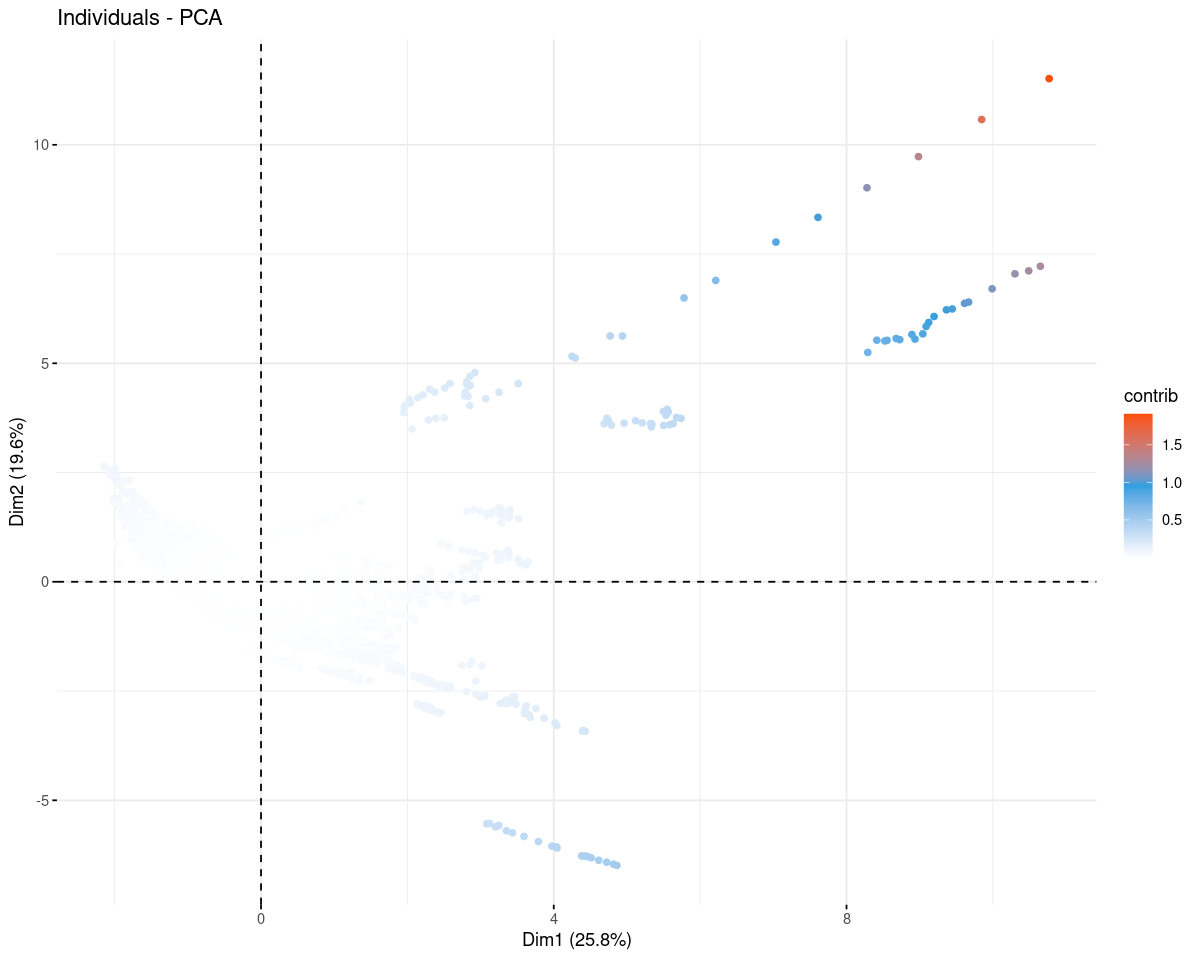

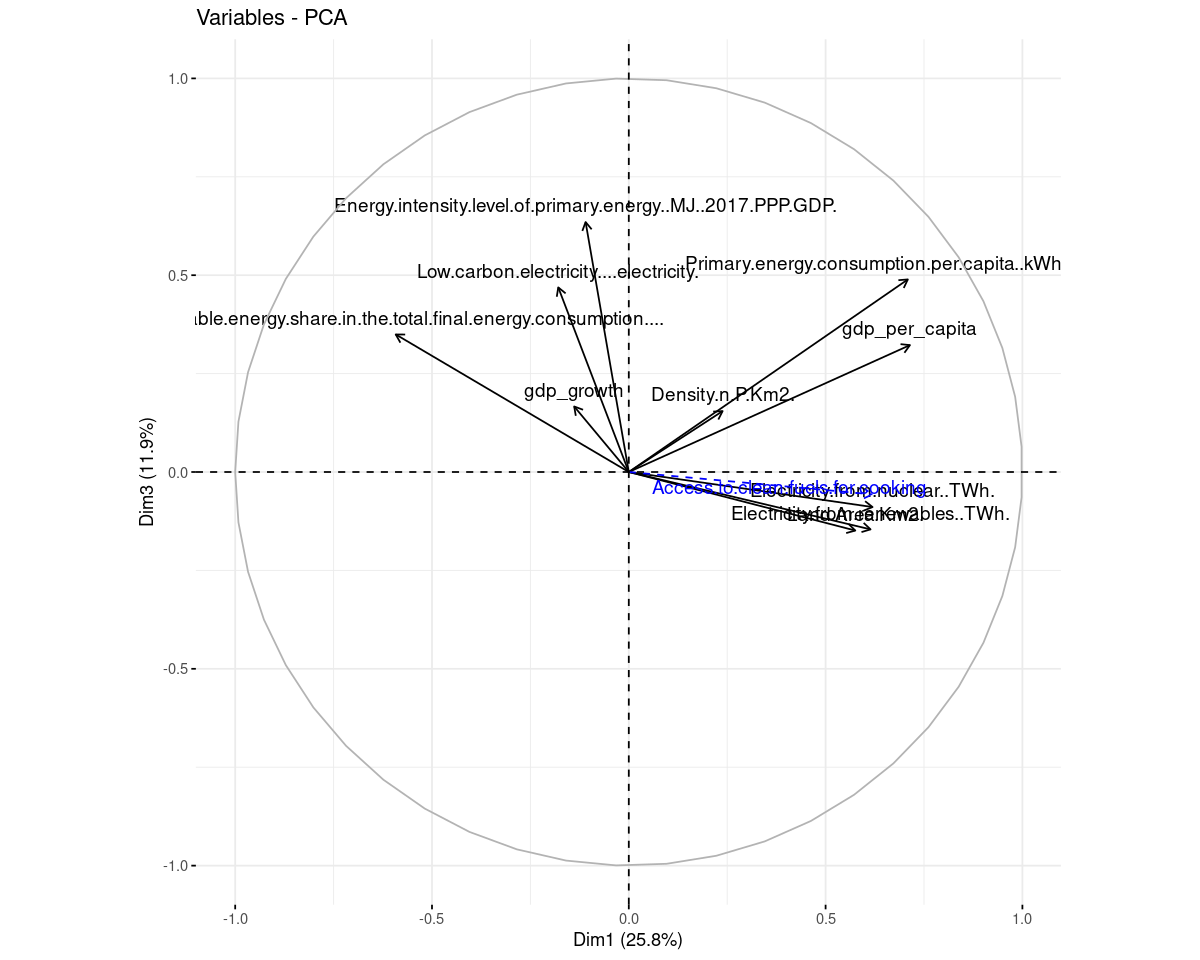

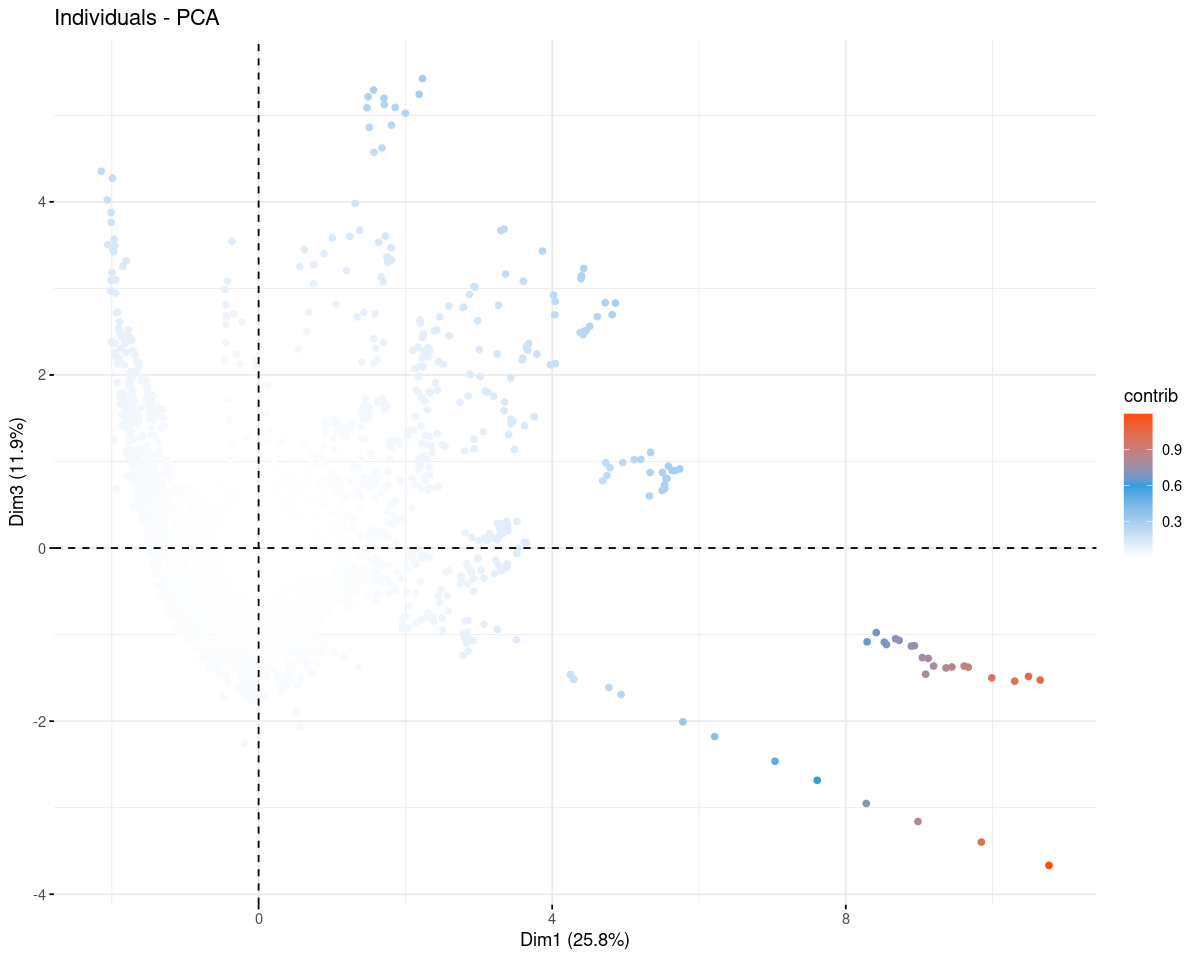

In [31]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

## Modélisation

### Extraction des échantillons

Dans la suite, on va modéliser nos données sans la variable $Entity$.

In [32]:
library(caret,quietly = TRUE)

new_data$Year = as.factor(new_data$Year)
#Supprimer fossils fuels de la partie modélisattion
new_data2 = new_data[,-6]

numeric_cols <- names(new_data2)[sapply(new_data2, is.numeric)]

data_var_num <- new_data2[numeric_cols]

# Diviser les données en variables explicatives (X) et variable cible (y)
#Supprimer 'Value_co2_emissions_kt_by_country' de X
X <- data_var_num[setdiff(names(data_var_num), 'Value_co2_emissions_kt_by_country')]
y <- new_data2$Value_co2_emissions_kt_by_country

# Diviser les données en un échantillon d'apprentissage et un échantillon test (80% pour l'apprentissage, 20% pour le test)
set.seed(42) # Pour la reproductibilité
trainIndex <- createDataPartition(y, p = .8, list = FALSE)
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]

# Afficher les dimensions des échantillons
cat("Dimensions de l'échantillon d'apprentissage :", dim(X_train), "\n")
cat("Dimensions de l'échantillon test :", dim(X_test), "\n")



Attachement du package : ‘lattice’


L'objet suivant est masqué depuis ‘package:boot’:

    melanoma



Attachement du package : ‘caret’


L'objet suivant est masqué depuis ‘package:purrr’:

    lift




Dimensions de l'échantillon d'apprentissage : 2296 14 
Dimensions de l'échantillon test : 572 14 


In [33]:
head(X_train)

,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
5,20.06497,10.9,44.24,0,0.56,62.92135,204.2312,1.20,1.414118,211.3821,60,652230,33.93911,67.70995
6,25.39089,12.2,33.88,0,0.59,63.44086,252.0691,1.41,11.229715,242.0313,60,652230,33.93911,67.70995
9,42.40000,16.7,21.17,0,0.54,73.97260,607.8335,1.94,3.924984,364.6635,60,652230,33.93911,67.70995
10,46.74005,18.4,16.53,0,0.78,82.97872,975.0482,2.25,21.390528,437.2687,60,652230,33.93911,67.70995
11,42.70000,20.0,15.15,0,0.75,79.78723,1182.8920,2.46,14.362441,543.3065,60,652230,33.93911,67.70995
14,68.29065,24.8,16.86,0,0.89,80.18018,1060.7926,2.46,5.600745,624.3155,60,652230,33.93911,67.70995


#### Normalisation des données pour la modélisation

In [34]:

# Calculer la moyenne et l'écart-type de X_train
mean_X_train <- apply(X_train, 2, mean)
sd_X_train <- apply(X_train, 2, sd)

# Normaliser X_train
X_train_normalized <- sweep(X_train, 2, mean_X_train, FUN = "-")
X_train_normalized <- sweep(X_train_normalized, 2, sd_X_train, FUN = "/")

# Utiliser la même moyenne et l'écart-type pour normaliser X_test
X_test_normalized <- sweep(X_test, 2, mean_X_train, FUN = "-")
X_test_normalized <- sweep(X_test_normalized, 2, sd_X_train, FUN = "/")

# Normaliser y_train et y_test
mean_y_train <- mean(y_train)
sd_y_train <- sd(y_train)

y_train_normalized <- (y_train - mean_y_train) / sd_y_train
y_test_normalized <- (y_test - mean_y_train) / sd_y_train


# Afficher les résultats normalisés
X_train = X_train_normalized
X_test = X_test_normalized
y_train=y_train_normalized
y_test=y_test_normalized


### Ajout de Year


Attachement du package : ‘Metrics’


Les objets suivants sont masqués depuis ‘package:caret’:

    precision, recall


L'objet suivant est masqué depuis ‘package:pROC’:

    auc



Attachement du package : ‘performance’


Les objets suivants sont masqués depuis ‘package:Metrics’:

    mae, mse, rmse


L'objet suivant est masqué depuis ‘package:ROCR’:

    performance




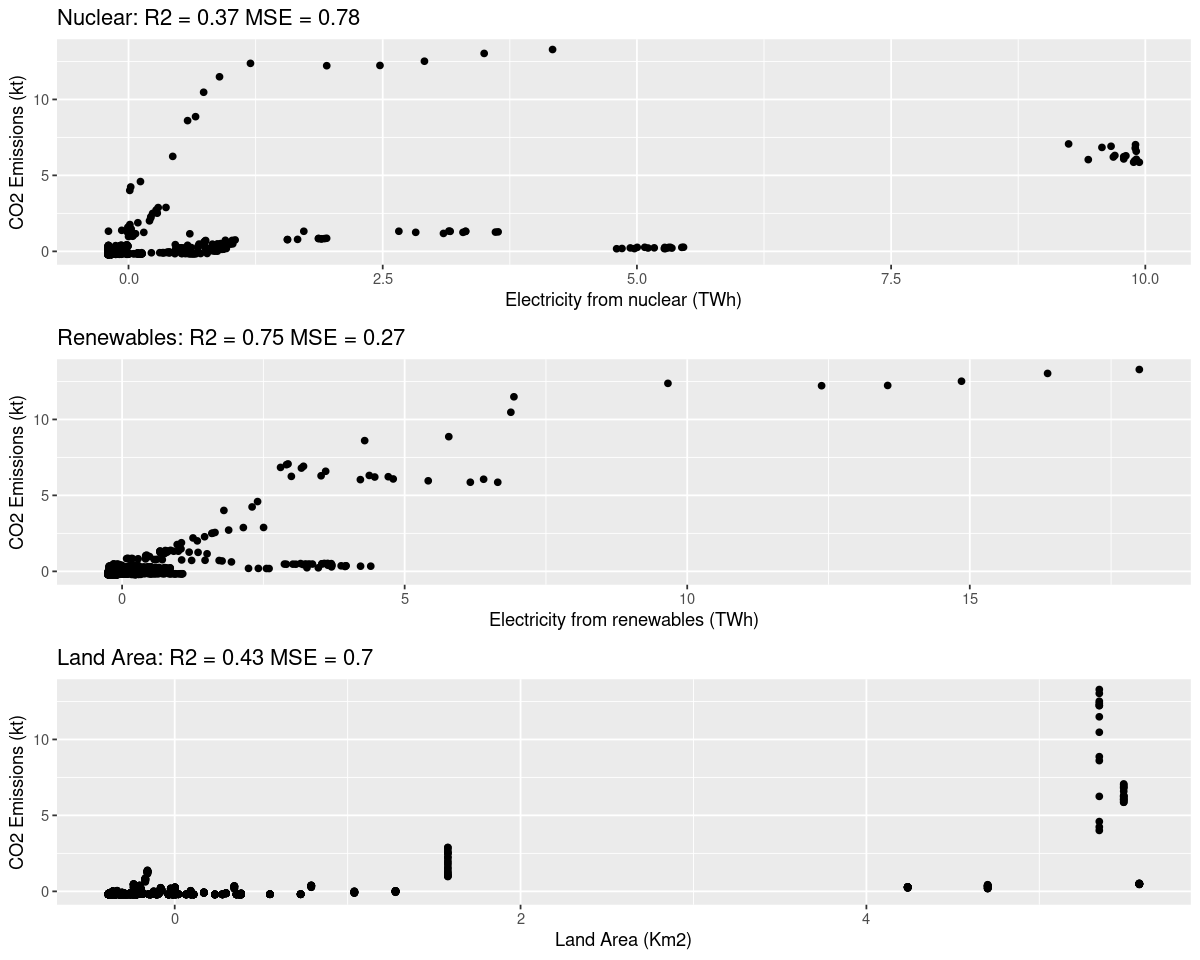

In [35]:
library(ggplot2)
library(gridExtra)
library(Metrics,quietly = TRUE) # Pour r2_score et mse
library(performance,quietly = TRUE)
# Ajouter y_train comme colonne dans X_train pour faciliter la création des graphiques

# Assigner la colonne Year à X_train et X_test
X_train$Year <- new_data2$Year[trainIndex]
X_test$Year <- new_data2$Year[-trainIndex]

X_train$Value_co2_emissions_kt_by_country <- y_train

# Calculer R2 et MSE pour chaque prédicteur
r2_nuclear <- R2(y_train, X_train$Electricity.from.nuclear..TWh.)
mse_nuclear <- mean((y_train - X_train$Electricity.from.nuclear..TWh. )^2)

r2_renewables <- R2(y_train, X_train$Electricity.from.renewables..TWh.)
mse_renewables <- mean((y_train - X_train$Electricity.from.renewables..TWh.)^2)

r2_land_area <- R2(y_train, X_train$Land.Area.Km2.)
mse_land_area <- mean((y_train - X_train$Land.Area.Km2. )^2)

# Création des graphiques
p1 <- ggplot(X_train, aes(x=Electricity.from.nuclear..TWh., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Nuclear: R2 =", round(r2_nuclear, 2), "MSE =", round(mse_nuclear, 2))) +
  xlab("Electricity from nuclear (TWh)") + ylab("CO2 Emissions (kt)")

p2 <- ggplot(X_train, aes(x=Electricity.from.renewables..TWh., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Renewables: R2 =", round(r2_renewables, 2), "MSE =", round(mse_renewables, 2))) +
  xlab("Electricity from renewables (TWh)") + ylab("CO2 Emissions (kt)")

p3 <- ggplot(X_train, aes(x=Land.Area.Km2., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Land Area: R2 =", round(r2_land_area, 2), "MSE =", round(mse_land_area, 2))) +
  xlab("Land Area (Km2)") + ylab("CO2 Emissions (kt)")

# Combinaison des graphiques dans une seule fenêtre
grid.arrange(p1, p2, p3, ncol=1)

**Énergie nucléaire** : affiche un faible R² de 0,37 et un MSE de 0,77, indiquant une relation prédictive faible et une erreur modérée entre la production d'énergie nucléaire et les émissions de CO2.<br>
**Énergie renouvelable** : démontre une relation plus forte avec un R² plus élevé de 0,75 et un MSE inférieur de 0,27, ce qui suggère que la production d'énergie renouvelable est un meilleur prédicteur des émissions de CO2.<br>
**Superficie terrestre** : présente un R² modeste de 0,43 et un MSE de 0,66, indiquant une corrélation modérée avec les émissions de CO2.

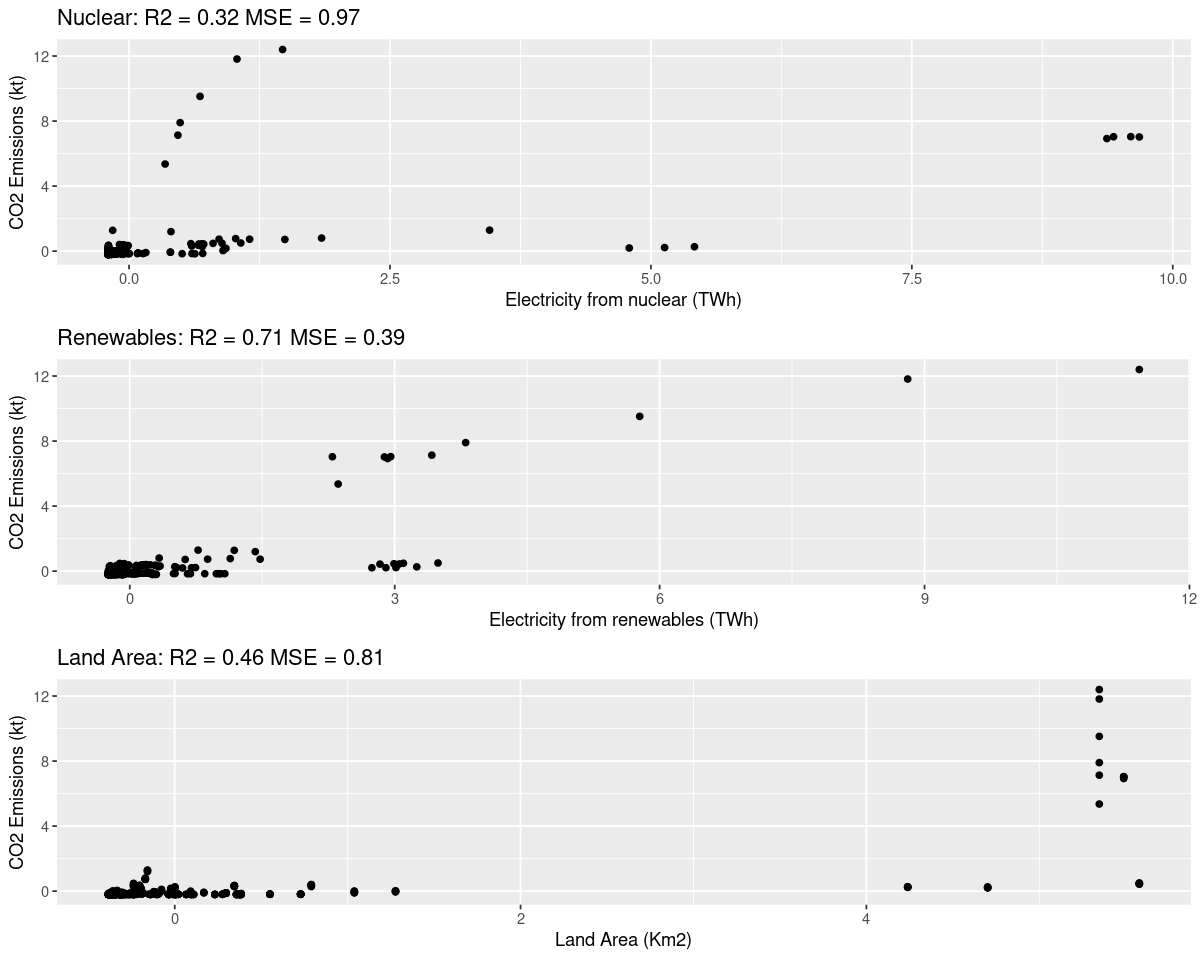

In [36]:
test = X_test
test$Value_co2_emissions_kt_by_country <- y_test

# Calculer R2 et MSE pour chaque prédicteur
r2_nuclear <- R2(y_test, test$Electricity.from.nuclear..TWh.)
mse_nuclear <- mean((y_test - test$Electricity.from.nuclear..TWh. )^2)

r2_renewables <- R2(y_test, test$Electricity.from.renewables..TWh.)
mse_renewables <- mean((y_test - test$Electricity.from.renewables..TWh. )^2)

r2_land_area <- R2(y_test, test$Land.Area.Km2.)
mse_land_area <- mean((y_test - test$Land.Area.Km2. )^2)

# Création des graphiques
p1 <- ggplot(test, aes(x=Electricity.from.nuclear..TWh., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Nuclear: R2 =", round(r2_nuclear, 2), "MSE =", round(mse_nuclear, 2))) +
  xlab("Electricity from nuclear (TWh)") + ylab("CO2 Emissions (kt)")

p2 <- ggplot(test, aes(x=Electricity.from.renewables..TWh., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Renewables: R2 =", round(r2_renewables, 2), "MSE =", round(mse_renewables, 2))) +
  xlab("Electricity from renewables (TWh)") + ylab("CO2 Emissions (kt)")

p3 <- ggplot(test, aes(x=Land.Area.Km2., y=Value_co2_emissions_kt_by_country)) +
  geom_point() +
  ggtitle(paste("Land Area: R2 =", round(r2_land_area, 2), "MSE =", round(mse_land_area, 2))) +
  xlab("Land Area (Km2)") + ylab("CO2 Emissions (kt)")

# Combinaison des graphiques dans une seule fenêtre
grid.arrange(p1, p2, p3, ncol=1)

In [37]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 15)+ylim(-5, 5)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Modèle Linéaire:

### Sans sélection de variables:

In [38]:
modele_lin <-lm(Value_co2_emissions_kt_by_country ~ ., data = X_train)

In [39]:
summary(modele_lin)


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ ., data = X_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5824 -0.1066  0.0173  0.1256  5.6098 

Coefficients:
                                                                  Estimate
(Intercept)                                                       0.049190
Access.to.electricity....of.population.                           0.075548
Access.to.clean.fuels.for.cooking                                -0.105011
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.049255
Electricity.from.nuclear..TWh.                                    0.265186
Electricity.from.renewables..TWh.                                 0.774439
Low.carbon.electricity....electricity.                           -0.119690
Primary.energy.consumption.per.capita..kWh.person.               -0.056813
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.051910
gdp_growth                                                        

L'erreur standard résiduelle de 0.1165 indique la dispersion des résidus du modèle autour des valeurs prédites sur 2261 degrés de liberté. Le R² multiple de 0.8278 et le R² ajusté de 0.8253 révèlent que le modèle explique environ 82.53% de la variance de la variable dépendante, signifiant une forte adéquation du modèle. La statistique F de 329.5 avec une p-value inférieure à 2.2e-16 confirme la significativité globale du modèle, suggérant que les variables explicatives ont un effet significatif sur la variable **Value_CO2**.

In [40]:
predictions <- predict(modele_lin, newdata = X_test)

Warning message:
“Removed 1794 rows containing missing values (`geom_point()`).”


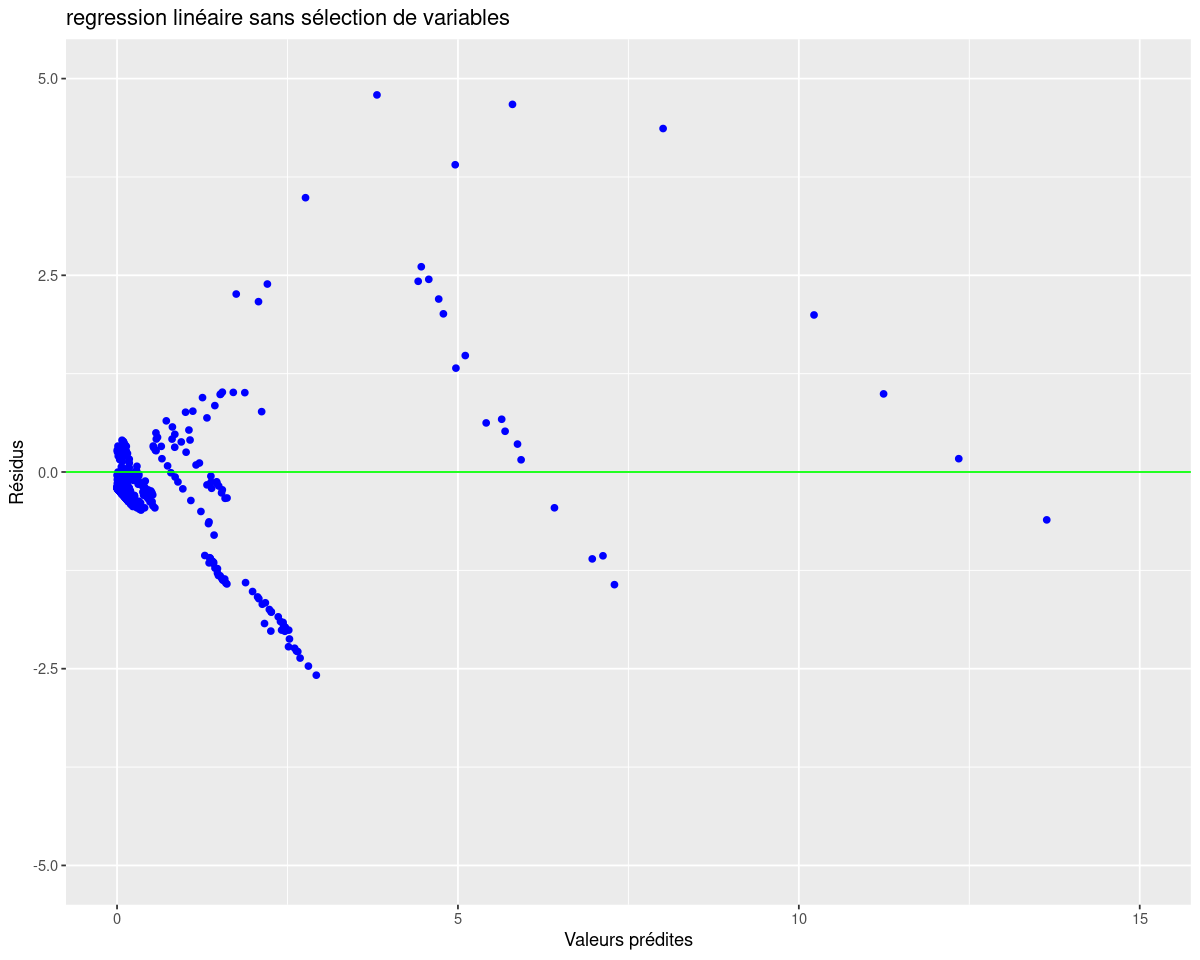

In [41]:
res.lm <- modele_lin$residuals
fit.lm <- modele_lin$fitted.value

# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"regression linéaire sans sélection de variables")

Le graphique des résidus de la régression linéaire montre une dispersion non uniforme des résidus par rapport aux valeurs prédites, avec une tendance distincte et non aléatoire pour les valeurs prédites inférieures à 5. Cela suggère une non-linéarité dans les données ou l'existence de variables influentes non incluses dans le dataset. De plus, des valeurs prédites supérieures avec peu de résidus indiquent une variabilité non captée par le modèle.

In [42]:
mse <- mean((y_test - predictions)^2)
mse

[1] 0.3024187

La valeur de notre mse est faible. Le modèle explique bien les une bonne partie des données.

### Sélection de variables par régularisation L1 (LASSO)

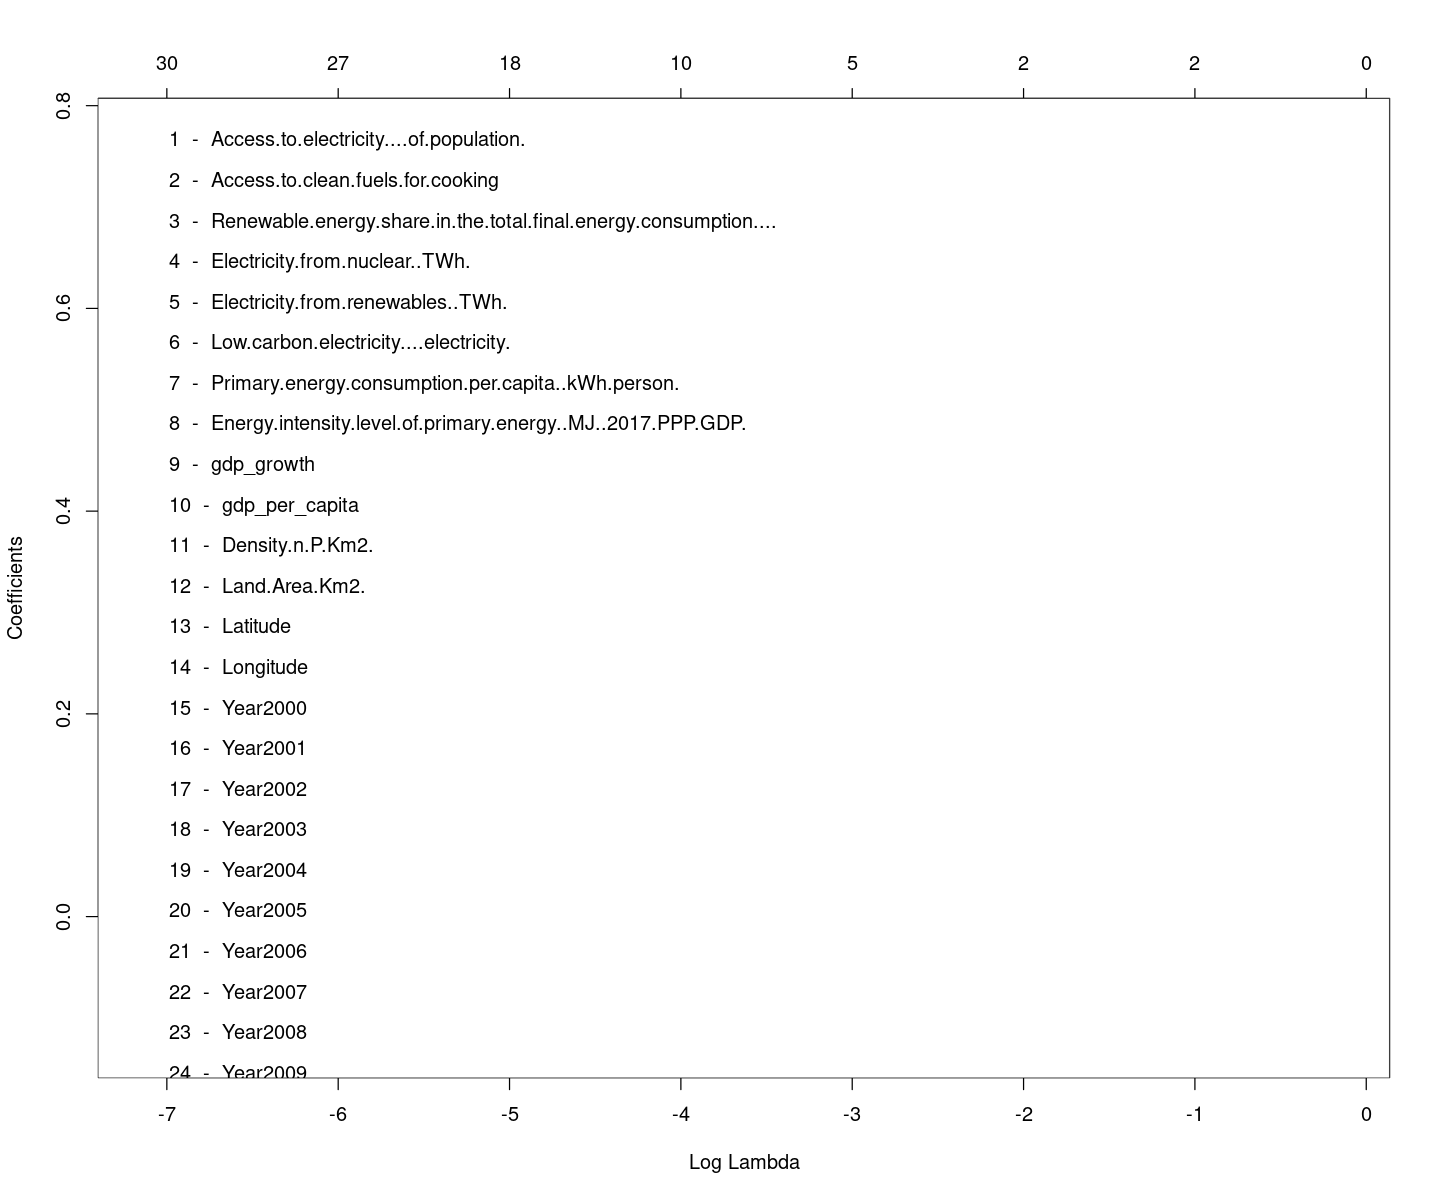

In [43]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = y_train,
                           x = as.matrix(X_train[, -c(15)]))
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(~ . - Value_co2_emissions_kt_by_country - 1, data = X_train)
reg.lasso <- glmnet(y =y_train, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

In [44]:
head(x.mat)

,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,gdp_growth,gdp_per_capita,⋯,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2017,Year2018,Year2019
5,-1.7840942,-1.3021281,0.2781245,-0.1973259,-0.2362208,0.6845143,-0.7019570,-1.2028262,-0.51450835,-0.6640752,⋯,0,0,0,0,0,0,0,0,0,0
6,-1.6155027,-1.2690337,-0.0668013,-0.1973259,-0.2359491,0.6996200,-0.7006446,-1.1423380,1.55341620,-0.6624384,⋯,0,0,0,0,0,0,0,0,0,0
9,-1.0770814,-1.1544761,-0.4899680,-0.1973259,-0.2364019,1.0058515,-0.6908841,-0.9896774,0.01447437,-0.6558895,⋯,0,0,0,0,0,0,0,0,0,0
10,-0.9396976,-1.1111988,-0.6444521,-0.1973259,-0.2342287,1.2677225,-0.6808094,-0.9003853,3.69407011,-0.6520122,⋯,0,0,0,0,0,0,0,0,0,0
11,-1.0675849,-1.0704673,-0.6903978,-0.1973259,-0.2345004,1.1749235,-0.6751072,-0.8398972,2.21341094,-0.6463495,⋯,1,0,0,0,0,0,0,0,0,0
14,-0.2575159,-0.9482725,-0.6334651,-0.1973259,-0.2332327,1.1863492,-0.6784570,-0.8398972,0.36751933,-0.6420234,⋯,0,0,0,1,0,0,0,0,0,0


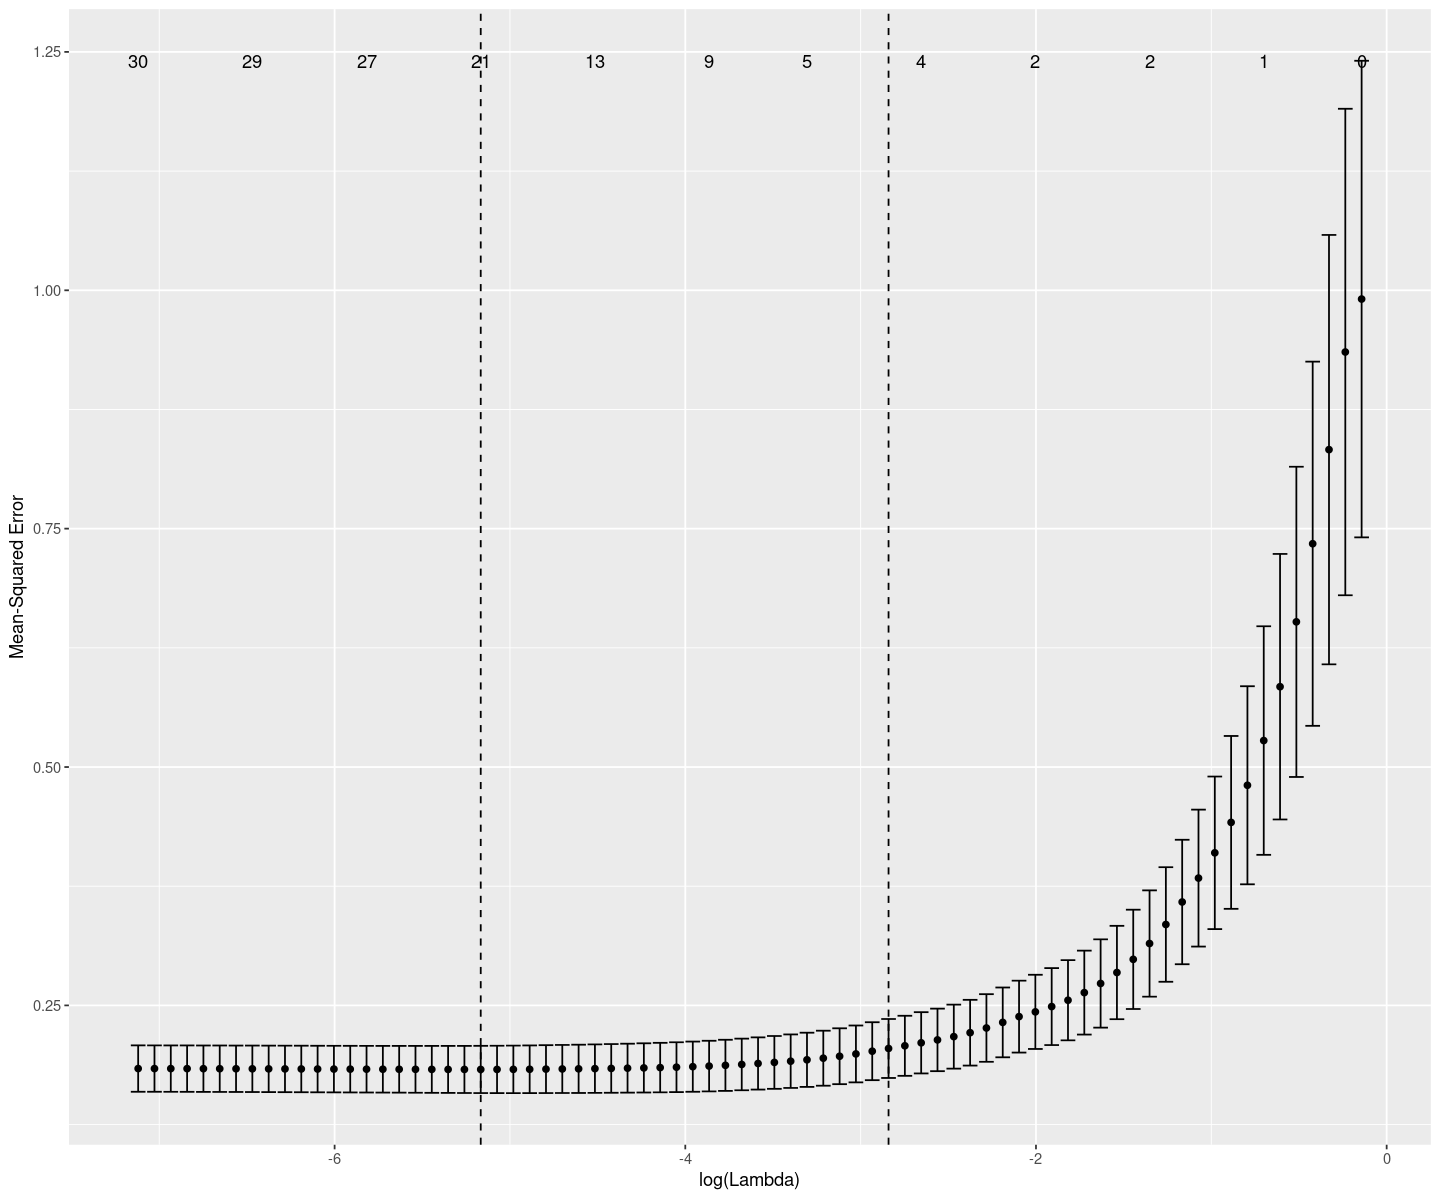

In [45]:
reg.lasso.cv <- cv.glmnet(y = y_train, x = x.mat)

autoplot(reg.lasso.cv)

In [46]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.058"

35 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                       1.259308e-16
Access.to.electricity....of.population.                           .           
Access.to.clean.fuels.for.cooking                                 .           
Renewable.energy.share.in.the.total.final.energy.consumption....  .           
Electricity.from.nuclear..TWh.                                    1.982026e-01
Electricity.from.renewables..TWh.                                 7.155143e-01
Low.carbon.electricity....electricity.                           -6.900932e-02
Primary.energy.consumption.per.capita..kWh.person.                .           
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       .           
gdp_growth                                                        .           
gdp_per_capita                                                    .           
Density.n.

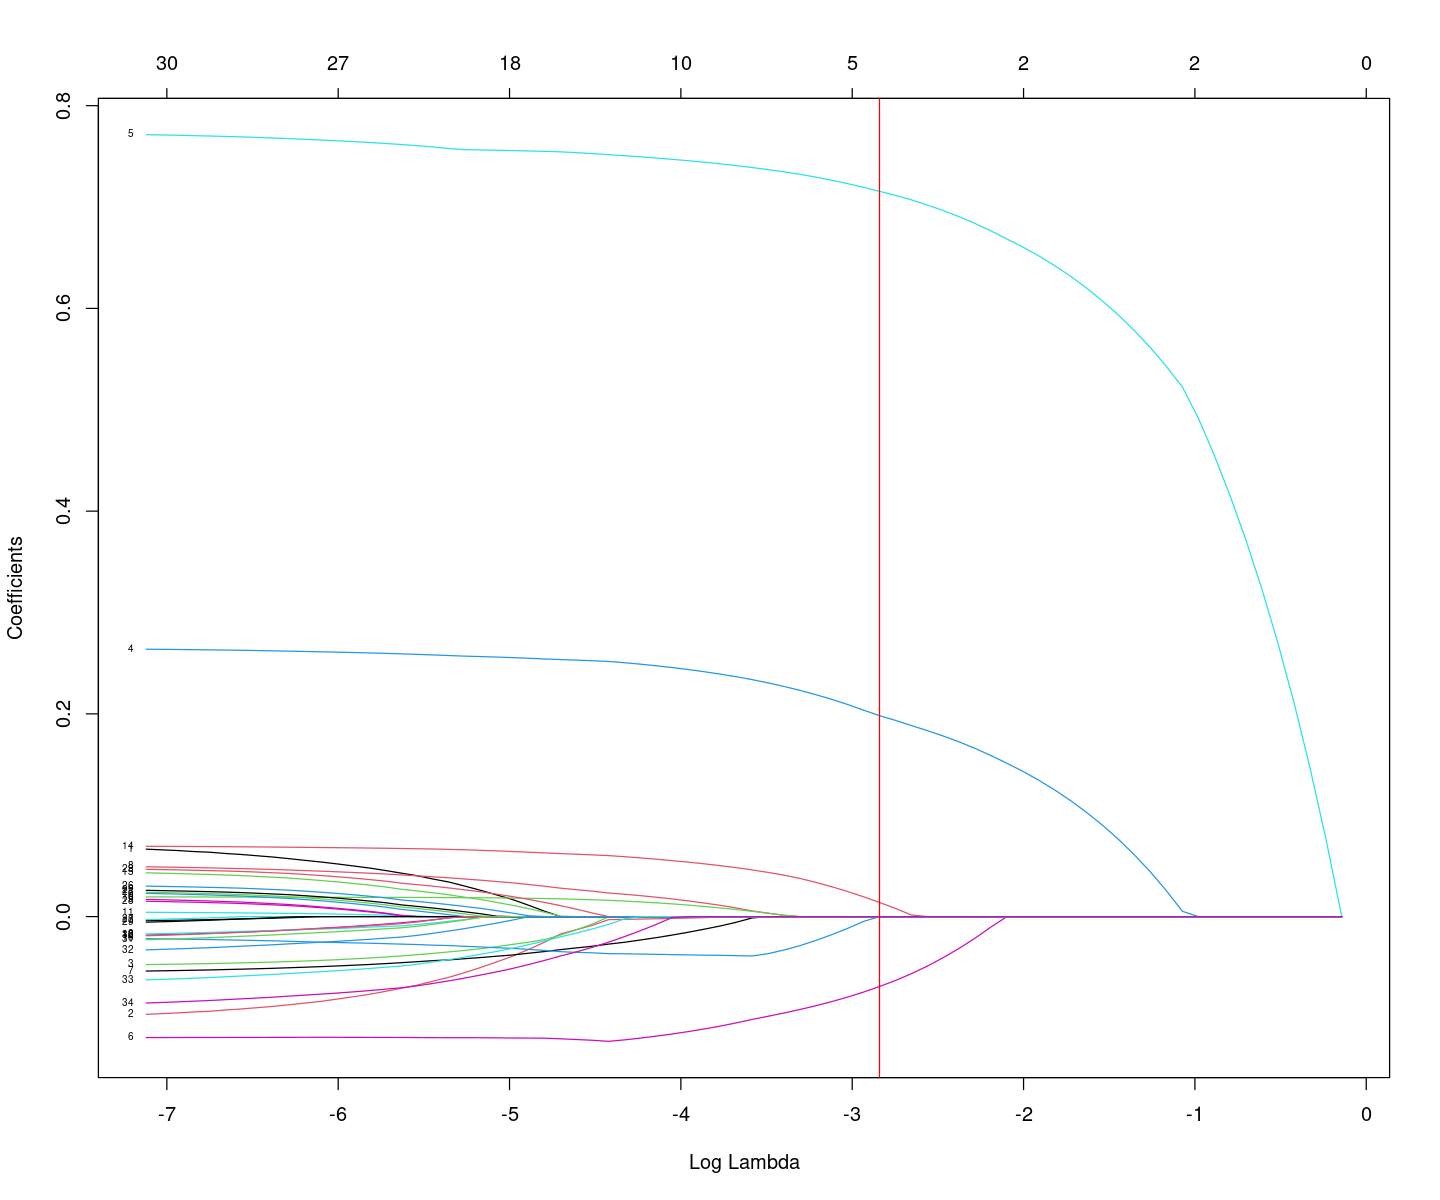

In [47]:
plot(reg.lasso, xvar = "lambda", label = TRUE)
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

Dans le cas où on estime notre lambda par la méthode des moindres carrés, on remarque qu'avec le critère de pénalité de Lasso , on ne conserve que 3 variables dans notre modèle.

[1] "CV estimate of lambda : 0.006"

35 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                       0.0027555970
Access.to.electricity....of.population.                           0.0258160124
Access.to.clean.fuels.for.cooking                                -0.0501016605
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.0316106584
Electricity.from.nuclear..TWh.                                    0.2565036397
Electricity.from.renewables..TWh.                                 0.7563144717
Low.carbon.electricity....electricity.                           -0.1195245855
Primary.energy.consumption.per.capita..kWh.person.               -0.0403648783
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.0358900381
gdp_growth                                                        0.0185601896
gdp_per_capita                                                   -0.0299633063
Density.n.

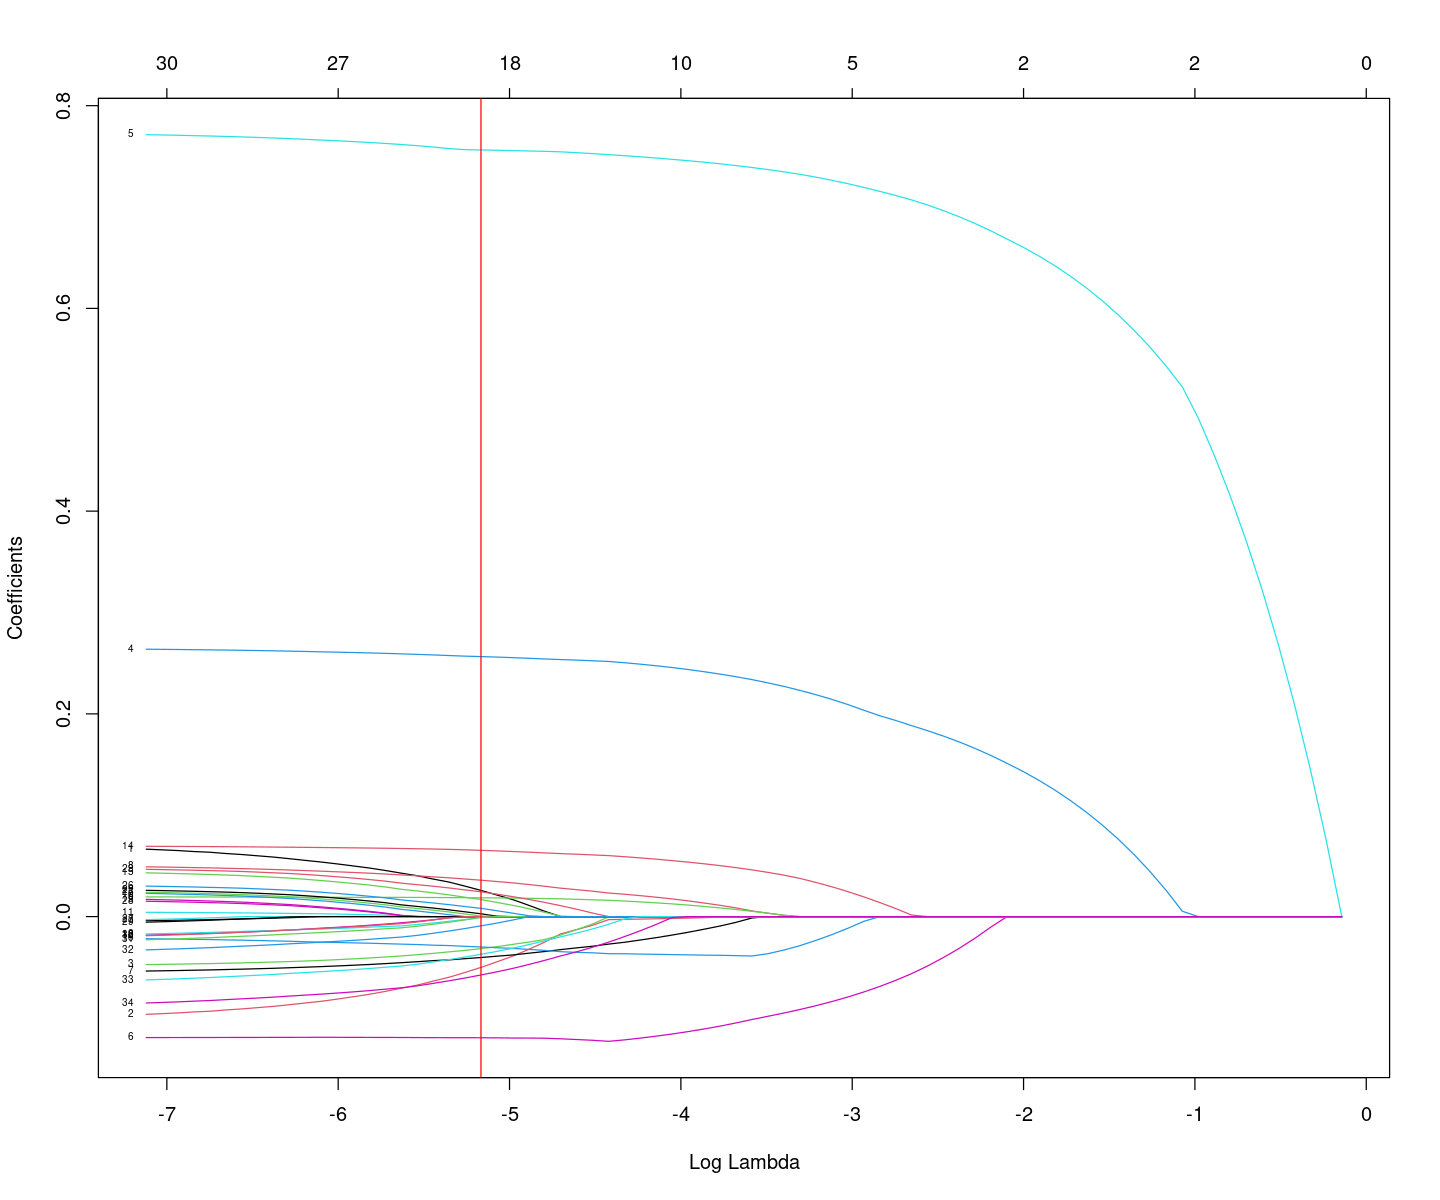

In [48]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

plot(reg.lasso, xvar = "lambda", label = TRUE)
abline(v=log(reg.lasso.cv$lambda.min),col="red")

Dans le cas où on prend un lambda minimal, on remarque qu'avec le critère de pénalité de Lasso , on conserve toutes les variables sauf la variable 'Latitude'.

In [49]:
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso.min <- X_train$Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- X_train$Value_co2_emissions_kt_by_country - fit.lasso.1se 


paste("Modèle linéaire sans sélection:",mean(res.lm^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))
paste("LASSO avec lambda minimal:",mean(res.lasso.min^2))

[1] "Modèle linéaire sans sélection: 0.1721236849105"

[1] "LASSO avec lambda.1se: 0.196254168784576"

[1] "LASSO avec lambda minimal: 0.173695296872221"

On remarque que le modèle linéaire sans sélection admet une mse égale à celle obtenue avec un modèle linéaire avec pénalité de Lasso dans le cas où le lambda est minimale. Cela est normal vu qu'avec le lambd amin , on n'a supprimé qu'une seule variable de notre modèle.
Par contre , pour le modèle avec pénalité de Lasso où le lambda lse donne un mse plus élevé car notre modèle est beaucoup plus simple.

### SVM

In [50]:
library(e1071)
svm.reg0 = svm(Value_co2_emissions_kt_by_country ~ ., data = X_train) # radial = gaussian
summary(svm.reg0)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = X_train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02941176 
    epsilon:  0.1 


Number of Support Vectors:  332






In [51]:
pred.svmr=predict(svm.reg0,newdata=X_test)
# Erreur quadratique moyenne de prévision
mse_svm<-sum((pred.svmr-y_test)^2)/nrow(X_test)
print(mse_svm)

[1] 0.1648234


Le modéle SVM en R donne des valeurs par défaut pour ses paramétres un noyau radial et  le coût (cost = 1), le gamma (gamma = 0.07142857), et l'epsilon (epsilon = 0.1). Le modèle utilise 235 vecteurs de support, ce qui indique le nombre de points de données qui contribuent à la construction du modèle.

#### Optimiser les hyperparametres de SVM

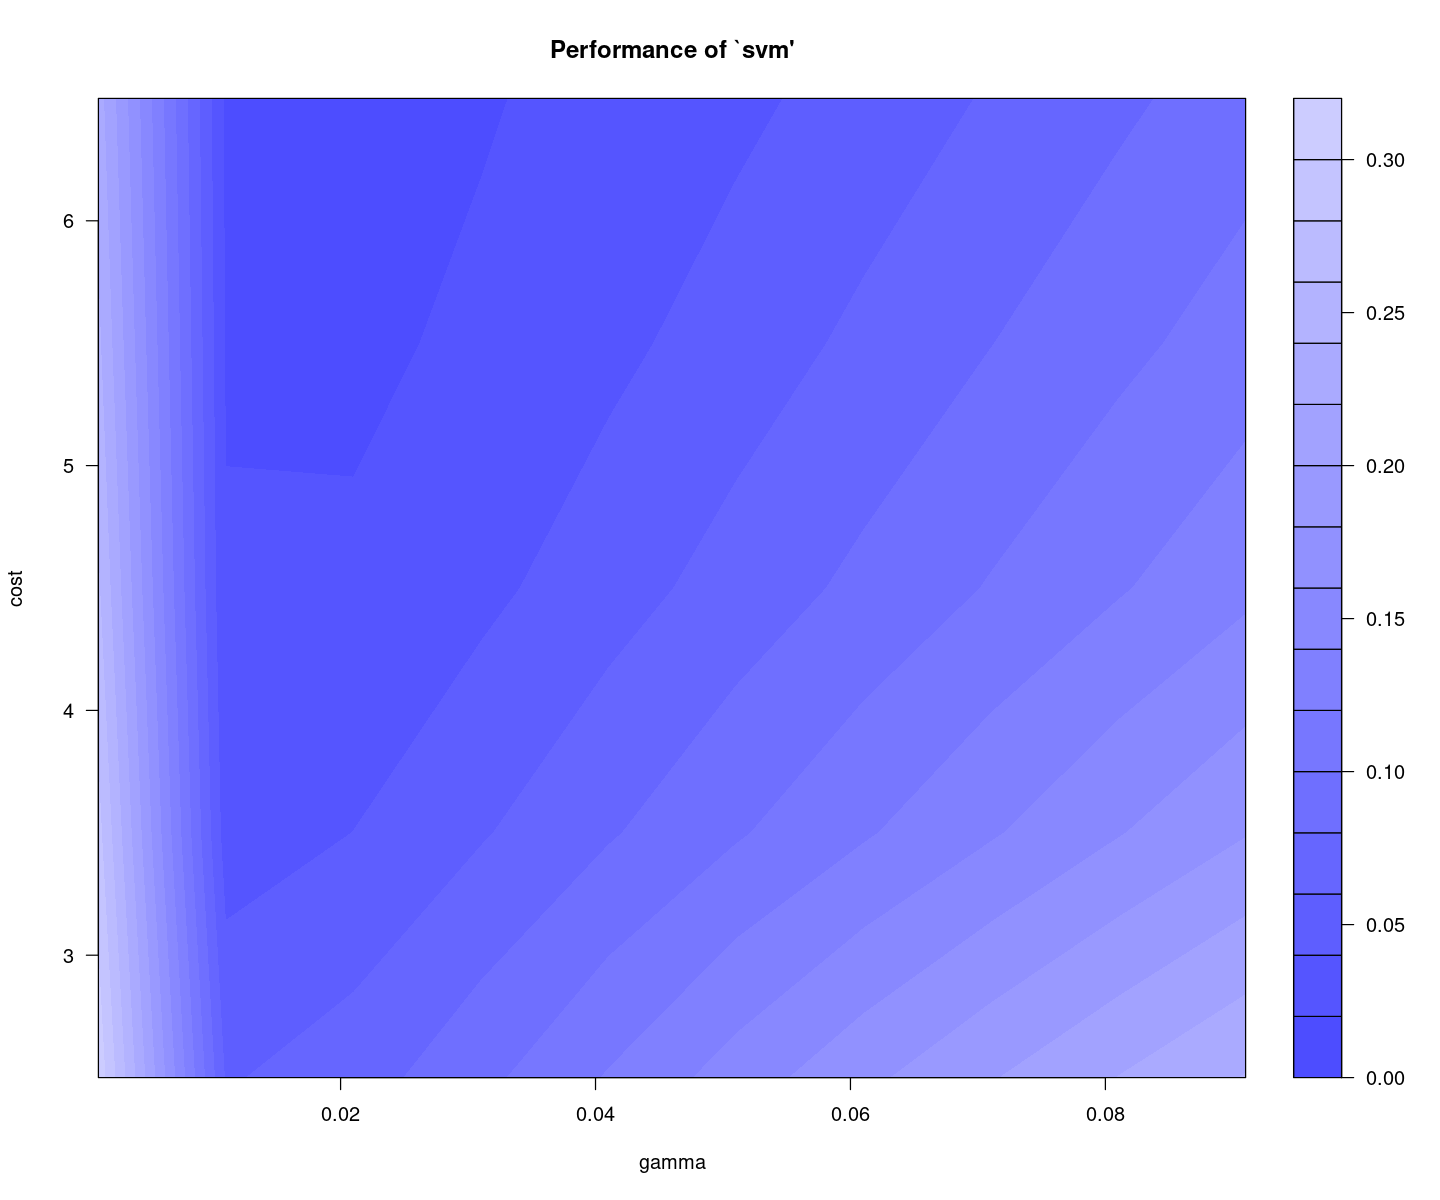

In [52]:
svm.reg.tune = tune.svm(Value_co2_emissions_kt_by_country ~ ., data = X_train, cost = c(2.5,3.5,4.5,5.5,6.5), 
    gamma = seq(0.001, 0.1, by = 0.01))
plot(svm.reg.tune)

A partir de ce graphe on regarde les performances du SVM en fonction des hyperparamètres gamma et cost. <br>
On peut constater que la meilleure performance est obtenue pour une valeur de gamma autour de 0.02 et une valeur de cost entre 4.5 et 6.5 .

In [53]:
svm.reg = svm(Value_co2_emissions_kt_by_country ~ ., data = X_train, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)
summary(svm.reg)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = X_train, 
    cost = svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  6.5 
      gamma:  0.021 
    epsilon:  0.1 


Number of Support Vectors:  302






Les hyperparamètres cost=6.5 et gamma=0.021 sont les hyperparamètres optimaux du SVM noyau radial.

In [54]:
pred.svmr=predict(svm.reg,newdata=X_test)
# Erreur quadratique moyenne de prévision
mse_svm_opt<-sum((pred.svmr-y_test)^2)/nrow(X_test)
print(mse_svm_opt)

[1] 0.007997559


Warning message:
“Removed 490 rows containing missing values (`geom_point()`).”


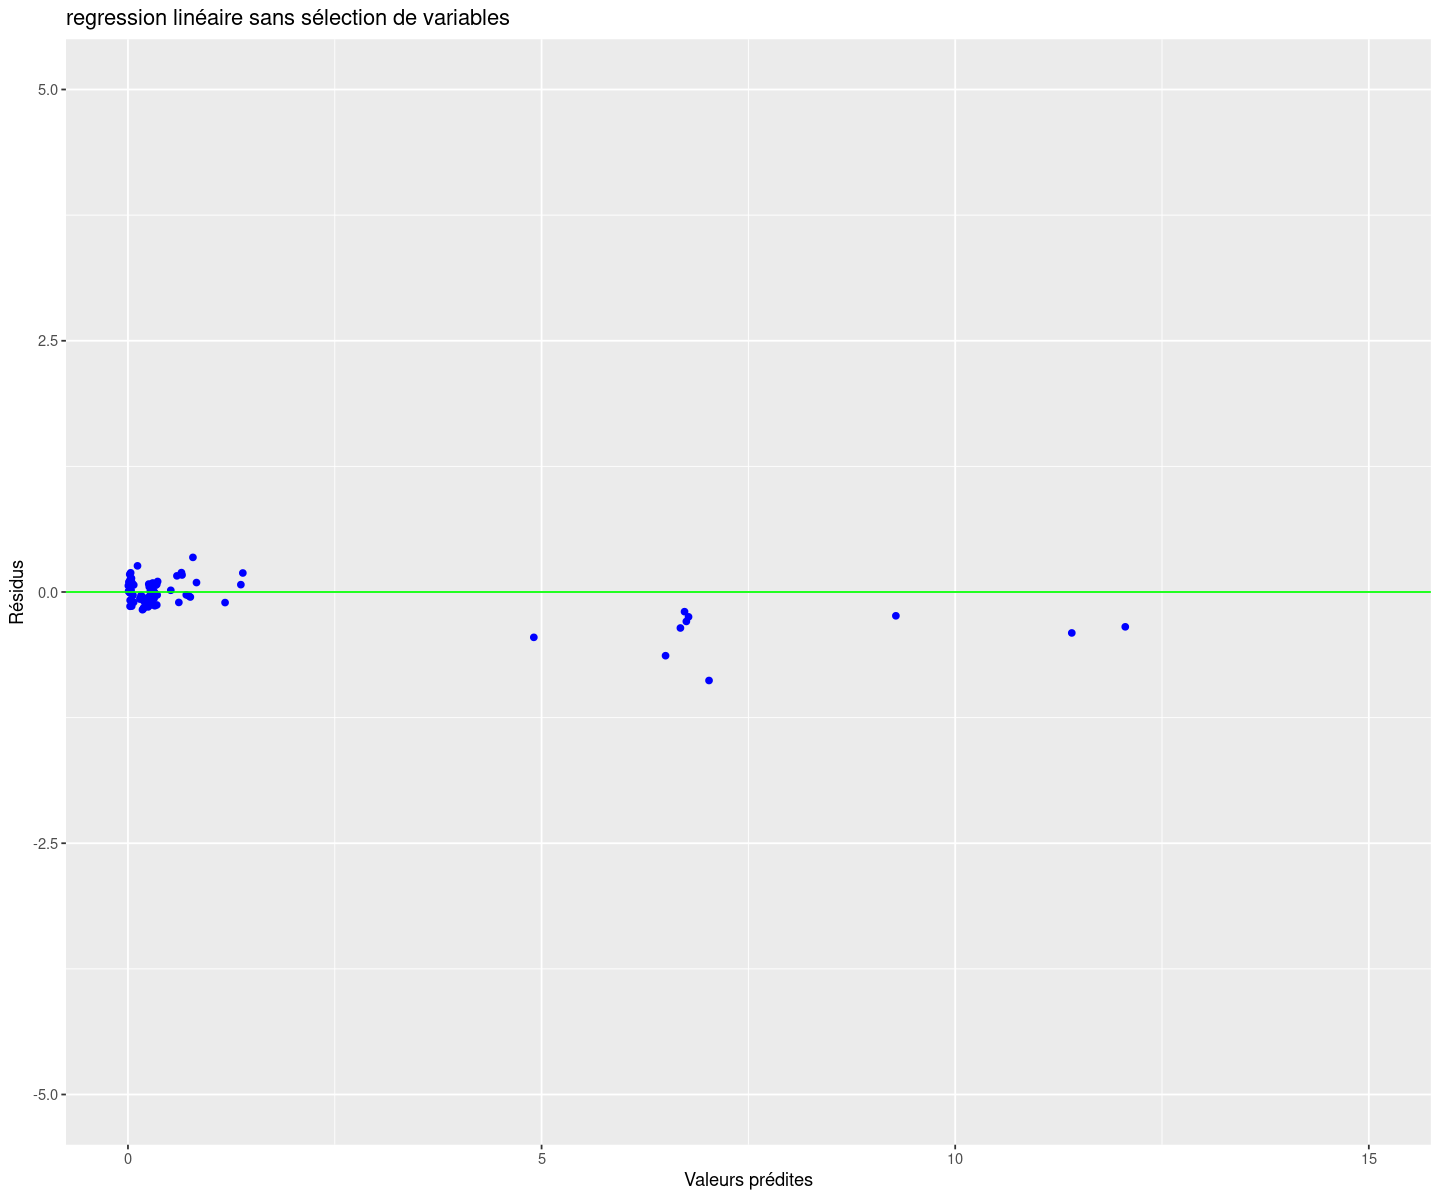

In [55]:
res.svm <- pred.svmr-y_test
pred.svm <- pred.svmr

# Graphe des résidus. 
gplot.res(pred.svm,res.svm,"regression linéaire sans sélection de variables")

Ce modéle donne un mse très faible ce qui est très bien.

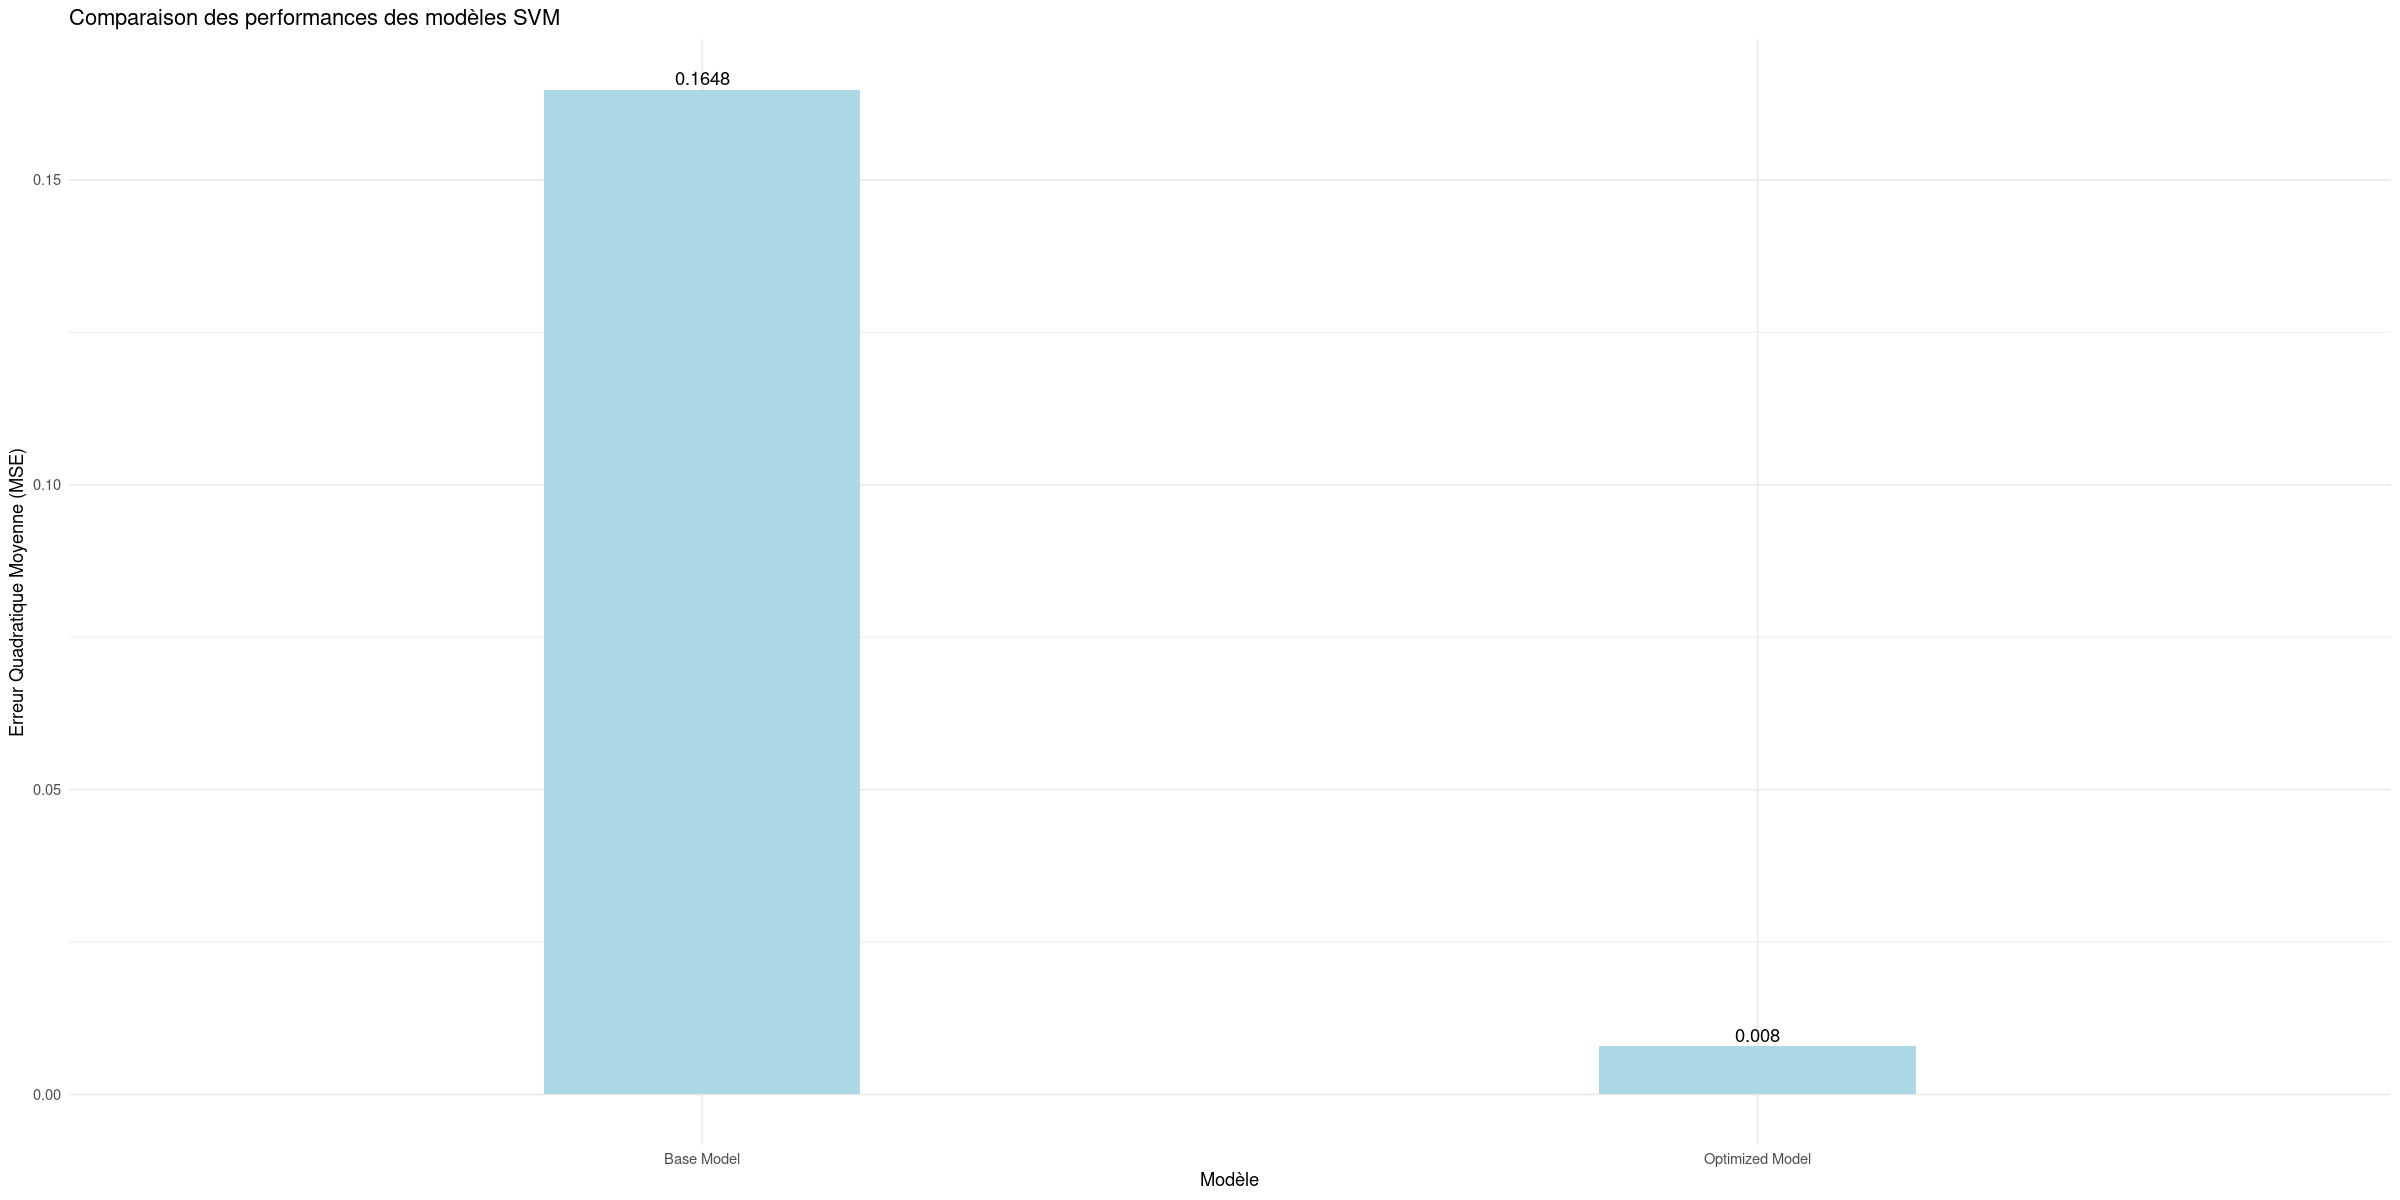

In [73]:
# Création d'un dataframe pour les résultats
results <- data.frame(
  Model = c("Base Model", "Optimized Model"),
  MSE = c(mse_svm, mse_svm_opt)
)

# Afficher les résultats sous forme de graphique
ggplot(results, aes(x = Model, y = MSE)) +
  geom_bar(stat = "identity", fill = "lightblue",width=0.3) +
  geom_text(aes(label = round(MSE, 4)), vjust = -0.3) +
  labs(title = "Comparaison des performances des modèles SVM", y = "Erreur Quadratique Moyenne (MSE)", x = "Modèle") +
  theme_minimal()


### CART

In [57]:
library(rpart) 

In [58]:
tree.reg1=rpart(Value_co2_emissions_kt_by_country~.,data=X_train,control=rpart.control(cp=0.001))

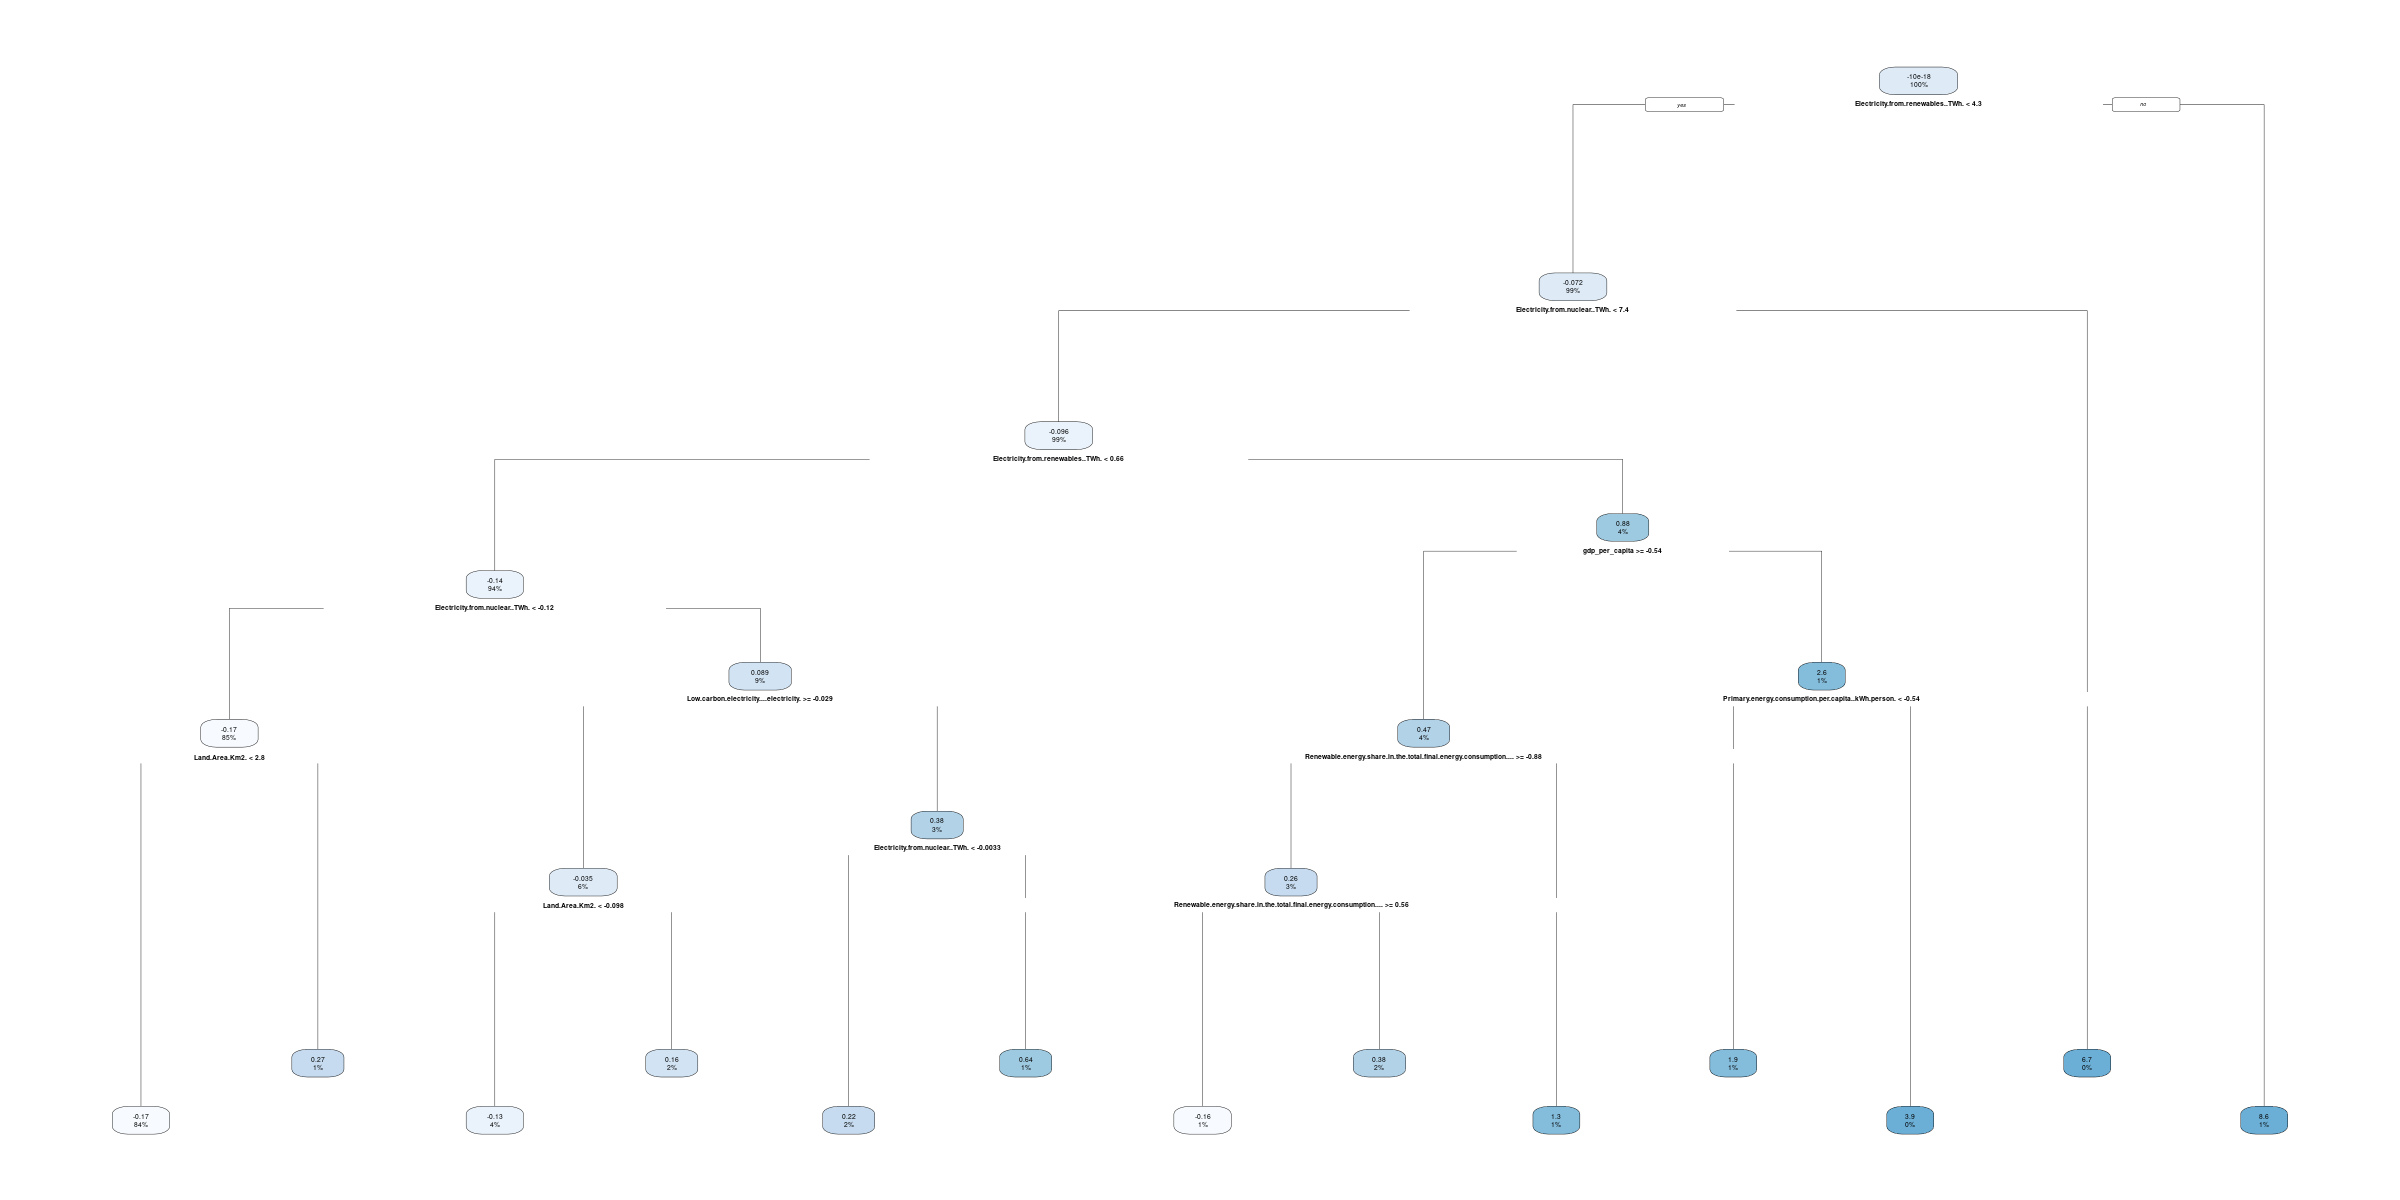

In [59]:
library(rpart.plot)
options(repr.plot.width = 20, repr.plot.height = 10)
rpart.plot(tree.reg1)

In [60]:
# Predict on the test set
predictions <- predict(tree.reg1, newdata = X_test)

# Calculate MSE for the new tree on the test data
mse <- mean((predictions - y_test)^2)
cat("Test MSE:", mse, "\n")

Test MSE: 0.1023578 


L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par validation croisée 10-fold pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. 

#### Validation croisée

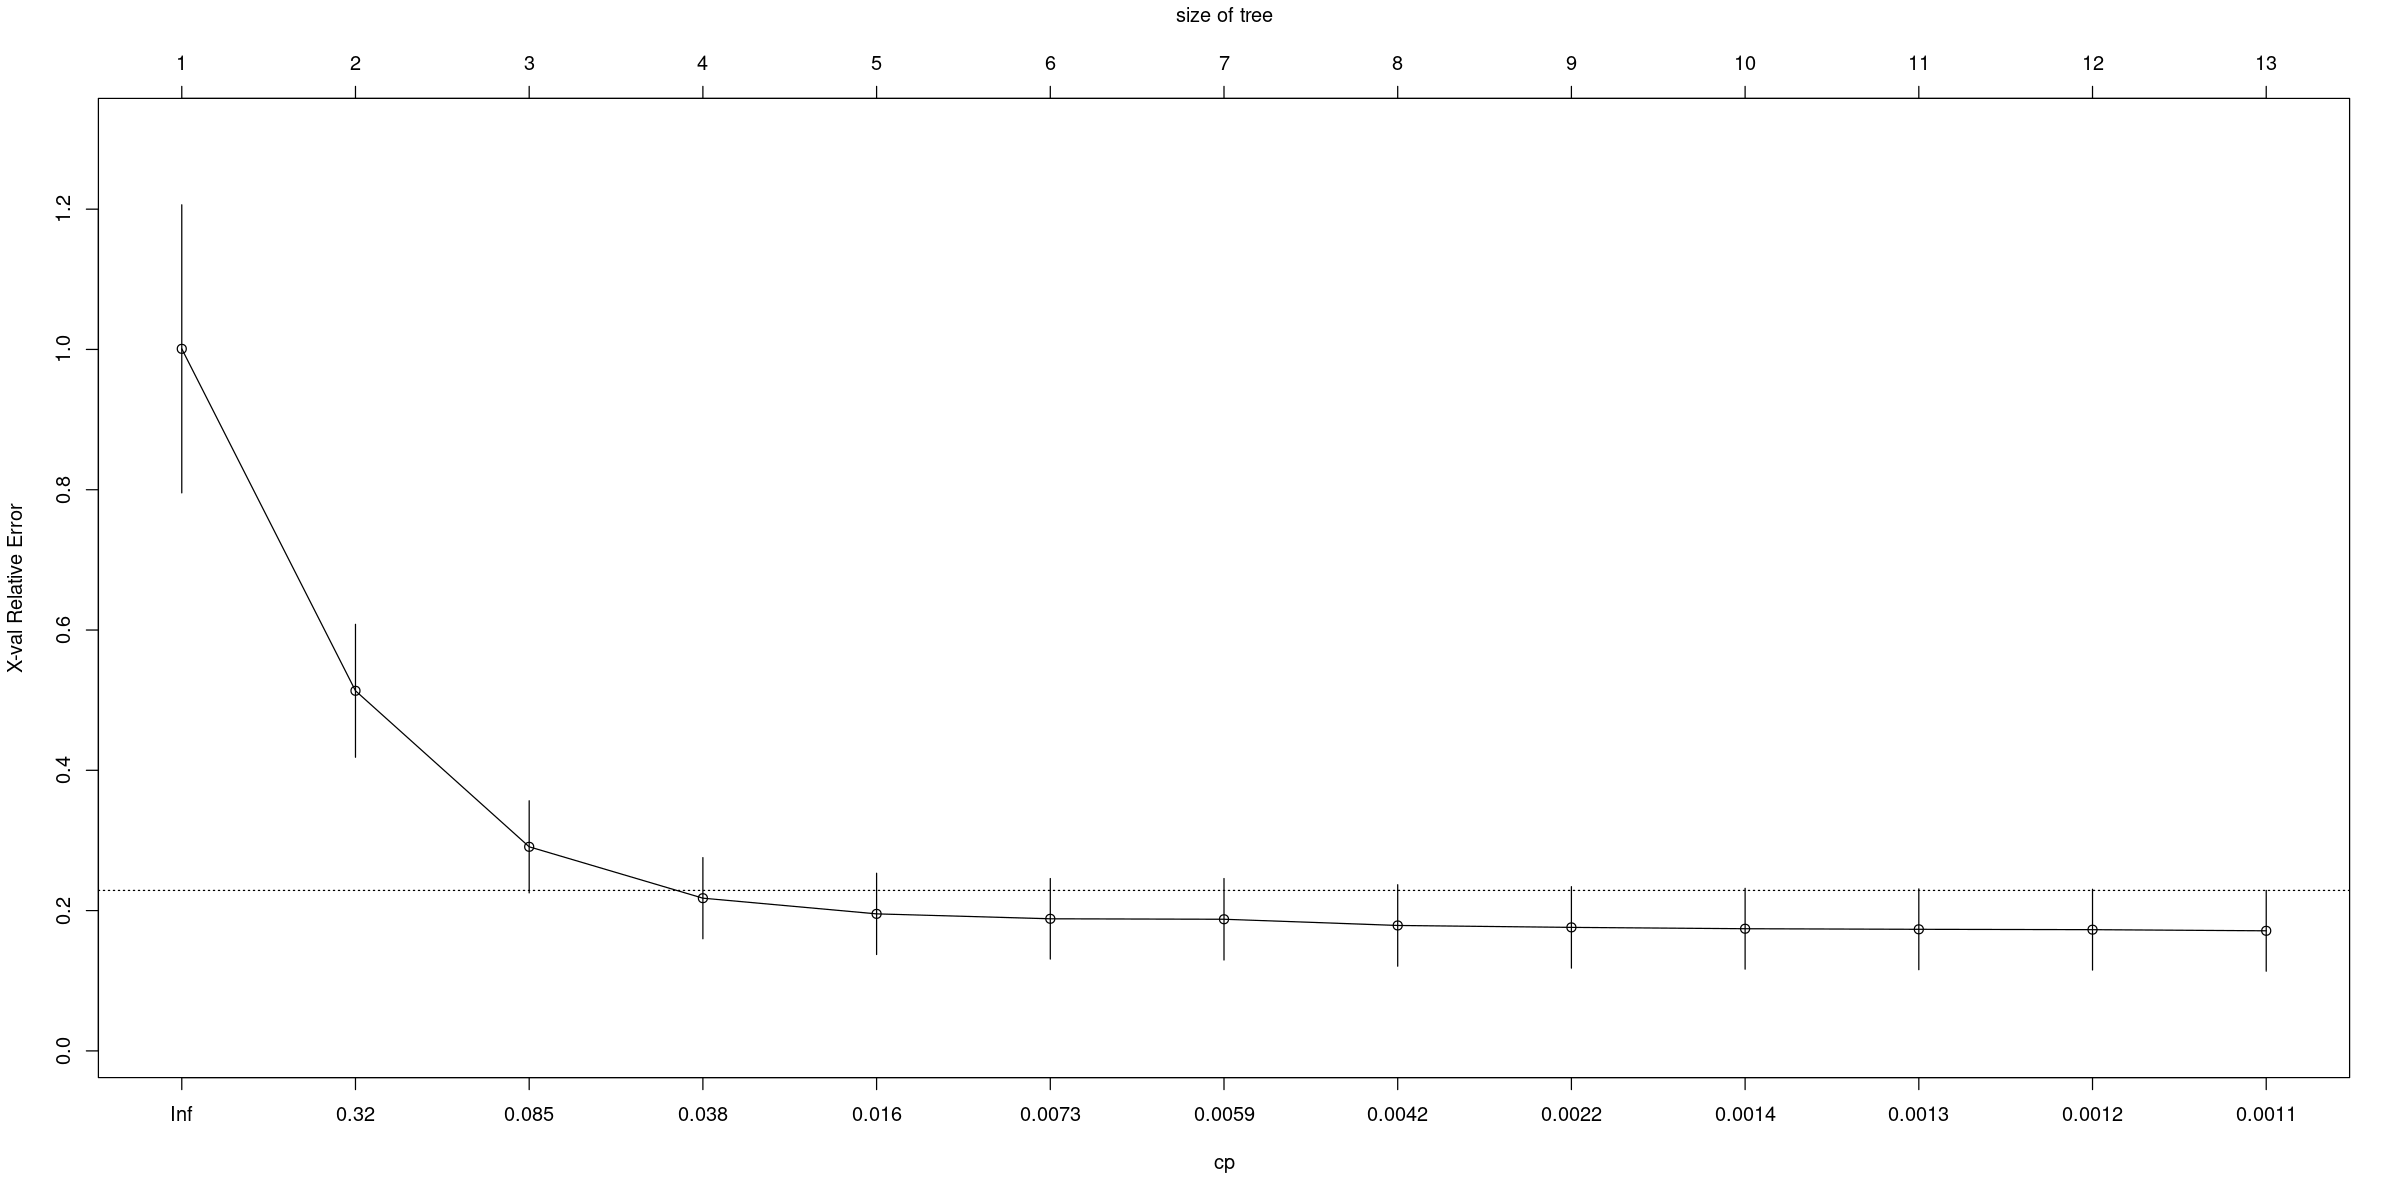

In [61]:
xmat<-xpred.rpart(tree.reg1,xval=10) 
# Cross-validation error par valeur de CP
CVerr<-apply((xmat-X_train$Value_co2_emissions_kt_by_country)^2,2,sum)

plotcp(tree.reg1)

On cherche la valeur de cp correspondant à la plus petite erreur puis utilisez la pour la construction del'arbre.


In [62]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg2=rpart(Value_co2_emissions_kt_by_country~.,data=X_train,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

[1] 0.001072143

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



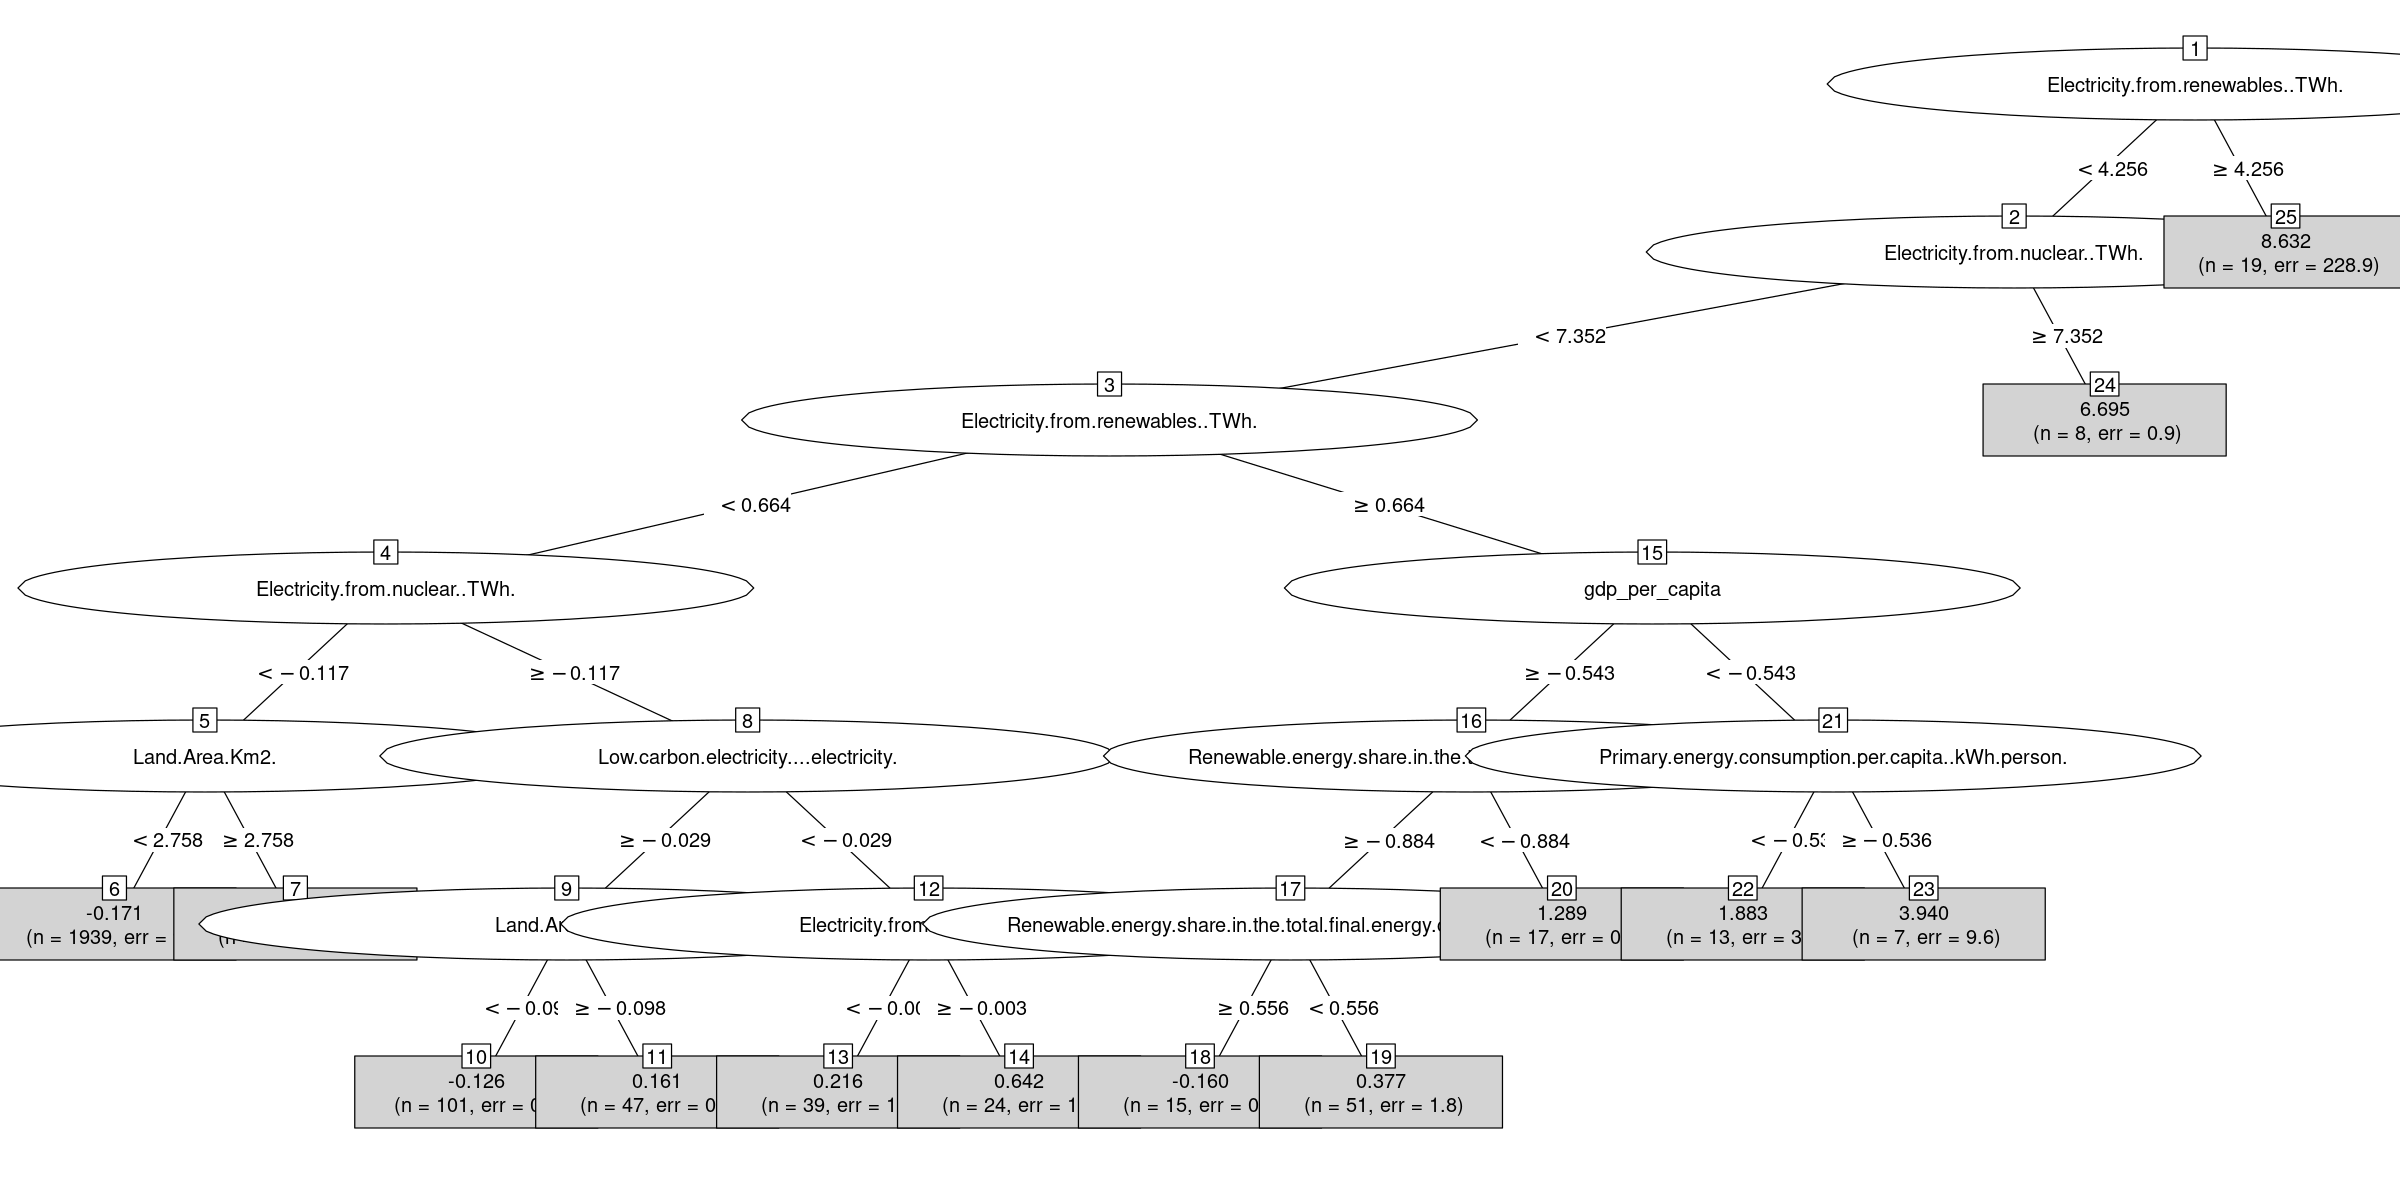

In [63]:
library(partykit)
plot(as.party(tree.reg2), type="simple")

Les feuilles de l'arbre indiquent les groupes finaux avec des prédictions spécifiques sur les émissions de CO2, illustrant l'importance relative et les seuils de chaque variable dans la prédiction des émissions de CO2.

In [64]:
# Predict on the test set
predictions <- predict(tree.reg2, newdata = X_test)

# Calculate MSE for the new tree on the test data
mse <- mean((predictions - y_test)^2)
cat("Test MSE:", mse, "\n")

Test MSE: 0.1023578 


Warning message in test.tree - y_test:
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message:
“Removed 2088 rows containing missing values (`geom_point()`).”


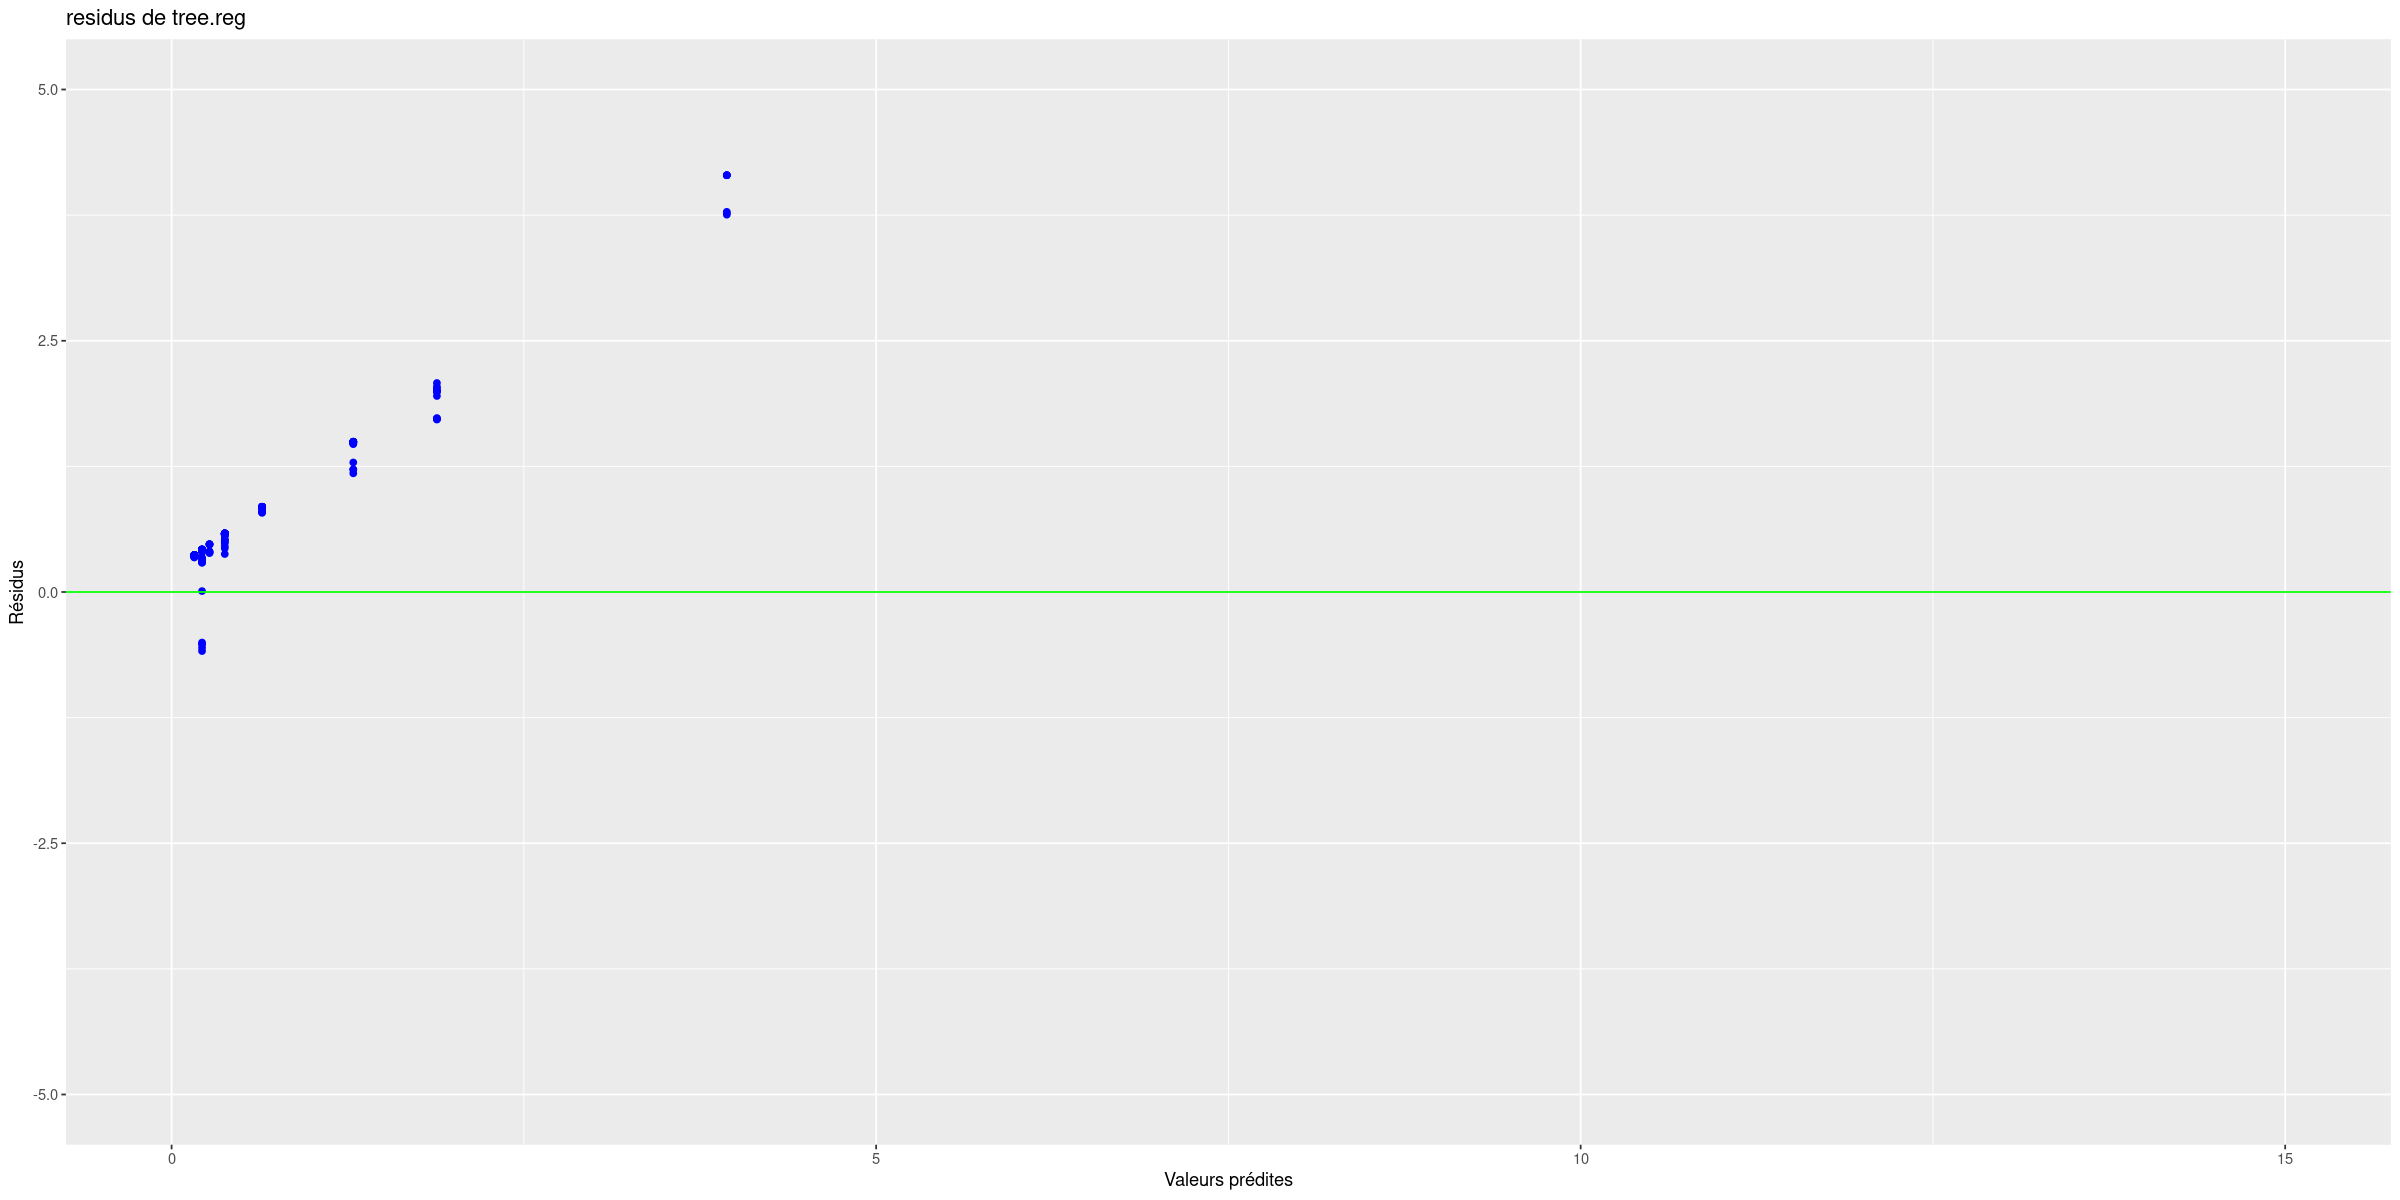

In [65]:
test.tree=predict(tree.reg2)
res.tree=test.tree-y_test
gplot.res(test.tree,res.tree,"residus de tree.reg")

On observe plusieurs groupes de résidus concentrés autour de certaines valeurs prédites, et les résidus tendent à s'éloigner de zéro surtout pour les valeurs prédites moyennes à élevées, indiquant des erreurs plus importantes dans ces zones.

### Forêts aléatoires
#### Régression

In [66]:
library(randomForest)

rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=X_train,xtest=X_test,ytest=y_test,
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01867     1.87 |  0.01241     0.95 |
 100 |  0.01568     1.57 |  0.01204     0.92 |
 150 |  0.01449     1.45 |  0.01353     1.03 |
 200 |  0.01445     1.45 |  0.01228     0.94 |
 250 |  0.01534     1.53 |  0.01235     0.94 |
 300 |  0.01498     1.50 |  0.01258     0.96 |
 350 |  0.01524     1.53 |  0.01319     1.00 |
 400 |  0.01539     1.54 |  0.01337     1.02 |
 450 |  0.01511     1.51 |  0.01319     1.00 |
 500 |  0.01459     1.46 |  0.01233     0.94 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

In [67]:
mse_rf = min(rf.reg$test$mse)
mse_rf

[1] 0.01071779

## Boosting

#### Régression

In [68]:
library(gbm)

boost.reg1 = gbm(Value_co2_emissions_kt_by_country ~ ., data = X_train, distribution = "gaussian",
                verbose = FALSE)

Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [69]:
# Predict on the test set using only the features (excluding the target variable)
predictions1 <- predict(boost.reg1, newdata = X_test, n.trees = 100)

# Evaluate the model performance on the test set using MSE
mse1 <- mean((predictions1 - y_test)^2)
cat("Test MSE:", mse1, "\n")


Test MSE: 0.1864681 


#### Optimisation

In [74]:
boost.reg2 = gbm(Value_co2_emissions_kt_by_country ~ ., data = X_train, distribution = "gaussian",
          n.trees = 100,                        # nombre d'arbres
          interaction.depth = 3,                # profondeur maximale des arbres
          n.minobsinnode = 10,                  # nombre minimum d'observations par noeud terminal
          shrinkage = 0.1,                      # taux d'apprentissage
          bag.fraction = 0.5,                   # fraction des données utilisées pour chaque arbre
          train.fraction = 0.8,                 # fraction des données utilisées pour l'entraînement
          cv.folds = 5, 
          verbose = FALSE)

ERROR: Error in makePSOCKcluster(names = spec, ...): L’initialisation du cluster a échoué. 4 (de 64) processus esclaves n’ont pas pu se connecter.


In [ ]:
# Predict on the test set using only the features (excluding the target variable)
predictions2 <- predict(boost.reg2, newdata = X_test, n.trees = 100)

# Evaluate the model performance on the test set using MSE
mse2 <- mean((predictions2 - y_test)^2)
cat("Test MSE:", mse2, "\n")


#### Comparaison entre base et optimisation

In [ ]:
# Création d'un dataframe pour les résultats
results <- data.frame(
  Model = c("Base Model", "Optimized Model"),
  MSE = c(mse1, mse2)
)

# Afficher les résultats sous forme de graphique
ggplot(results, aes(x = Model, y = MSE)) +
  geom_bar(stat = "identity", fill = "skyblue",width=0.3) +
  geom_text(aes(label = round(MSE, 2)), vjust = -0.3) +
  labs(title = "Comparaison des performances des modèles", y = "Erreur Quadratique Moyenne (MSE)", x = "Modèle") +
  theme_minimal()


### Xgboost Régression

In [ ]:
library(xgboost)

In [ ]:
xgb_train <- xgb.DMatrix(data = as.matrix(X_train[,c(-15,-16)]), label = y_train)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test[,-15]), label = y_test)

In [ ]:
xgb_params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",  # Objective suitable for regression
  eval_metric = "rmse"  # Mean Squared Error as the evaluation metric
)

In [ ]:
xgb_model <- xgb.train(
  params = xgb_params,
  data = xgb_train,
  nrounds = 100,
  verbose = 1
)


In [ ]:
# Assuming xgb_model is your trained model and xgb_test is your test data matrix
pred <- predict(xgb_model, as.matrix(X_test[,-15]), reshape = TRUE)

# Calculate MSE
xgb_mse1 <- mean((y_test - pred)^2)
print(xgb_mse1)

### Optimiser les hyperparamètres de xgboost

In [ ]:
xgb_params_optimized <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eval_metric = "rmse",
  max_depth = 6,
  eta = 0.05,
  n_estimators = 500,
  subsample = 0.8,
  colsample_bytree = 0.7,
  min_child_weight = 5,
  gamma = 0
)


# Perform cross-validation
cv_results <- xgb.cv(
  params = xgb_params_optimized,
  data = xgb_train,
  nrounds = 100,
  nfold = 5,  # Number of folds for cross-validation
  metrics = "rmse",  # Evaluation metric
  early_stopping_rounds = 10,  # Stop early if no improvement
  print_every_n = 10,  # Print the progress every 10 rounds
  seed = 123  # Set a seed for reproducibility
)

print(cv_results)


In [ ]:
# Get the best number of rounds from cross-validation
best_nrounds <- cv_results$best_iteration

# Train the final model using the best number of rounds
xgb_model2 <- xgb.train(
  params = xgb_params_optimized,
  data = xgb_train,
  nrounds = best_nrounds,
  verbose = 1
)

# Save the final model
xgb.save(xgb_model2, "xgb_model.model")

# Predict on the test set
predictions2 <- predict(xgb_model2, xgb_test)

# Evaluate the model performance on the test set
xgb_mse2 <- mean((predictions2 - y_test)^2)
cat("Test MSE:", xgb_mse2, "\n")


In [ ]:
# Création d'un dataframe pour les résultats
results <- data.frame(
  Model = c("Base Model", "Optimized Model"),
  MSE = c(xgb_mse1, xgb_mse2)
)

# Afficher les résultats sous forme de graphique
ggplot(results, aes(x = Model, y = MSE)) +
  geom_bar(stat = "identity", fill = "skyblue",width=0.3) +
  geom_text(aes(label = round(MSE, 2)), vjust = -0.3) +
  labs(title = "Comparaison des performances des modèles", y = "Erreur Quadratique Moyenne (MSE)", x = "Modèle") +
  theme_minimal()


In [ ]:
importance_matrix <- xgb.importance(
  feature_names = colnames(xgb_train), 
  model = xgb_model
)
importance_matrix

In [ ]:
xgb.plot.importance(importance_matrix,col='blue')

In [ ]:
residuals <- pred - y_test 
plot(residuals, main = "Residuals Plot", xlab = "Index", ylab = "Residual",
     col = "blue", lwd = 2)
abline(h = 0, col = "green")  # Adds a horizontal line at zero


### Réseau de neurones :

In [ ]:
library(neuralnet)
library(MASS)
library(nnet)

In [ ]:
library(e1071)
plot(tune.nnet(Value_co2_emissions_kt_by_country ~ .,data=X_train,size=c(2,3,4,5),decay=1:5,maxit=500,linout=TRUE))

In [ ]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country ~ .,data=X_train,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

In [ ]:
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=X_train)
res.nnetr=fit.nnetr-X_train[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.nnetr,res.nnetr,titre="")

In [ ]:
pred.nnetr=predict(nnet.reg,newdata=X_test)

In [ ]:
# Erreur quadratique moyenne de prévision
mse_rnn = sum((pred.nnetr-y_test)^2)/nrow(X_test)
mse_rnn

## Comparaison entre les algorithmes

In [ ]:
# Créer le dataframe avec les données
algorithmes <- c("RF", "CART", "Modèle linéaire", "Gradient boosting", "Xgboost", "SVM", "RNN")
erreurs <- c(0.02057, 0.11, 0.2, 0.1, 0.0072, 0.0079, 0.008)
data <- data.frame(Algorithme = algorithmes, Erreur = erreurs)

# Créer l'histogramme
ggplot(data, aes(x = Algorithme, y = Erreur)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = Erreur), vjust = -0.3) +
  labs(title = "Comparaison des erreurs entre les algorithmes de ML", y = "Erreur", x = "Algorithme") +
  theme_minimal()

## Imputation des données manquantes :

In [ ]:
head(data)

In [ ]:
col = c('Renewable.electricity.generating.capacity.per.capita','Financial.flows.to.developing.countries..US...','Renewables....equivalent.primary.energy.','Electricity.from.fossil.fuels..TWh.')
imputed_data = data[,!names(data) %in% col]
names(imputed_data)

In [ ]:
imputed_data[, "Year"] <- as.factor(imputed_data[, "Year"])
numeric_cols <- names(imputed_data)[sapply(imputed_data, is.numeric)]

data_imputed_num <- imputed_data[numeric_cols]
summary(data_imputed_num)
dim(data_imputed_num)

In [ ]:
#imputation avec missforest
library(missForest)
set.seed(123)
data_new<-missForest(data_imputed_num)

In [ ]:
data_imputed <- data_new$ximp
print(summary(data_imputed))
dim(data_imputed)
sum(is.na(data_imputed))

In [ ]:
library(caret)
# Définir la variable cible
y <- data_imputed$Value_co2_emissions_kt_by_country

# Partition des données
set.seed(123)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)  # 80% pour l'entraînement

# Créer les ensembles de train et de test pour X et y
X_train_imput <- data_imputed[train_index, -which(names(data_imputed) == "Value_co2_emissions_kt_by_country")]
y_train_imput <- data_imputed[train_index, "Value_co2_emissions_kt_by_country"]
X_test_imput <- data_imputed[-train_index, -which(names(data_imputed) == "Value_co2_emissions_kt_by_country")]
y_test_imput<- data_imputed[-train_index, "Value_co2_emissions_kt_by_country"]

In [ ]:
head(X_train_imput)

In [ ]:
# Calculer la moyenne et l'écart-type de X_train
mean_X_train_imput <- apply(X_train_imput, 2, mean)
sd_X_train_imput <- apply(X_train_imput, 2, sd)
# Normaliser X_train
X_train_normalized_imput <- sweep(X_train_imput, 2, mean_X_train_imput, FUN = "-")
X_train_normalized_imput <- sweep(X_train_normalized_imput, 2, sd_X_train_imput, FUN = "/")

# Utiliser la même moyenne et l'écart-type pour normaliser X_test
X_test_normalized_imput <- sweep(X_test_imput, 2, mean_X_train_imput, FUN = "-")
X_test_normalized_imput <- sweep(X_test_normalized_imput, 2, sd_X_train_imput, FUN = "/")

# Normaliser y_train et y_test
mean_y_train_imput <- mean(y_train_imput)
sd_y_train_imput <- sd(y_train_imput)

y_train_normalized_imput <- (y_train_imput - mean_y_train_imput) / sd_y_train_imput
y_test_normalized_imput <- (y_test_imput - mean_y_train_imput) / sd_y_train_imput


# Afficher les résultats normalisés
X_train_imput = X_train_normalized_imput
X_test_imput = X_test_normalized_imput
y_train_imput=y_train_normalized_imput
y_test_imput=y_test_normalized_imput
dim(X_train_imput)
dim(X_test_imput)

In [ ]:
year <-imputed_data$Year
# Assigner la colonne Year à X_train et X_test
X_train_imput$year <- year[train_index]
X_test_imput$year <- year[-train_index]


In [ ]:
X_train_imput$Value_co2_emissions_kt_by_country <- y_train_imput
head(X_train_imput)

### SVM

In [ ]:
library(e1071)
svm.reg1 = svm(Value_co2_emissions_kt_by_country ~ ., data = X_train_imput) # radial = gaussian
summary(svm.reg1)

In [ ]:
pred.svmr=predict(svm.reg1,newdata=X_test_imput)
# Erreur quadratique moyenne de prévision
mse_svm<-sum((pred.svmr-y_test_imput)^2)/nrow(X_test_imput)
print(mse_svm)

In [ ]:
svm.reg.tune.imput = tune.svm(Value_co2_emissions_kt_by_country ~ ., data = X_train_imput, cost = c(2.5,3.5,4.5,5.5,6.5), 
    gamma = seq(0.001, 0.1, by = 0.01))
plot(svm.reg.tune.imput)

In [ ]:
svm.reg = svm(Value_co2_emissions_kt_by_country ~ ., data = X_train_imput, cost = svm.reg.tune.imput$best.parameters$cost, 
    gamma = svm.reg.tune.imput$best.parameters$gamma)
summary(svm.reg)

In [ ]:
pred.svm.imp=predict(svm.reg,newdata=X_test_imput)
# Erreur quadratique moyenne de prévision
mse_svm_opt_imput<-sum((pred.svm.imp-y_test_imput)^2)/nrow(X_test_imput)
print(mse_svm_opt_imput)

### Boosting

In [ ]:
library(gbm)

boost.reg2 = gbm(Value_co2_emissions_kt_by_country ~ ., data = X_train_imput, distribution = "gaussian",
                verbose = FALSE)

In [ ]:
# Predict on the test set using only the features (excluding the target variable)
predictions1 <- predict(boost.reg2, newdata = X_test_imput, n.trees = 100)

# Evaluate the model performance on the test set using MSE
mse1 <- mean((predictions1 - y_test_imput)^2)
cat("Test MSE:", mse1, "\n")


In [ ]:
boost.reg2 = gbm(Value_co2_emissions_kt_by_country ~ ., data = X_train_imput, distribution = "gaussian",
          n.trees = 100,                        # nombre d'arbres
          interaction.depth = 3,                # profondeur maximale des arbres
          n.minobsinnode = 10,                  # nombre minimum d'observations par noeud terminal
          shrinkage = 0.1,                      # taux d'apprentissage
          bag.fraction = 0.5,                   # fraction des données utilisées pour chaque arbre
          train.fraction = 0.8,                 # fraction des données utilisées pour l'entraînement
          cv.folds = 5, 
          verbose = FALSE)

In [ ]:
# Predict on the test set using only the features (excluding the target variable)
predictions2 <- predict(boost.reg2, newdata = X_test_imput, n.trees = 100)

# Evaluate the model performance on the test set using MSE
mse2 <- mean((predictions2 - y_test_imput)^2)
cat("Test MSE:", mse2, "\n")


### XGBOOST

In [ ]:
head(X_train_imput)

In [ ]:
library(xgboost)
xgb_train <- xgb.DMatrix(data = as.matrix(X_train_imput[,c(-15,-16)]), label = y_train_imput)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test_imput[,-15]), label = y_test_imput)

In [ ]:
xgb_params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",  # Objective suitable for regression
  eval_metric = "rmse"  # Mean Squared Error as the evaluation metric
)

In [ ]:
xgb_model <- xgb.train(
  params = xgb_params,
  data = xgb_train,
  nrounds = 100,
  verbose = 1
)


In [ ]:
# Assuming xgb_model is your trained model and xgb_test is your test data matrix
pred2 <- predict(xgb_model, as.matrix(X_test_imput[,-15]), reshape = TRUE)

# Calculate MSE
xgb_mse2 <- mean((y_test_imput - pred2)^2)
print(xgb_mse2)

#### Optimiser XGBOOST pour les données imputées

In [ ]:
xgb_params_optimized <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eval_metric = "rmse",
  max_depth = 6,
  eta = 0.05,
  n_estimators = 500,
  subsample = 0.8,
  colsample_bytree = 0.7,
  min_child_weight = 5,
  gamma = 0
)


# Perform cross-validation
cv_results <- xgb.cv(
  params = xgb_params_optimized,
  data = xgb_train,
  nrounds = 100,
  nfold = 5,  # Number of folds for cross-validation
  metrics = "rmse",  # Evaluation metric
  early_stopping_rounds = 10,  # Stop early if no improvement
  print_every_n = 10,  # Print the progress every 10 rounds
  seed = 123  # Set a seed for reproducibility
)

print(cv_results)


In [ ]:
# Get the best number of rounds from cross-validation
best_nrounds <- cv_results$best_iteration

# Train the final model using the best number of rounds
xgb_model2 <- xgb.train(
  params = xgb_params_optimized,
  data = xgb_train,
  nrounds = best_nrounds,
  verbose = 1
)

# Save the final model
xgb.save(xgb_model2, "xgb_model.model")

# Predict on the test set
predictions2 <- predict(xgb_model2, xgb_test)

# Evaluate the model performance on the test set
xgb_mse2 <- mean((predictions2 - y_test_imput)^2)
cat("Test MSE:", xgb_mse2, "\n")


### Réseau de neurones :

In [ ]:
library(neuralnet)
library(MASS)
library(nnet)

In [ ]:
library(e1071)
plot(tune.nnet(Value_co2_emissions_kt_by_country ~ .,data=X_train_imput,size=c(2,3,4,5),decay=1:5,maxit=500,linout=TRUE))

In [ ]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country ~ .,data=X_train_imput,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

In [ ]:
head(X_test_imput)

In [ ]:
pred.nnetr2=predict(nnet.reg,newdata=X_test_imput)
# Erreur quadratique moyenne de prévision
mse_rnn = sum((pred.nnetr2-y_test_imput)^2)/nrow(X_test_imput)
mse_rnn